<a href="https://colab.research.google.com/github/Thisuli-Amanethmi/Monitoring-HCHO-Level-Sri-Lanka/blob/main/HCHO_monitoring_using_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=d844e11700b112605ec01f8fd4fea7e0decea91e78a785eb6336636791f7b408
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package

In [2]:
import pyspark
import pyspark.sql  as pyspark_sql
import pyspark.sql.types as pyspark_types
import pyspark.sql.functions  as pyspark_functions
from pyspark import SparkContext, SparkConf

In [3]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

# **Dataframe OPs**

In [4]:
# Load the dataset

colombo_matara_nuwaraeliya_data = spark.read.csv("col_mat_nuw_output.csv", header=False, inferSchema=True)
kandy_data = spark.read.csv("kan_output.csv", header=False, inferSchema=True)
monaragala_kurunegala_jaffna_data = spark.read.csv("mon_kur_jaf_output.csv", header=False, inferSchema=True)


In [5]:
colombo_matara_nuwaraeliya_data.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)



In [6]:
colombo_matara_nuwaraeliya_data.show()

+----------+--------------+----------+----------+
|       _c0|           _c1|       _c2|       _c3|
+----------+--------------+----------+----------+
|1.96983E-4|Colombo Proper|01/01/2019|02/01/2019|
|2.62552E-4|Colombo Proper|02/01/2019|03/01/2019|
|   9.85E-5|Colombo Proper|03/01/2019|04/01/2019|
|2.09932E-4|Colombo Proper|04/01/2019|05/01/2019|
|1.78534E-4|Colombo Proper|05/01/2019|06/01/2019|
| 1.0823E-4|Colombo Proper|06/01/2019|07/01/2019|
|3.92683E-4|Colombo Proper|07/01/2019|08/01/2019|
|   9.15E-5|Colombo Proper|08/01/2019|09/01/2019|
|1.20598E-4|Colombo Proper|09/01/2019|10/01/2019|
|1.29772E-4|Colombo Proper|10/01/2019|11/01/2019|
|2.23919E-4|Colombo Proper|11/01/2019|12/01/2019|
|1.56942E-4|Colombo Proper|12/01/2019|13/01/2019|
|      NULL|Colombo Proper|13/01/2019|14/01/2019|
|1.33629E-4|Colombo Proper|14/01/2019|15/01/2019|
|   6.37E-5|Colombo Proper|15/01/2019|16/01/2019|
|1.18106E-4|Colombo Proper|16/01/2019|17/01/2019|
|2.47256E-4|Colombo Proper|17/01/2019|18/01/2019|


In [7]:
column_names = ["HCHO_reading", "Location", "Current_Date", "Next_Date"]
colombo_matara_nuwaraeliya_data = colombo_matara_nuwaraeliya_data.toDF(*column_names)

colombo_matara_nuwaraeliya_data.show()

+------------+--------------+------------+----------+
|HCHO_reading|      Location|Current_Date| Next_Date|
+------------+--------------+------------+----------+
|  1.96983E-4|Colombo Proper|  01/01/2019|02/01/2019|
|  2.62552E-4|Colombo Proper|  02/01/2019|03/01/2019|
|     9.85E-5|Colombo Proper|  03/01/2019|04/01/2019|
|  2.09932E-4|Colombo Proper|  04/01/2019|05/01/2019|
|  1.78534E-4|Colombo Proper|  05/01/2019|06/01/2019|
|   1.0823E-4|Colombo Proper|  06/01/2019|07/01/2019|
|  3.92683E-4|Colombo Proper|  07/01/2019|08/01/2019|
|     9.15E-5|Colombo Proper|  08/01/2019|09/01/2019|
|  1.20598E-4|Colombo Proper|  09/01/2019|10/01/2019|
|  1.29772E-4|Colombo Proper|  10/01/2019|11/01/2019|
|  2.23919E-4|Colombo Proper|  11/01/2019|12/01/2019|
|  1.56942E-4|Colombo Proper|  12/01/2019|13/01/2019|
|        NULL|Colombo Proper|  13/01/2019|14/01/2019|
|  1.33629E-4|Colombo Proper|  14/01/2019|15/01/2019|
|     6.37E-5|Colombo Proper|  15/01/2019|16/01/2019|
|  1.18106E-4|Colombo Proper

In [8]:
kandy_data.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)



In [9]:
kandy_data.show()

+-----------+------------+----------+----------+
|        _c0|         _c1|       _c2|       _c3|
+-----------+------------+----------+----------+
| 1.76071E-4|Kandy Proper|01/01/2019|02/01/2019|
|    9.22E-5|Kandy Proper|02/01/2019|03/01/2019|
|       NULL|Kandy Proper|03/01/2019|04/01/2019|
| 1.90868E-4|Kandy Proper|04/01/2019|05/01/2019|
| 1.21952E-4|Kandy Proper|05/01/2019|06/01/2019|
|   -6.51E-5|Kandy Proper|06/01/2019|07/01/2019|
| 1.63238E-4|Kandy Proper|07/01/2019|08/01/2019|
|   -6.74E-5|Kandy Proper|08/01/2019|09/01/2019|
| 1.27969E-4|Kandy Proper|09/01/2019|10/01/2019|
|    4.55E-5|Kandy Proper|10/01/2019|11/01/2019|
|     3.6E-5|Kandy Proper|11/01/2019|12/01/2019|
| 1.28663E-4|Kandy Proper|12/01/2019|13/01/2019|
|       NULL|Kandy Proper|13/01/2019|14/01/2019|
|       NULL|Kandy Proper|14/01/2019|15/01/2019|
|    9.64E-5|Kandy Proper|15/01/2019|16/01/2019|
|       NULL|Kandy Proper|16/01/2019|17/01/2019|
| 1.20097E-4|Kandy Proper|17/01/2019|18/01/2019|
|-1.19725E-4|Kandy P

In [10]:
column_names = ["HCHO_reading", "Location", "Current_Date", "Next_Date"]
kandy_data = kandy_data.toDF(*column_names)

kandy_data.show()

+------------+------------+------------+----------+
|HCHO_reading|    Location|Current_Date| Next_Date|
+------------+------------+------------+----------+
|  1.76071E-4|Kandy Proper|  01/01/2019|02/01/2019|
|     9.22E-5|Kandy Proper|  02/01/2019|03/01/2019|
|        NULL|Kandy Proper|  03/01/2019|04/01/2019|
|  1.90868E-4|Kandy Proper|  04/01/2019|05/01/2019|
|  1.21952E-4|Kandy Proper|  05/01/2019|06/01/2019|
|    -6.51E-5|Kandy Proper|  06/01/2019|07/01/2019|
|  1.63238E-4|Kandy Proper|  07/01/2019|08/01/2019|
|    -6.74E-5|Kandy Proper|  08/01/2019|09/01/2019|
|  1.27969E-4|Kandy Proper|  09/01/2019|10/01/2019|
|     4.55E-5|Kandy Proper|  10/01/2019|11/01/2019|
|      3.6E-5|Kandy Proper|  11/01/2019|12/01/2019|
|  1.28663E-4|Kandy Proper|  12/01/2019|13/01/2019|
|        NULL|Kandy Proper|  13/01/2019|14/01/2019|
|        NULL|Kandy Proper|  14/01/2019|15/01/2019|
|     9.64E-5|Kandy Proper|  15/01/2019|16/01/2019|
|        NULL|Kandy Proper|  16/01/2019|17/01/2019|
|  1.20097E-

In [11]:
monaragala_kurunegala_jaffna_data.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)



In [12]:
monaragala_kurunegala_jaffna_data.show()

+----------+------------------+----------+----------+
|       _c0|               _c1|       _c2|       _c3|
+----------+------------------+----------+----------+
|      NULL|Bibile, Monaragala|01/01/2019|02/01/2019|
|   1.92E-5|Bibile, Monaragala|02/01/2019|03/01/2019|
|   2.81E-5|Bibile, Monaragala|03/01/2019|04/01/2019|
|   3.75E-5|Bibile, Monaragala|04/01/2019|05/01/2019|
|   -1.8E-5|Bibile, Monaragala|05/01/2019|06/01/2019|
|1.45784E-4|Bibile, Monaragala|06/01/2019|07/01/2019|
|   2.83E-5|Bibile, Monaragala|07/01/2019|08/01/2019|
|      NULL|Bibile, Monaragala|08/01/2019|09/01/2019|
|1.42085E-4|Bibile, Monaragala|09/01/2019|10/01/2019|
|      NULL|Bibile, Monaragala|10/01/2019|11/01/2019|
|   2.01E-5|Bibile, Monaragala|11/01/2019|12/01/2019|
|1.58279E-4|Bibile, Monaragala|12/01/2019|13/01/2019|
|      NULL|Bibile, Monaragala|13/01/2019|14/01/2019|
|      NULL|Bibile, Monaragala|14/01/2019|15/01/2019|
|   9.95E-5|Bibile, Monaragala|15/01/2019|16/01/2019|
|   7.48E-5|Bibile, Monaraga

In [13]:
column_names = ["HCHO_reading", "Location", "Current_Date", "Next_Date"]
monaragala_kurunegala_jaffna_data = monaragala_kurunegala_jaffna_data.toDF(*column_names)

monaragala_kurunegala_jaffna_data.show()

+------------+------------------+------------+----------+
|HCHO_reading|          Location|Current_Date| Next_Date|
+------------+------------------+------------+----------+
|        NULL|Bibile, Monaragala|  01/01/2019|02/01/2019|
|     1.92E-5|Bibile, Monaragala|  02/01/2019|03/01/2019|
|     2.81E-5|Bibile, Monaragala|  03/01/2019|04/01/2019|
|     3.75E-5|Bibile, Monaragala|  04/01/2019|05/01/2019|
|     -1.8E-5|Bibile, Monaragala|  05/01/2019|06/01/2019|
|  1.45784E-4|Bibile, Monaragala|  06/01/2019|07/01/2019|
|     2.83E-5|Bibile, Monaragala|  07/01/2019|08/01/2019|
|        NULL|Bibile, Monaragala|  08/01/2019|09/01/2019|
|  1.42085E-4|Bibile, Monaragala|  09/01/2019|10/01/2019|
|        NULL|Bibile, Monaragala|  10/01/2019|11/01/2019|
|     2.01E-5|Bibile, Monaragala|  11/01/2019|12/01/2019|
|  1.58279E-4|Bibile, Monaragala|  12/01/2019|13/01/2019|
|        NULL|Bibile, Monaragala|  13/01/2019|14/01/2019|
|        NULL|Bibile, Monaragala|  14/01/2019|15/01/2019|
|     9.95E-5|

In [14]:
# Combine the three dataframes using union
data = colombo_matara_nuwaraeliya_data.union(kandy_data).union(monaragala_kurunegala_jaffna_data)

column_names = ["HCHO_reading", "Location", "Current_Date", "Next_Date"]
data = data.toDF(*column_names)

# Show the combined dataframe
data.show(50)


+------------+--------------+------------+----------+
|HCHO_reading|      Location|Current_Date| Next_Date|
+------------+--------------+------------+----------+
|  1.96983E-4|Colombo Proper|  01/01/2019|02/01/2019|
|  2.62552E-4|Colombo Proper|  02/01/2019|03/01/2019|
|     9.85E-5|Colombo Proper|  03/01/2019|04/01/2019|
|  2.09932E-4|Colombo Proper|  04/01/2019|05/01/2019|
|  1.78534E-4|Colombo Proper|  05/01/2019|06/01/2019|
|   1.0823E-4|Colombo Proper|  06/01/2019|07/01/2019|
|  3.92683E-4|Colombo Proper|  07/01/2019|08/01/2019|
|     9.15E-5|Colombo Proper|  08/01/2019|09/01/2019|
|  1.20598E-4|Colombo Proper|  09/01/2019|10/01/2019|
|  1.29772E-4|Colombo Proper|  10/01/2019|11/01/2019|
|  2.23919E-4|Colombo Proper|  11/01/2019|12/01/2019|
|  1.56942E-4|Colombo Proper|  12/01/2019|13/01/2019|
|        NULL|Colombo Proper|  13/01/2019|14/01/2019|
|  1.33629E-4|Colombo Proper|  14/01/2019|15/01/2019|
|     6.37E-5|Colombo Proper|  15/01/2019|16/01/2019|
|  1.18106E-4|Colombo Proper

In [15]:
data.printSchema()

root
 |-- HCHO_reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current_Date: string (nullable = true)
 |-- Next_Date: string (nullable = true)



# **Data Explorartion & Vizualization**

(For raw data)

In [16]:
# checking for null/ missing values

# HCHO_reading: double (nullable = true)
# Location: string (nullable = true)
# Current_Date: string (nullable = true)
# Next_Date: string (nullable = true)

from pyspark.sql.functions import col

# Check if there are null values in the columns,
hcho = data.filter(col("HCHO_reading").isNull()).count()
location = data.filter(col("Location").isNull()).count()
currentDate = data.filter(col("Current_Date").isNull()).count()
nextDate = data.filter(col("Next_Date").isNull()).count()

# Print the results
print("Null value count")
print("HCHO_reading:", hcho)
print("Location:", location)
print("Current_Date:", currentDate)
print("Next_Date:", nextDate)

Null value count
HCHO_reading: 4864
Location: 0
Current_Date: 0
Next_Date: 0


In [17]:
# checking for class inbalance

# Count the number of instances for each location type
location_counts = data.groupBy("Location").count()

# Calculate the proportion of instances for each location type
total_instances = data.count()
location_proportions = location_counts.withColumn("proportion", col("count") / total_instances)

# Check if there's a significant difference in the proportions
# You can set a threshold to define what constitutes an imbalance
# For example, if the proportion of instances for any location type is significantly lower or higher than others
threshold = 0.05  # You can adjust this threshold as needed
imbalanced_locations = location_proportions.filter((col("proportion") < threshold) | (col("proportion") > 1 - threshold))

# Show the imbalanced location types
imbalanced_locations.show()



+--------+-----+----------+
|Location|count|proportion|
+--------+-----+----------+
+--------+-----+----------+



In [18]:
# format inconsistencies

# ??????????????????

from pyspark.sql.functions import col, regexp_extract

# Check Location column for inconsistencies
data.groupBy("Location").count().orderBy(col("count").desc()).show()

# Check Current_Date and Next_Date columns for date format inconsistencies
date_format_check = data.filter(
    ~(col("Current_Date").rlike("\d{4}-\d{2}-\d{2}") & col("Next_Date").rlike("\d{4}-\d{2}-\d{2}"))
)
date_format_check.show()

# Check HCHO_reading column for numerical format inconsistencies
numerical_format_check = data.filter(~col("HCHO_reading").cast("double").isNotNull())
numerical_format_check.show()


+-------------------+-----+
|           Location|count|
+-------------------+-----+
|   Deniyaya, Matara| 1826|
|     Colombo Proper| 1826|
|Nuwara Eliya Proper| 1826|
|       Kandy Proper| 1826|
|  Kurunegala Proper| 1826|
| Bibile, Monaragala| 1826|
|      Jaffna Proper| 1826|
+-------------------+-----+

+------------+--------------+------------+----------+
|HCHO_reading|      Location|Current_Date| Next_Date|
+------------+--------------+------------+----------+
|  1.96983E-4|Colombo Proper|  01/01/2019|02/01/2019|
|  2.62552E-4|Colombo Proper|  02/01/2019|03/01/2019|
|     9.85E-5|Colombo Proper|  03/01/2019|04/01/2019|
|  2.09932E-4|Colombo Proper|  04/01/2019|05/01/2019|
|  1.78534E-4|Colombo Proper|  05/01/2019|06/01/2019|
|   1.0823E-4|Colombo Proper|  06/01/2019|07/01/2019|
|  3.92683E-4|Colombo Proper|  07/01/2019|08/01/2019|
|     9.15E-5|Colombo Proper|  08/01/2019|09/01/2019|
|  1.20598E-4|Colombo Proper|  09/01/2019|10/01/2019|
|  1.29772E-4|Colombo Proper|  10/01/2019|1

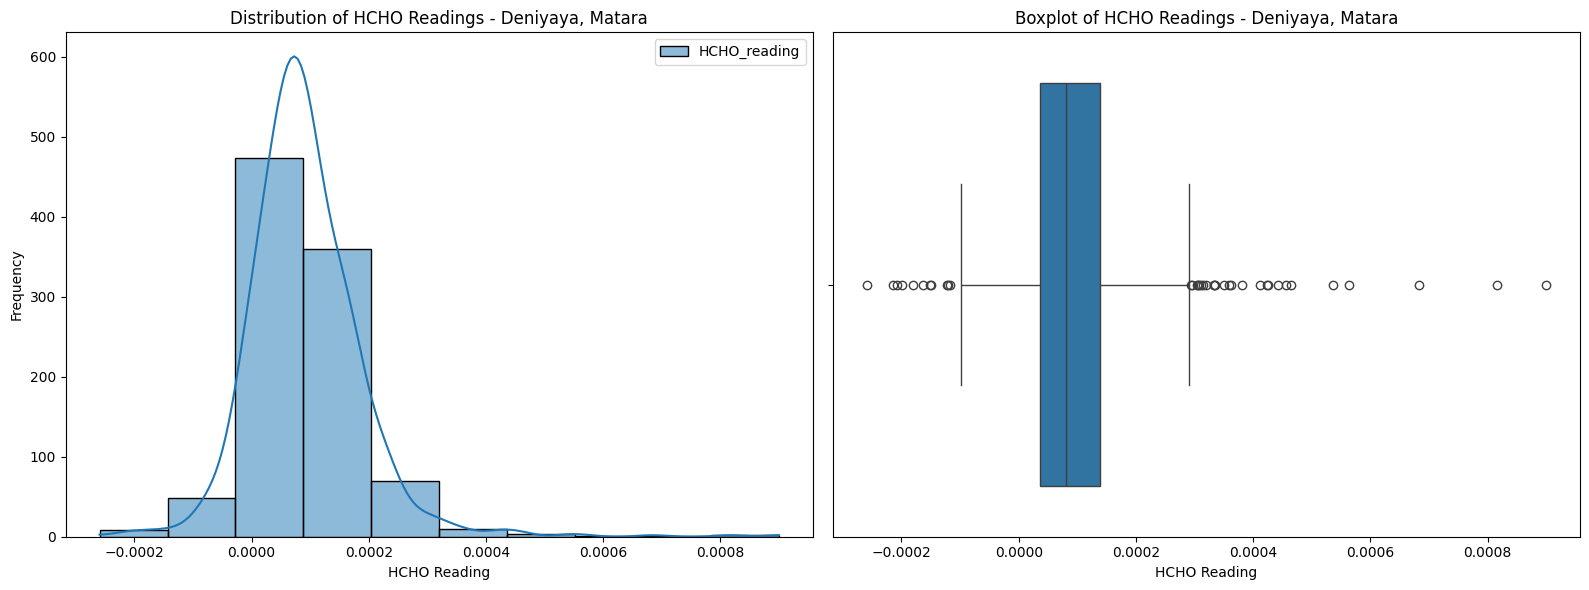

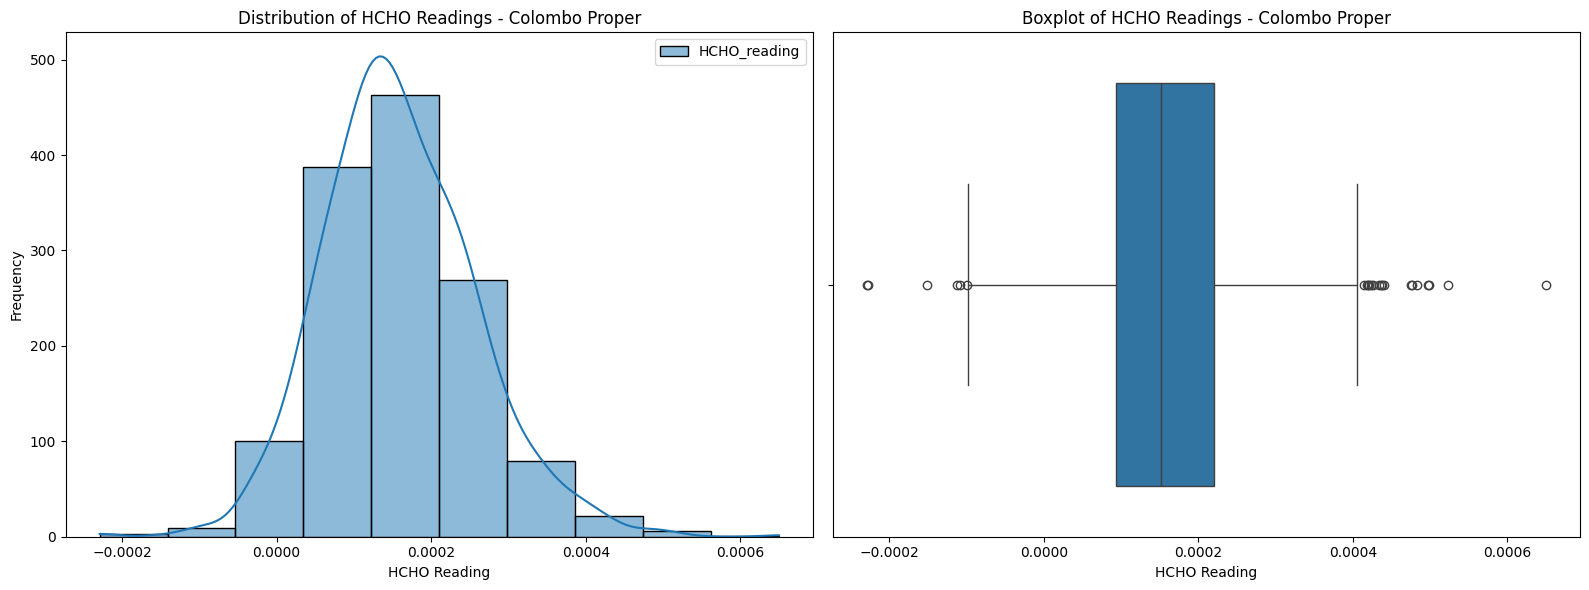

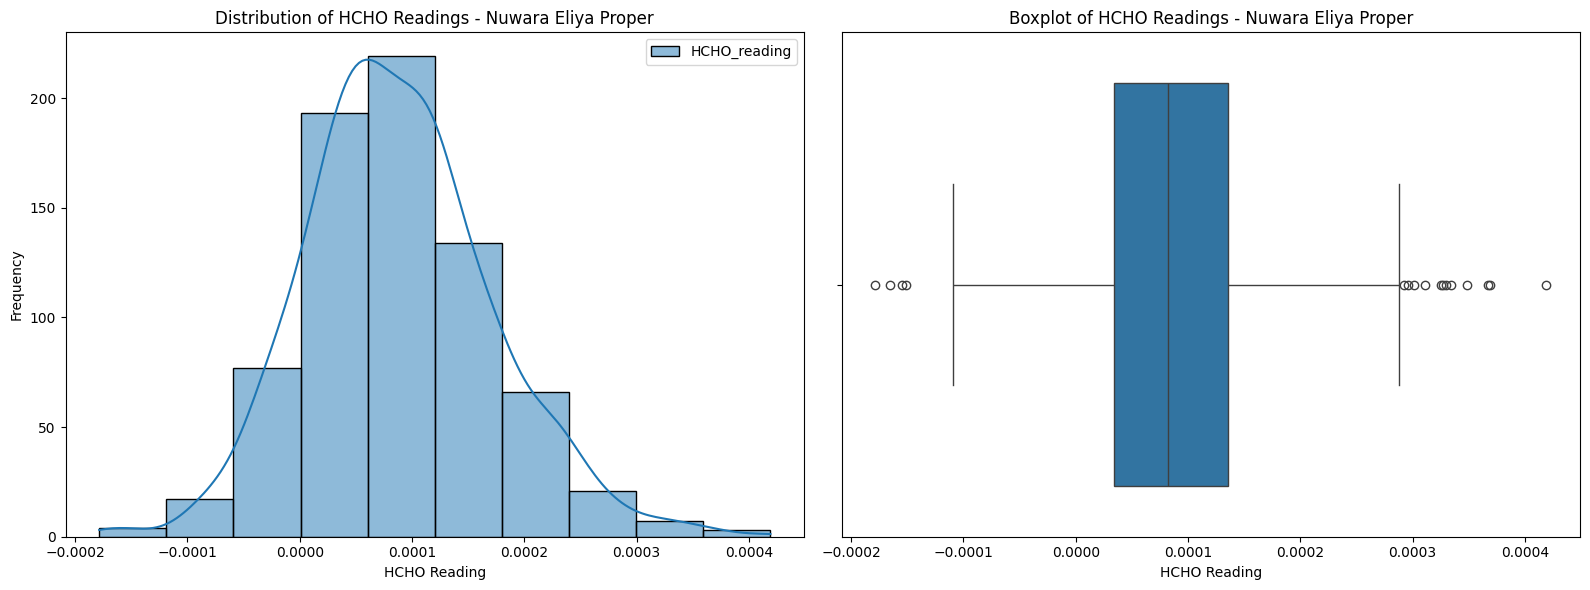

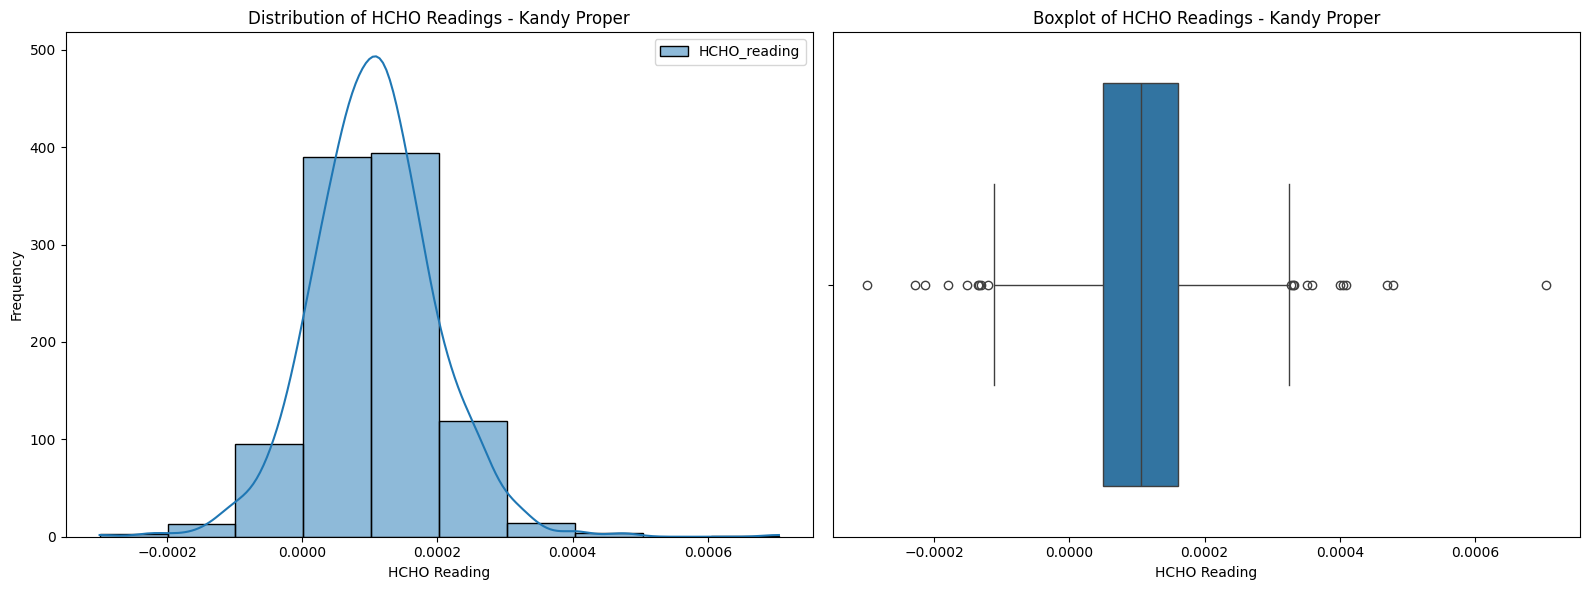

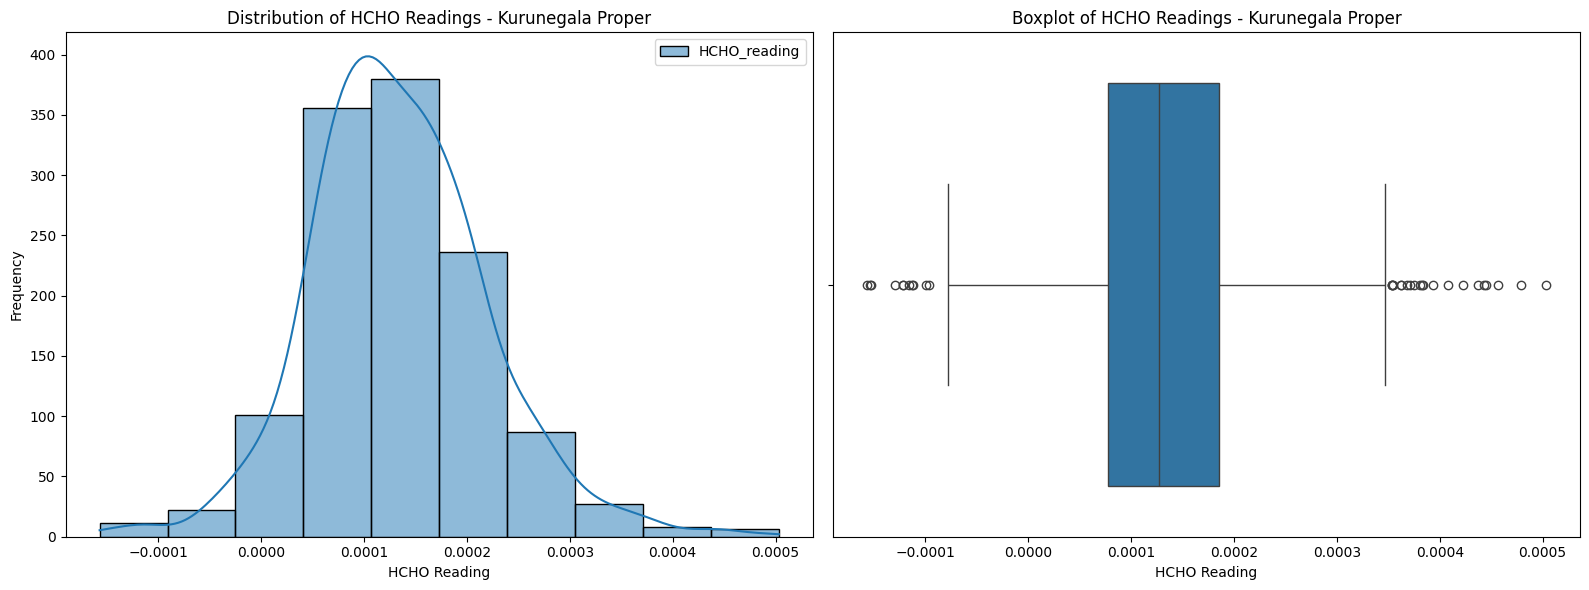

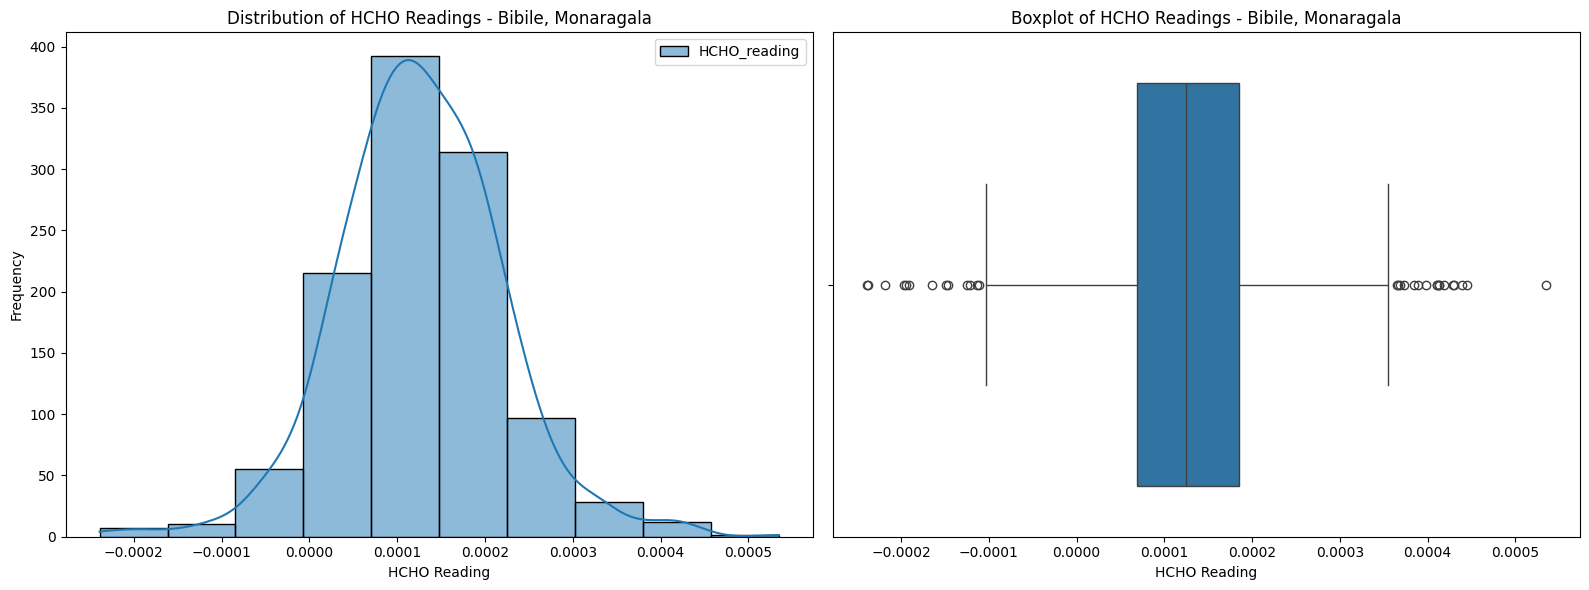

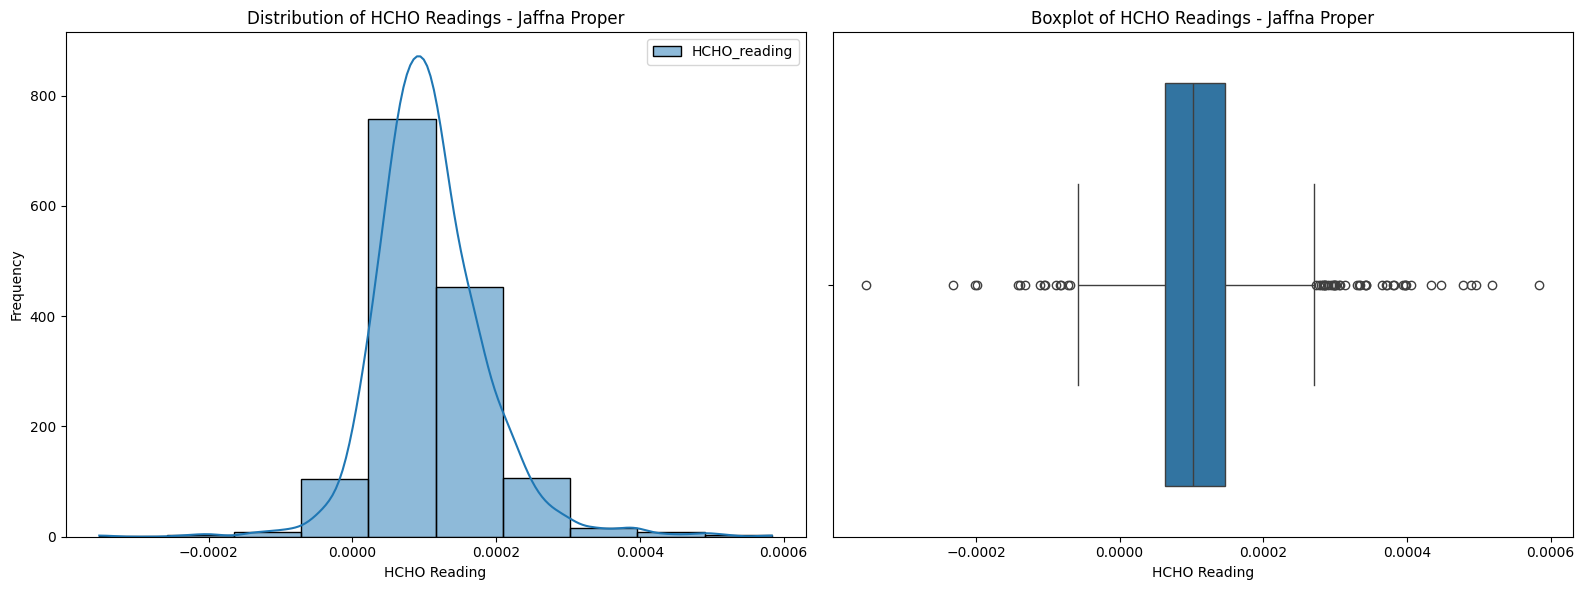

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique locations
unique_locations = data.select("Location").distinct().rdd.flatMap(lambda x: x).collect()

# Plot separate histograms and boxplots for each location
for location in unique_locations:
    # Filter data for the current location
    location_data = data.filter(col("Location") == location)

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Histogram
    sns.histplot(location_data.select("HCHO_reading").toPandas(), bins=10, kde=True, ax=axs[0])
    axs[0].set_xlabel("HCHO Reading")
    axs[0].set_ylabel("Frequency")
    axs[0].set_title(f"Distribution of HCHO Readings - {location}")

    # Boxplot
    sns.boxplot(x="HCHO_reading", data=location_data.toPandas(), ax=axs[1])
    axs[1].set_xlabel("HCHO Reading")
    axs[1].set_title(f"Boxplot of HCHO Readings - {location}")

    plt.tight_layout()
    plt.show()


# **Data Preprocessing**

**Handling missing values**

In [20]:
data.describe()

DataFrame[summary: string, HCHO_reading: string, Location: string, Current_Date: string, Next_Date: string]

In [21]:
from pyspark.sql.functions import when, mean, mode
from pyspark.sql.window import Window

# Fill missing values in the "HCHO reading" column based on mean value of each location
# data = data.withColumn("HCHO_reading", when(data["HCHO_reading"].isNull(), mean(data["HCHO_reading"]).over(Window.partitionBy("Location"))).otherwise(data["HCHO_reading"]))

# Fill missing values in the "HCHO reading" column based on mode value of each location
# data = data.withColumn("HCHO_reading", when(data["HCHO_reading"].isNull(), mode(data["HCHO_reading"]).over(Window.partitionBy("Location"))).otherwise(data["HCHO_reading"]))



In [22]:
# # forward fill

# from pyspark.sql import SparkSession
# from pyspark.sql import Window
# from pyspark.sql.functions import coalesce, last, first


# # Assume your DataFrame is named 'data'
# # Define the window specifications
# w1 = Window.partitionBy("Location")
# w2 = Window.partitionBy("Location")

# # Calculate forward-fill values for HCHO_reading
# data = data.withColumn("HCHO_reading_new", coalesce(last("HCHO_reading", True).over(w1), first("HCHO_reading", True).over(w2))) \
#     .select("HCHO_reading", "Location", "Current_Date", "Next_Date", "HCHO_reading_new")

# # Show the resulting DataFrame
# data.show(20)


In [23]:
# forward fill

from pyspark.sql import SparkSession
from pyspark.sql import Window
from pyspark.sql.functions import coalesce, last, first

# Create a Spark session
spark = SparkSession.builder.appName("ForwardFillExample").getOrCreate()

# Assume your DataFrame is named 'data'
# Define the window specifications
w1 = Window.partitionBy("Location").orderBy("Current_Date")
w2 = w1.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

# Calculate forward-fill values for HCHO_reading
data = data.withColumn("HCHO_reading_new", coalesce(last("HCHO_reading", True).over(w1), first("HCHO_reading", True).over(w2))) \
    .select("HCHO_reading", "Location", "Current_Date", "Next_Date", "HCHO_reading_new")

# Show the resulting DataFrame
data.show(20)


+------------+------------------+------------+----------+----------------+
|HCHO_reading|          Location|Current_Date| Next_Date|HCHO_reading_new|
+------------+------------------+------------+----------+----------------+
|        NULL|Bibile, Monaragala|  01/01/2019|02/01/2019|         9.03E-5|
|     9.03E-5|Bibile, Monaragala|  01/01/2020|02/01/2020|         9.03E-5|
|        NULL|Bibile, Monaragala|  01/01/2021|02/01/2021|         9.03E-5|
|        NULL|Bibile, Monaragala|  01/01/2022|02/01/2022|         9.03E-5|
|  1.28334E-4|Bibile, Monaragala|  01/01/2023|02/01/2023|      1.28334E-4|
|     5.19E-5|Bibile, Monaragala|  01/02/2019|02/02/2019|         5.19E-5|
|  1.27546E-4|Bibile, Monaragala|  01/02/2020|02/02/2020|      1.27546E-4|
|        NULL|Bibile, Monaragala|  01/02/2021|02/02/2021|      1.27546E-4|
|  1.02993E-4|Bibile, Monaragala|  01/02/2022|02/02/2022|      1.02993E-4|
|        NULL|Bibile, Monaragala|  01/02/2023|02/02/2023|      1.02993E-4|
|        NULL|Bibile, Mon

In [24]:
data = data.drop("HCHO_reading")
data.show(20)

+------------------+------------+----------+----------------+
|          Location|Current_Date| Next_Date|HCHO_reading_new|
+------------------+------------+----------+----------------+
|Bibile, Monaragala|  01/01/2019|02/01/2019|         9.03E-5|
|Bibile, Monaragala|  01/01/2020|02/01/2020|         9.03E-5|
|Bibile, Monaragala|  01/01/2021|02/01/2021|         9.03E-5|
|Bibile, Monaragala|  01/01/2022|02/01/2022|         9.03E-5|
|Bibile, Monaragala|  01/01/2023|02/01/2023|      1.28334E-4|
|Bibile, Monaragala|  01/02/2019|02/02/2019|         5.19E-5|
|Bibile, Monaragala|  01/02/2020|02/02/2020|      1.27546E-4|
|Bibile, Monaragala|  01/02/2021|02/02/2021|      1.27546E-4|
|Bibile, Monaragala|  01/02/2022|02/02/2022|      1.02993E-4|
|Bibile, Monaragala|  01/02/2023|02/02/2023|      1.02993E-4|
|Bibile, Monaragala|  01/03/2019|02/03/2019|      1.02993E-4|
|Bibile, Monaragala|  01/03/2020|02/03/2020|       1.3294E-4|
|Bibile, Monaragala|  01/03/2021|02/03/2021|      1.45066E-4|
|Bibile,

In [25]:
data = data.withColumnRenamed("HCHO_reading_new", "HCHO_reading")

# Show the updated DataFrame
data.show(20)

+------------------+------------+----------+------------+
|          Location|Current_Date| Next_Date|HCHO_reading|
+------------------+------------+----------+------------+
|Bibile, Monaragala|  01/01/2019|02/01/2019|     9.03E-5|
|Bibile, Monaragala|  01/01/2020|02/01/2020|     9.03E-5|
|Bibile, Monaragala|  01/01/2021|02/01/2021|     9.03E-5|
|Bibile, Monaragala|  01/01/2022|02/01/2022|     9.03E-5|
|Bibile, Monaragala|  01/01/2023|02/01/2023|  1.28334E-4|
|Bibile, Monaragala|  01/02/2019|02/02/2019|     5.19E-5|
|Bibile, Monaragala|  01/02/2020|02/02/2020|  1.27546E-4|
|Bibile, Monaragala|  01/02/2021|02/02/2021|  1.27546E-4|
|Bibile, Monaragala|  01/02/2022|02/02/2022|  1.02993E-4|
|Bibile, Monaragala|  01/02/2023|02/02/2023|  1.02993E-4|
|Bibile, Monaragala|  01/03/2019|02/03/2019|  1.02993E-4|
|Bibile, Monaragala|  01/03/2020|02/03/2020|   1.3294E-4|
|Bibile, Monaragala|  01/03/2021|02/03/2021|  1.45066E-4|
|Bibile, Monaragala|  01/03/2022|02/03/2022|    -2.13E-5|
|Bibile, Monar

In [26]:
from pyspark.sql.functions import to_date

# Convert "Current_Date" column to DateType
data = data.withColumn("Current_Date", to_date("Current_Date", "dd/MM/yyyy"))
data = data.withColumn("Next_Date", to_date("Next_Date", "dd/MM/yyyy"))

# Order by "Current_Date" ascending
data = data.orderBy(col("Current_Date"))

# Show the updated DataFrame
data.show(20)


+-------------------+------------+----------+------------+
|           Location|Current_Date| Next_Date|HCHO_reading|
+-------------------+------------+----------+------------+
| Bibile, Monaragala|  2019-01-01|2019-01-02|     9.03E-5|
|     Colombo Proper|  2019-01-01|2019-01-02|  1.96983E-4|
|   Deniyaya, Matara|  2019-01-01|2019-01-02|     5.58E-5|
|      Jaffna Proper|  2019-01-01|2019-01-02|     5.83E-5|
|       Kandy Proper|  2019-01-01|2019-01-02|  1.76071E-4|
|  Kurunegala Proper|  2019-01-01|2019-01-02|     8.83E-5|
|Nuwara Eliya Proper|  2019-01-01|2019-01-02|    -9.66E-5|
| Bibile, Monaragala|  2019-01-02|2019-01-03|     1.92E-5|
|     Colombo Proper|  2019-01-02|2019-01-03|  2.62552E-4|
|   Deniyaya, Matara|  2019-01-02|2019-01-03|      5.8E-6|
|      Jaffna Proper|  2019-01-02|2019-01-03|  1.01795E-4|
|       Kandy Proper|  2019-01-02|2019-01-03|     9.22E-5|
|  Kurunegala Proper|  2019-01-02|2019-01-03|  1.37079E-4|
|Nuwara Eliya Proper|  2019-01-02|2019-01-03|    -8.92E-

In [27]:
# # Sort by Current_Date within each location group
# # data = data.orderBy(col("Location"), col("Current_Date"))

# # Alternatively, for descending order within location groups:
# data_new = data.orderBy(col("Current_Date").asc())

# # Show the updated DataFrame
# data_new.show(20)


In [28]:
# Check if there are null values in the columns,
hcho = data.filter(col("HCHO_reading").isNull()).count()
location = data.filter(col("Location").isNull()).count()
currentDate = data.filter(col("Current_Date").isNull()).count()
nextDate = data.filter(col("Next_Date").isNull()).count()

# Print the results
print("Null value count")
print("HCHO_reading:", hcho)
print("Location:", location)
print("Current_Date:", currentDate)
print("Next_Date:", nextDate)

Null value count
HCHO_reading: 0
Location: 0
Current_Date: 0
Next_Date: 0


In [29]:
data.filter(data["Location"] == "Colombo Proper").show(50)

+--------------+------------+----------+------------+
|      Location|Current_Date| Next_Date|HCHO_reading|
+--------------+------------+----------+------------+
|Colombo Proper|  2019-01-01|2019-01-02|  1.96983E-4|
|Colombo Proper|  2019-01-02|2019-01-03|  2.62552E-4|
|Colombo Proper|  2019-01-03|2019-01-04|     9.85E-5|
|Colombo Proper|  2019-01-04|2019-01-05|  2.09932E-4|
|Colombo Proper|  2019-01-05|2019-01-06|  1.78534E-4|
|Colombo Proper|  2019-01-06|2019-01-07|   1.0823E-4|
|Colombo Proper|  2019-01-07|2019-01-08|  3.92683E-4|
|Colombo Proper|  2019-01-08|2019-01-09|     9.15E-5|
|Colombo Proper|  2019-01-09|2019-01-10|  1.20598E-4|
|Colombo Proper|  2019-01-10|2019-01-11|  1.29772E-4|
|Colombo Proper|  2019-01-11|2019-01-12|  2.23919E-4|
|Colombo Proper|  2019-01-12|2019-01-13|  1.56942E-4|
|Colombo Proper|  2019-01-13|2019-01-14|     3.76E-5|
|Colombo Proper|  2019-01-14|2019-01-15|  1.33629E-4|
|Colombo Proper|  2019-01-15|2019-01-16|     6.37E-5|
|Colombo Proper|  2019-01-16

In [30]:
data.filter(data["Location"] == "Bibile, Monaragala").show(50)

+------------------+------------+----------+------------+
|          Location|Current_Date| Next_Date|HCHO_reading|
+------------------+------------+----------+------------+
|Bibile, Monaragala|  2019-01-01|2019-01-02|     9.03E-5|
|Bibile, Monaragala|  2019-01-02|2019-01-03|     1.92E-5|
|Bibile, Monaragala|  2019-01-03|2019-01-04|     2.81E-5|
|Bibile, Monaragala|  2019-01-04|2019-01-05|     3.75E-5|
|Bibile, Monaragala|  2019-01-05|2019-01-06|     -1.8E-5|
|Bibile, Monaragala|  2019-01-06|2019-01-07|  1.45784E-4|
|Bibile, Monaragala|  2019-01-07|2019-01-08|     2.83E-5|
|Bibile, Monaragala|  2019-01-08|2019-01-09|  1.40709E-4|
|Bibile, Monaragala|  2019-01-09|2019-01-10|  1.42085E-4|
|Bibile, Monaragala|  2019-01-10|2019-01-11|  1.58639E-4|
|Bibile, Monaragala|  2019-01-11|2019-01-12|     2.01E-5|
|Bibile, Monaragala|  2019-01-12|2019-01-13|  1.58279E-4|
|Bibile, Monaragala|  2019-01-13|2019-01-14|     9.33E-5|
|Bibile, Monaragala|  2019-01-14|2019-01-15|    1.132E-4|
|Bibile, Monar

In [31]:
data.printSchema()

root
 |-- Location: string (nullable = true)
 |-- Current_Date: date (nullable = true)
 |-- Next_Date: date (nullable = true)
 |-- HCHO_reading: double (nullable = true)



**Handling outliers**

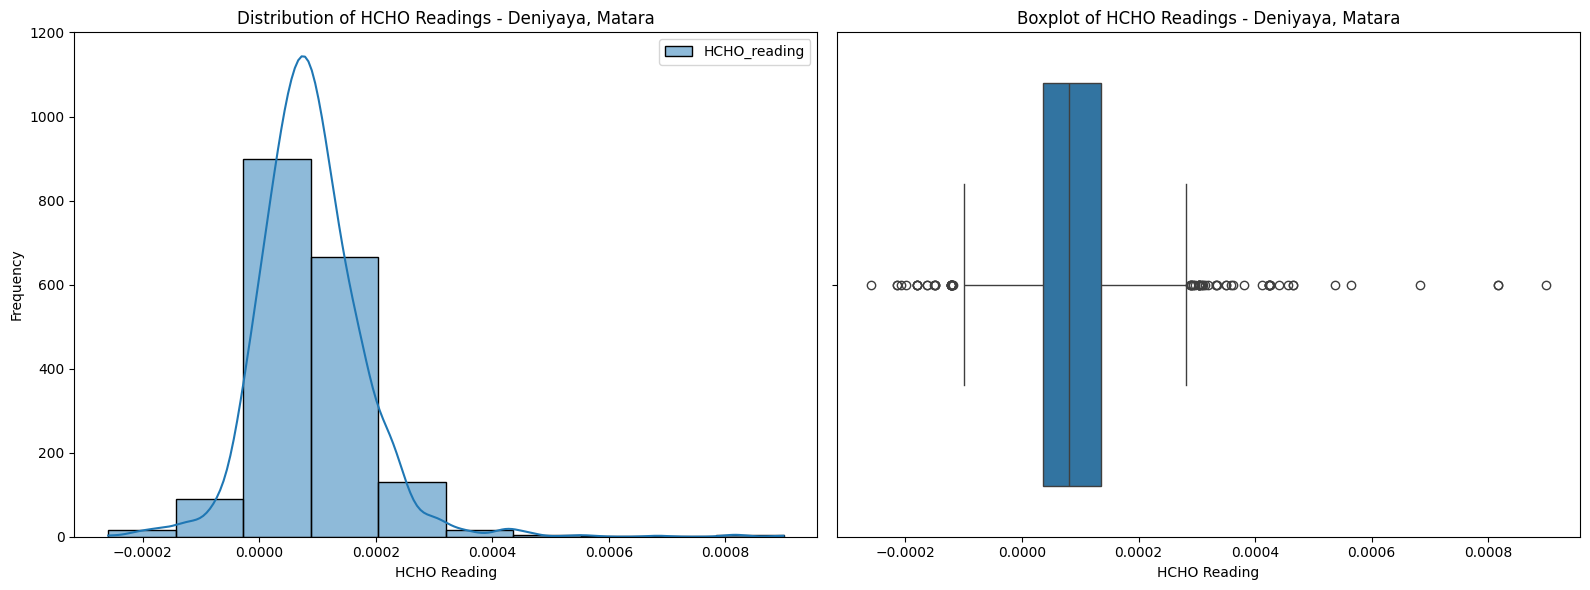

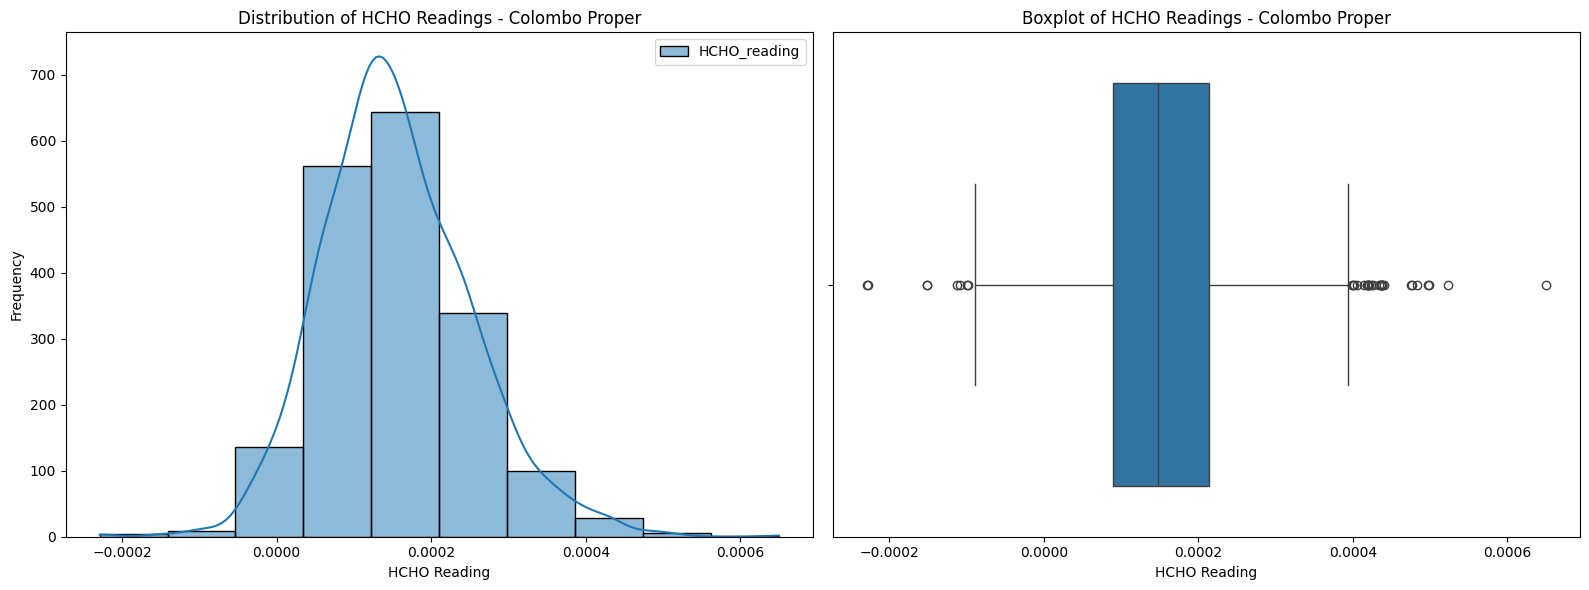

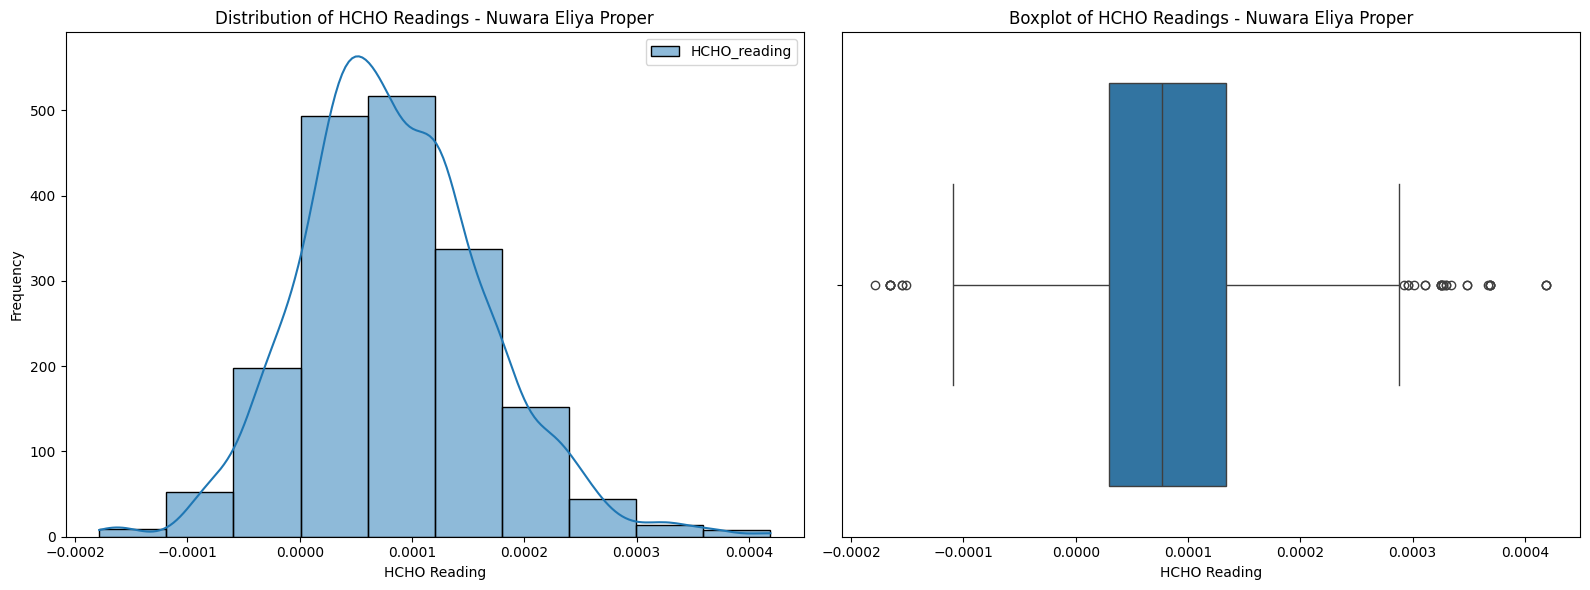

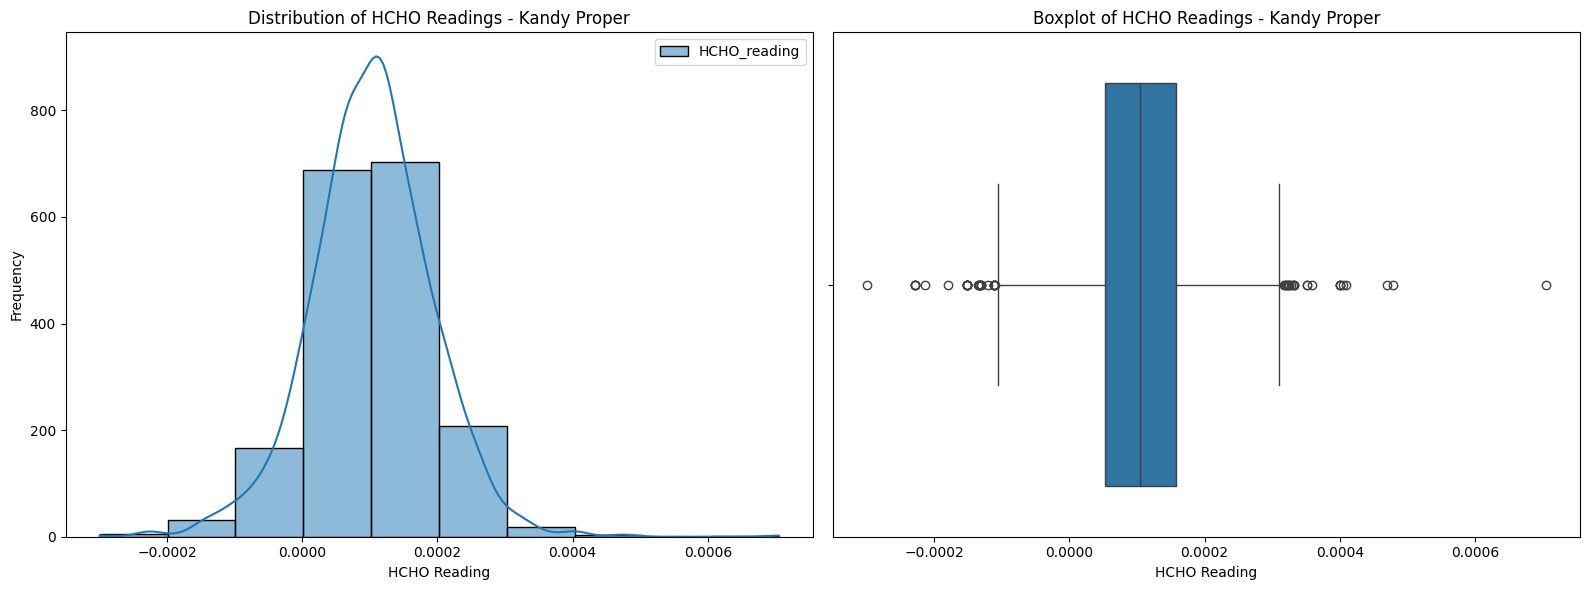

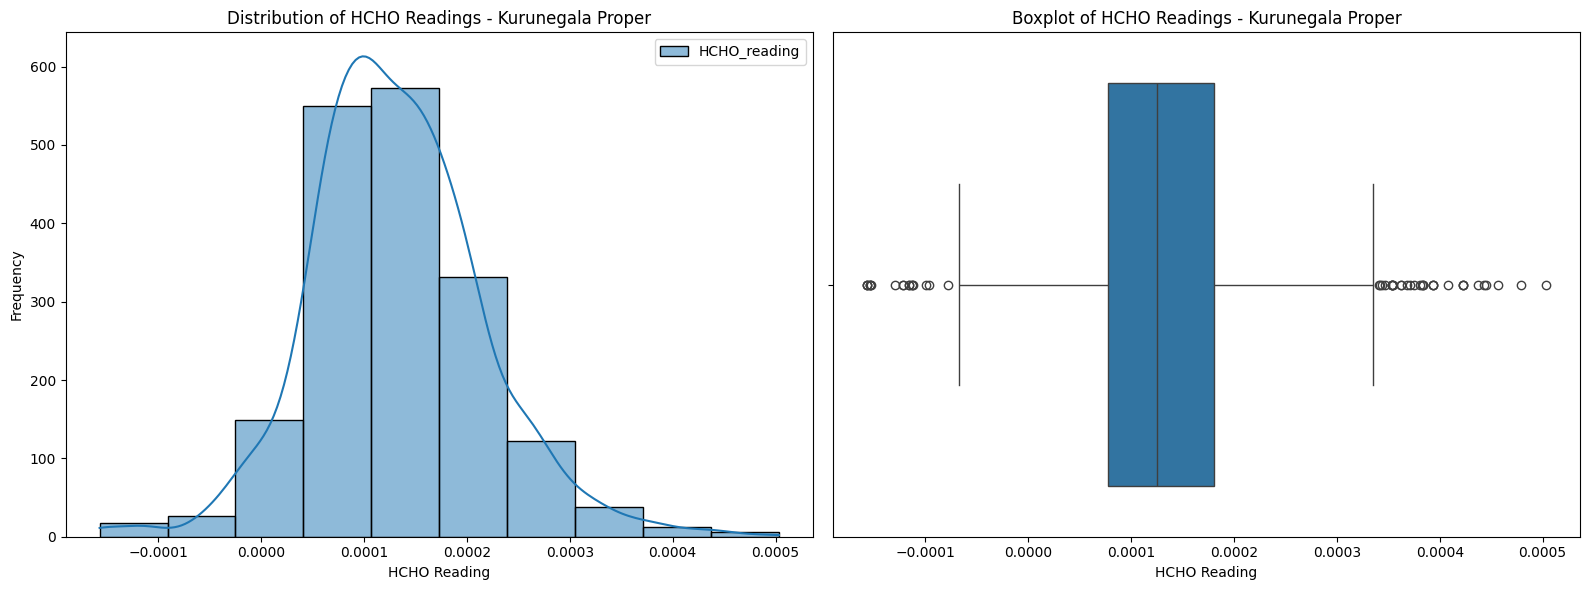

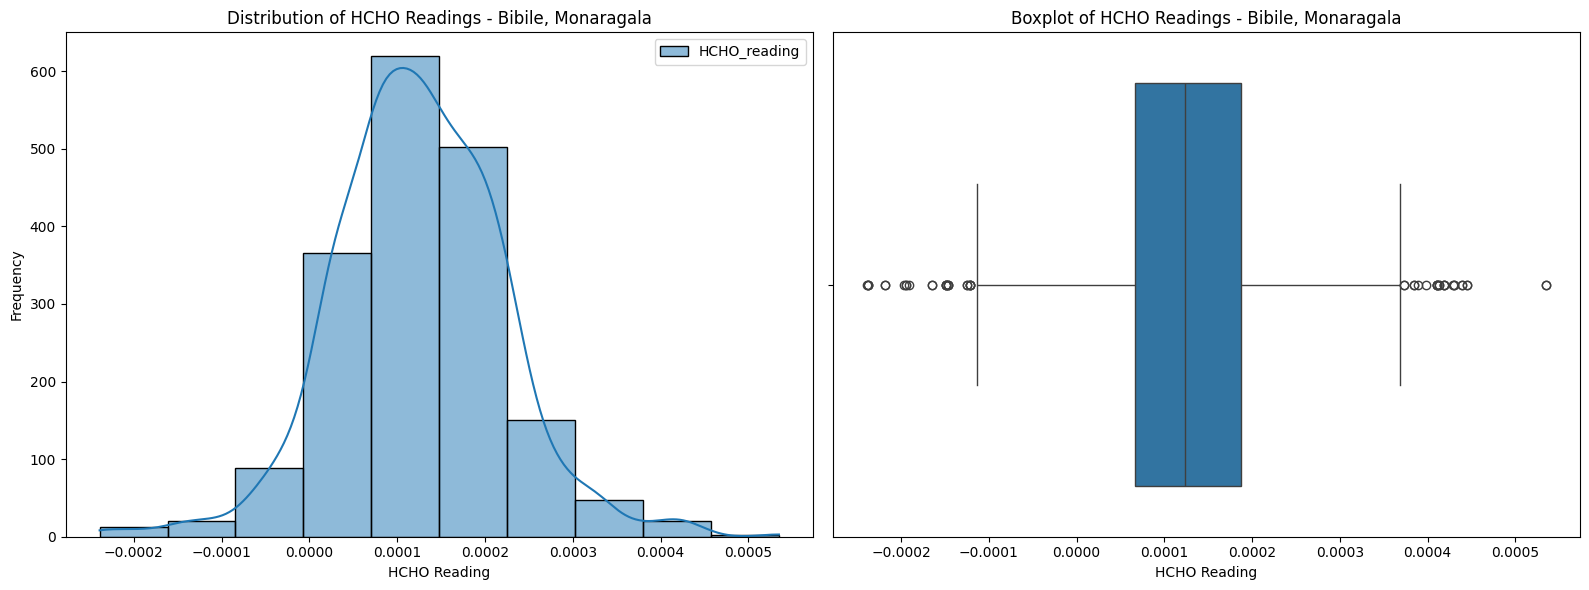

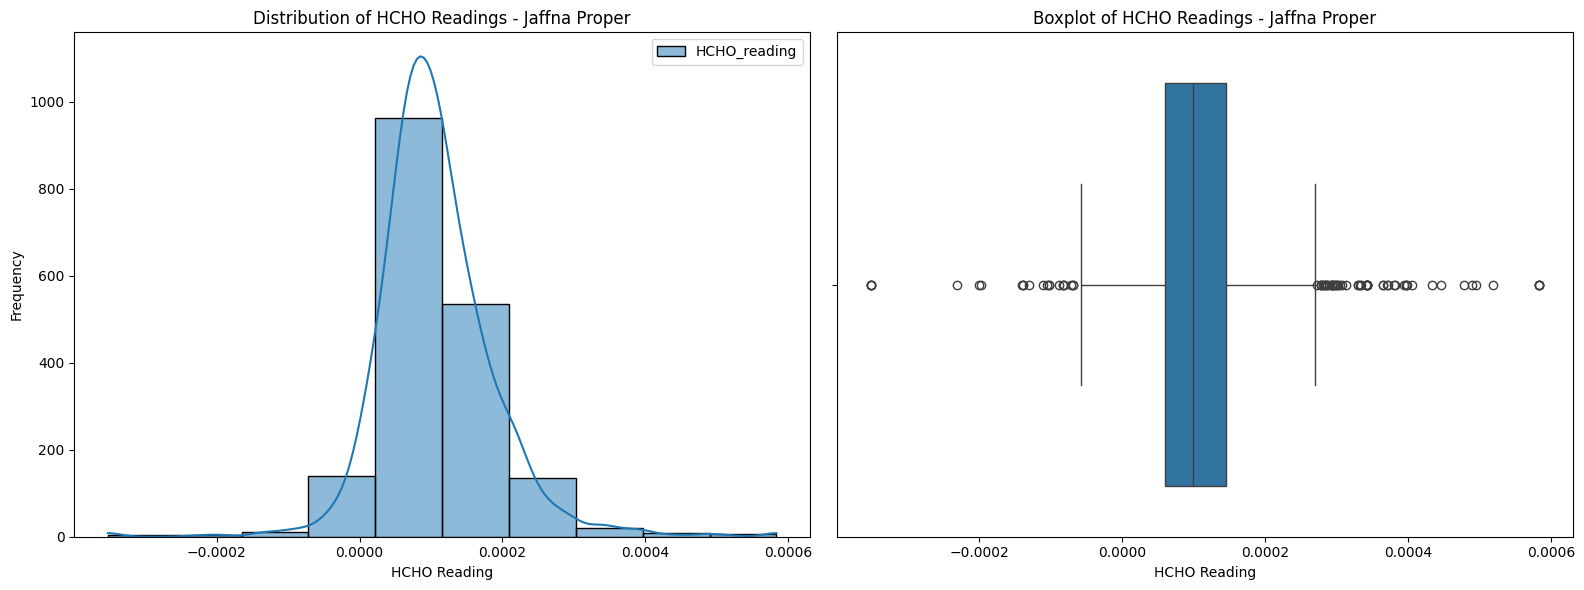

In [32]:
# to identify data outliers

# Plot separate histograms and boxplots for each location
for location in unique_locations:
    # Filter data for the current location
    location_data = data.filter(col("Location") == location)

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Histogram
    sns.histplot(location_data.select("HCHO_reading").toPandas(), bins=10, kde=True, ax=axs[0])
    axs[0].set_xlabel("HCHO Reading")
    axs[0].set_ylabel("Frequency")
    axs[0].set_title(f"Distribution of HCHO Readings - {location}")

    # Boxplot
    sns.boxplot(x="HCHO_reading", data=location_data.toPandas(), ax=axs[1])
    axs[1].set_xlabel("HCHO Reading")
    axs[1].set_title(f"Boxplot of HCHO Readings - {location}")

    plt.tight_layout()
    plt.show()


In [33]:
# # Plot separate histograms and boxplots for each location

# from pyspark.sql.functions import udf
# from pyspark.sql.types import DoubleType

# def trim_outliers(value):
#   lower_bound = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR
#   if lower_bound <= value <= upper_bound:
#       return value
#   elif value < lower_bound:
#       return lower_bound
#   else:
#       return upper_bound


# for location in unique_locations:
#     # Filter data for the current location
#     location_data = data.filter(col("Location") == location)

#     # Calculate Q1, Q3, and IQR
#     quantiles = location_data.approxQuantile("HCHO_reading", [0.25, 0.75], 0.01)
#     Q1, Q3 = quantiles[0], quantiles[1]
#     IQR = Q3 - Q1

#     # Define a user-defined function (UDF) to replace outliers
#     trim_outliers_udf = udf(trim_outliers, DoubleType())

#     # Apply the UDF to the HCHO_reading column
#     location_data_cleaned = location_data.withColumn("HCHO_reading_trimmed", trim_outliers_udf(col("HCHO_reading")))

#     # Show the cleaned DataFrame
#     # location_data.show(20)

#     # Create subplots
#     fig, axs = plt.subplots(1, 2, figsize=(16, 6))

#     # Histogram
#     sns.histplot(location_data_cleaned.select("HCHO_reading_trimmed").toPandas(), bins=10, kde=True, ax=axs[0])
#     axs[0].set_xlabel("HCHO_reading_trimmed")
#     axs[0].set_ylabel("Frequency")
#     axs[0].set_title(f"Distribution of HCHO Readings - {location}")

#     # Boxplot
#     sns.boxplot(x="HCHO_reading_trimmed", data=location_data_cleaned.toPandas(), ax=axs[1])
#     axs[1].set_xlabel("HCHO_reading_trimmed")
#     axs[1].set_title(f"Boxplot of HCHO Readings - {location}")

#     plt.tight_layout()
#     plt.show()



In [34]:
# location_data_cleaned.describe()

In [35]:
# from pyspark.sql.functions import col, regexp_extract

# # Check Location column for inconsistencies
# location_data_cleaned.groupBy("Location").count().orderBy(col("count").desc()).show()


In [36]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType
from pyspark.sql import functions as F

# Calculate Q1, Q3, and IQR for each location
grouped_data = data.groupBy("Location")
quantiles = grouped_data.agg(
    F.expr("percentile_approx(HCHO_reading, 0.25)").alias("Q1"),
    F.expr("percentile_approx(HCHO_reading, 0.75)").alias("Q3")
)

# Calculate IQR
IQR = quantiles.withColumn("IQR", col("Q3") - col("Q1"))

# Define a user-defined function (UDF) to replace outliers
def trim_outliers(value, Q1, Q3, IQR):
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if lower_bound <= value <= upper_bound:
        return value
    elif value < lower_bound:
        return lower_bound
    else:
        return upper_bound

trim_outliers_udf = udf(trim_outliers, DoubleType())

# Apply the UDF to the HCHO_reading column for each location
data= data.join(IQR, "Location").withColumn(
    "HCHO_reading_trimmed",
    trim_outliers_udf(col("HCHO_reading"), col("Q1"), col("Q3"), col("IQR"))
)

# Show the cleaned DataFrame
data.show()


+------------+------------+----------+------------+-------+----------+----------+--------------------+
|    Location|Current_Date| Next_Date|HCHO_reading|     Q1|        Q3|       IQR|HCHO_reading_trimmed|
+------------+------------+----------+------------+-------+----------+----------+--------------------+
|Kandy Proper|  2023-12-31|2024-01-01|  2.18691E-4|5.26E-5|1.58323E-4|1.05723E-4|          2.18691E-4|
|Kandy Proper|  2022-12-31|2023-01-01|  2.18691E-4|5.26E-5|1.58323E-4|1.05723E-4|          2.18691E-4|
|Kandy Proper|  2021-12-31|2022-01-01|     -1.1E-5|5.26E-5|1.58323E-4|1.05723E-4|             -1.1E-5|
|Kandy Proper|  2020-12-31|2021-01-01|     -1.1E-5|5.26E-5|1.58323E-4|1.05723E-4|             -1.1E-5|
|Kandy Proper|  2019-12-31|2020-01-01|     -1.1E-5|5.26E-5|1.58323E-4|1.05723E-4|             -1.1E-5|
|Kandy Proper|  2023-10-31|2023-11-01|    -1.73E-5|5.26E-5|1.58323E-4|1.05723E-4|            -1.73E-5|
|Kandy Proper|  2022-10-31|2022-11-01|    -1.73E-5|5.26E-5|1.58323E-4|1.0

In [37]:
from pyspark.sql.functions import col, regexp_extract

# Check Location column for inconsistencies
data.groupBy("Location").count().orderBy(col("count").desc()).show()


+-------------------+-----+
|           Location|count|
+-------------------+-----+
|   Deniyaya, Matara| 1826|
|     Colombo Proper| 1826|
|Nuwara Eliya Proper| 1826|
|       Kandy Proper| 1826|
|  Kurunegala Proper| 1826|
| Bibile, Monaragala| 1826|
|      Jaffna Proper| 1826|
+-------------------+-----+



In [38]:
data = data.drop("HCHO_reading")
data = data.drop("Q1")
data = data.drop("Q3")
data = data.drop("IQR")

data.show()

+------------+------------+----------+--------------------+
|    Location|Current_Date| Next_Date|HCHO_reading_trimmed|
+------------+------------+----------+--------------------+
|Kandy Proper|  2023-12-31|2024-01-01|          2.18691E-4|
|Kandy Proper|  2022-12-31|2023-01-01|          2.18691E-4|
|Kandy Proper|  2021-12-31|2022-01-01|             -1.1E-5|
|Kandy Proper|  2020-12-31|2021-01-01|             -1.1E-5|
|Kandy Proper|  2019-12-31|2020-01-01|             -1.1E-5|
|Kandy Proper|  2023-10-31|2023-11-01|            -1.73E-5|
|Kandy Proper|  2022-10-31|2022-11-01|            -1.73E-5|
|Kandy Proper|  2021-10-31|2021-11-01|          2.13335E-4|
|Kandy Proper|  2020-10-31|2020-11-01|          2.66956E-4|
|Kandy Proper|  2019-10-31|2019-11-01|          1.58368E-4|
|Kandy Proper|  2023-08-31|2023-09-01|             1.79E-5|
|Kandy Proper|  2022-08-31|2022-09-01|             1.79E-5|
|Kandy Proper|  2021-08-31|2021-09-01|             1.79E-5|
|Kandy Proper|  2020-08-31|2020-09-01|  

In [39]:
data = data.withColumnRenamed("HCHO_reading_trimmed", "HCHO_reading")

data.show()

+------------+------------+----------+------------+
|    Location|Current_Date| Next_Date|HCHO_reading|
+------------+------------+----------+------------+
|Kandy Proper|  2023-12-31|2024-01-01|  2.18691E-4|
|Kandy Proper|  2022-12-31|2023-01-01|  2.18691E-4|
|Kandy Proper|  2021-12-31|2022-01-01|     -1.1E-5|
|Kandy Proper|  2020-12-31|2021-01-01|     -1.1E-5|
|Kandy Proper|  2019-12-31|2020-01-01|     -1.1E-5|
|Kandy Proper|  2023-10-31|2023-11-01|    -1.73E-5|
|Kandy Proper|  2022-10-31|2022-11-01|    -1.73E-5|
|Kandy Proper|  2021-10-31|2021-11-01|  2.13335E-4|
|Kandy Proper|  2020-10-31|2020-11-01|  2.66956E-4|
|Kandy Proper|  2019-10-31|2019-11-01|  1.58368E-4|
|Kandy Proper|  2023-08-31|2023-09-01|     1.79E-5|
|Kandy Proper|  2022-08-31|2022-09-01|     1.79E-5|
|Kandy Proper|  2021-08-31|2021-09-01|     1.79E-5|
|Kandy Proper|  2020-08-31|2020-09-01|     1.79E-5|
|Kandy Proper|  2019-08-31|2019-09-01|    -2.73E-5|
|Kandy Proper|  2023-07-31|2023-08-01|  1.08995E-4|
|Kandy Prope

In [40]:
# Convert "Current_Date" column to DateType
data = data.withColumn("Current_Date", to_date("Current_Date", "dd/MM/yyyy"))
data = data.withColumn("Next_Date", to_date("Next_Date", "dd/MM/yyyy"))

# Order by "Current_Date" ascending
data = data.orderBy(col("Current_Date"))

# Show the updated DataFrame
data.show(20)


+-------------------+------------+----------+------------+
|           Location|Current_Date| Next_Date|HCHO_reading|
+-------------------+------------+----------+------------+
|       Kandy Proper|  2019-01-01|2019-01-02|  1.76071E-4|
|   Deniyaya, Matara|  2019-01-01|2019-01-02|     5.58E-5|
|  Kurunegala Proper|  2019-01-01|2019-01-02|     8.83E-5|
| Bibile, Monaragala|  2019-01-01|2019-01-02|     9.03E-5|
|     Colombo Proper|  2019-01-01|2019-01-02|  1.96983E-4|
|Nuwara Eliya Proper|  2019-01-01|2019-01-02|    -9.66E-5|
|      Jaffna Proper|  2019-01-01|2019-01-02|     5.83E-5|
|  Kurunegala Proper|  2019-01-02|2019-01-03|  1.37079E-4|
|   Deniyaya, Matara|  2019-01-02|2019-01-03|      5.8E-6|
|       Kandy Proper|  2019-01-02|2019-01-03|     9.22E-5|
| Bibile, Monaragala|  2019-01-02|2019-01-03|     1.92E-5|
|     Colombo Proper|  2019-01-02|2019-01-03|  2.62552E-4|
|Nuwara Eliya Proper|  2019-01-02|2019-01-03|    -8.92E-6|
|      Jaffna Proper|  2019-01-02|2019-01-03|  1.01795E-

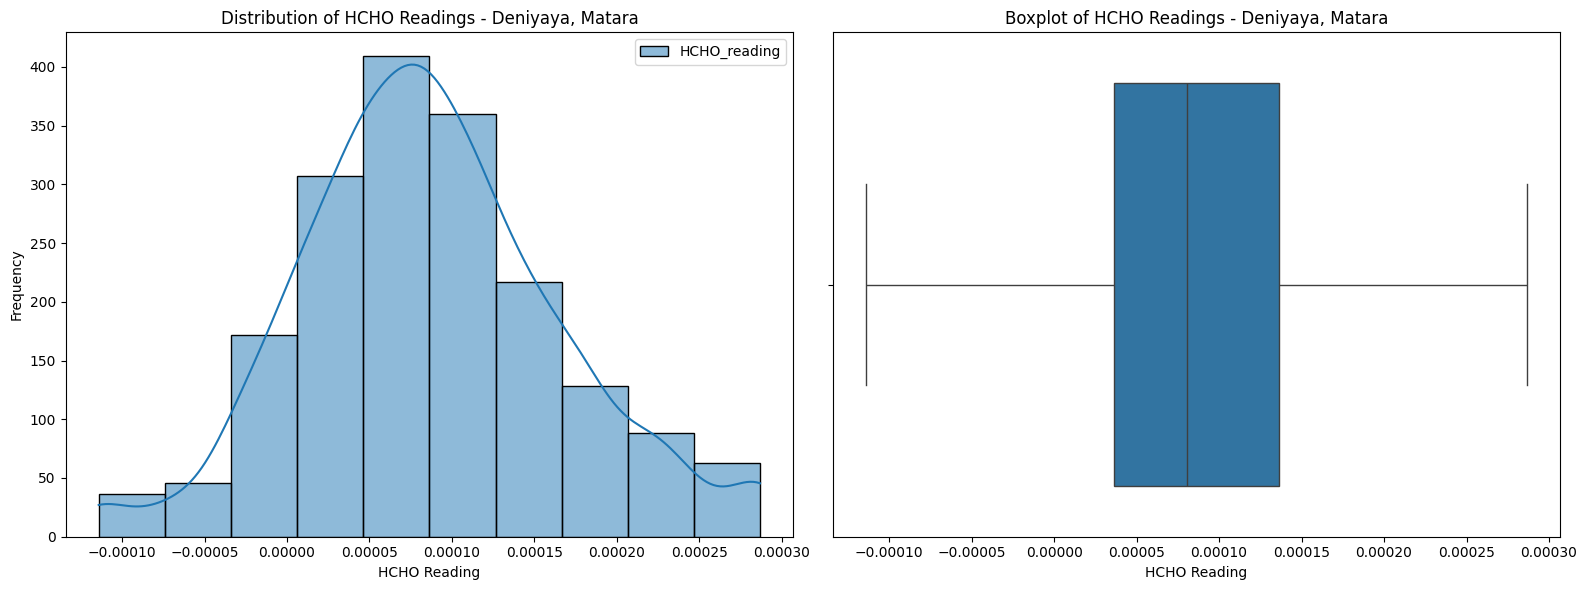

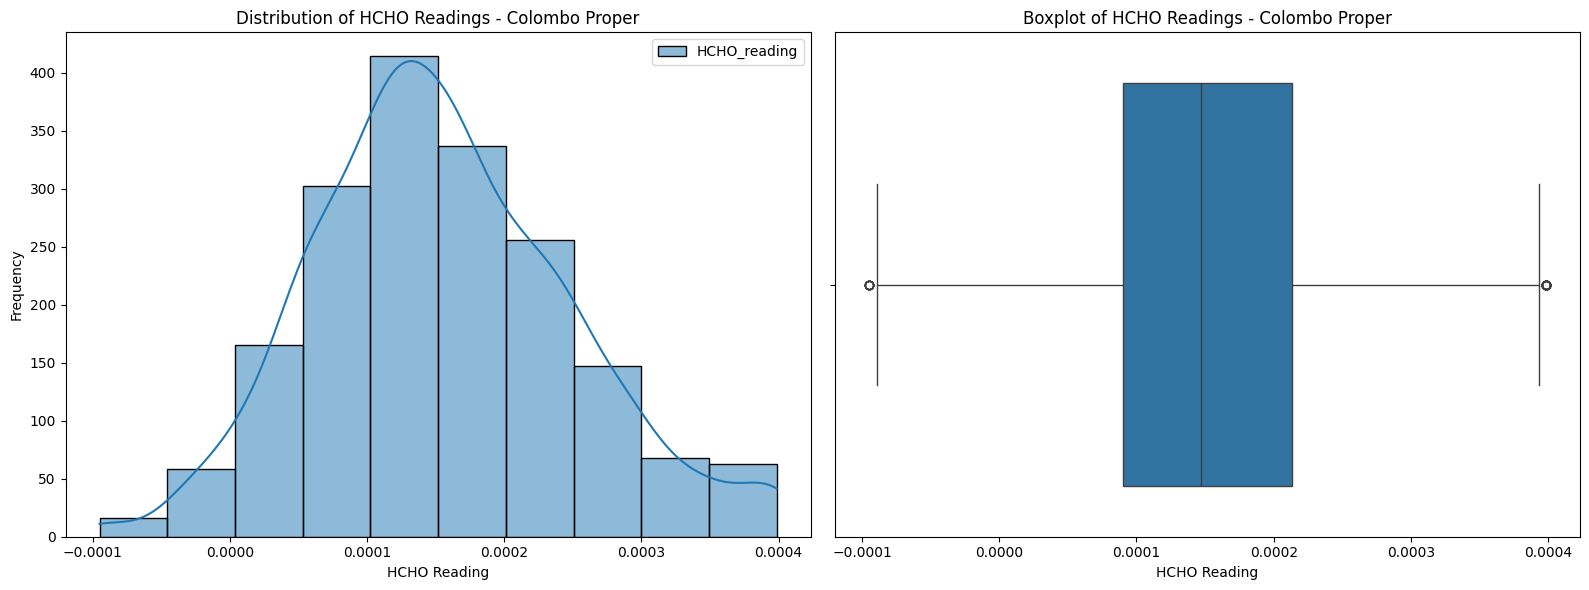

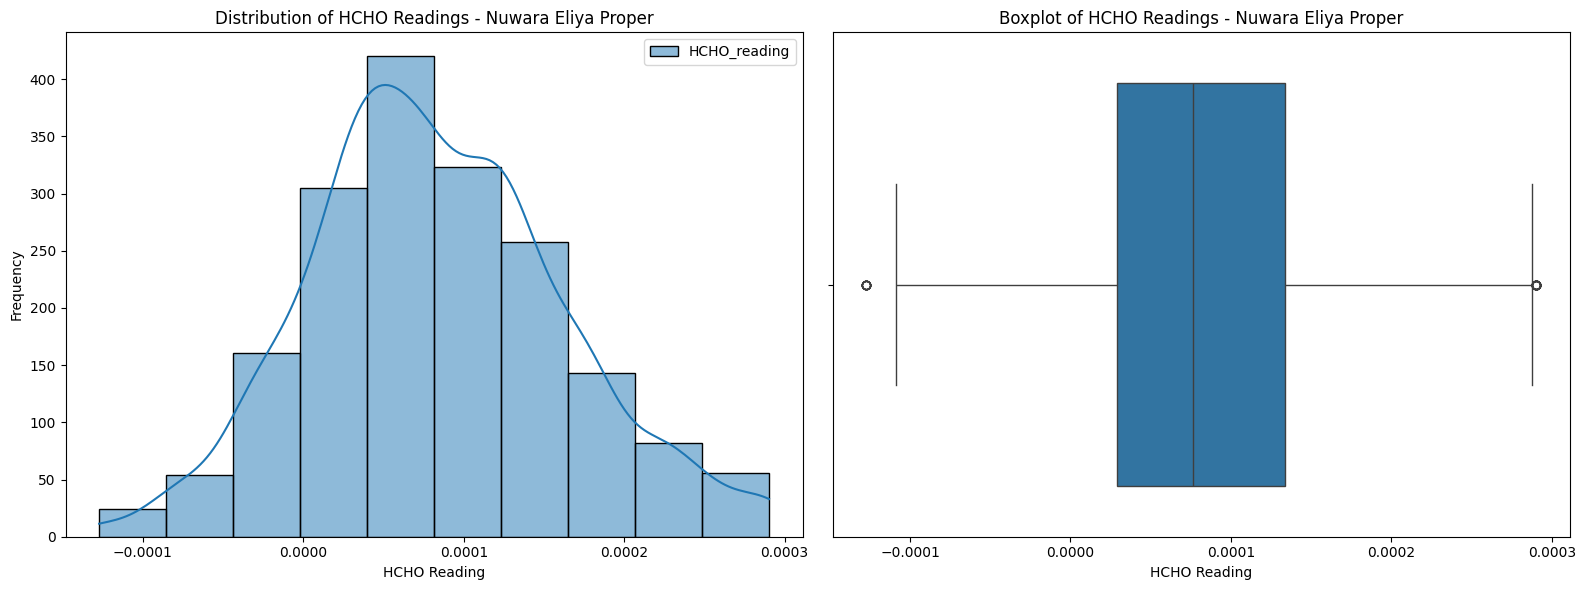

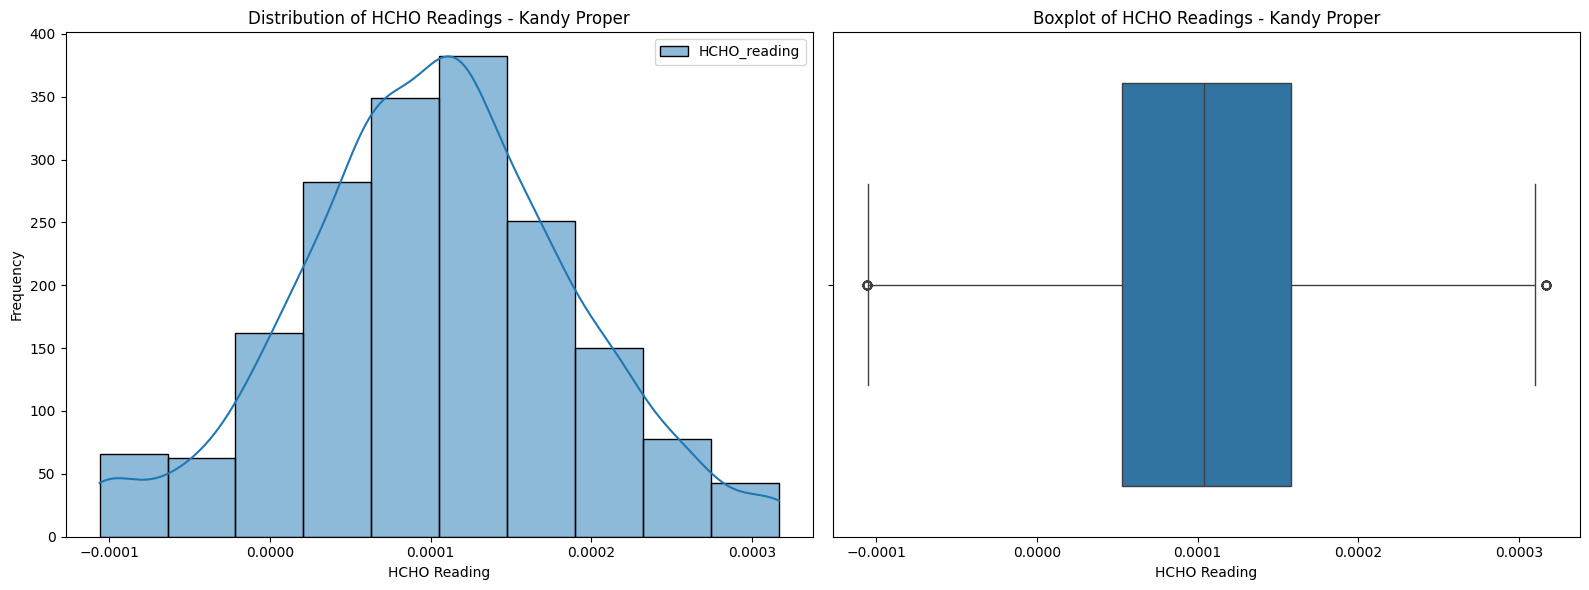

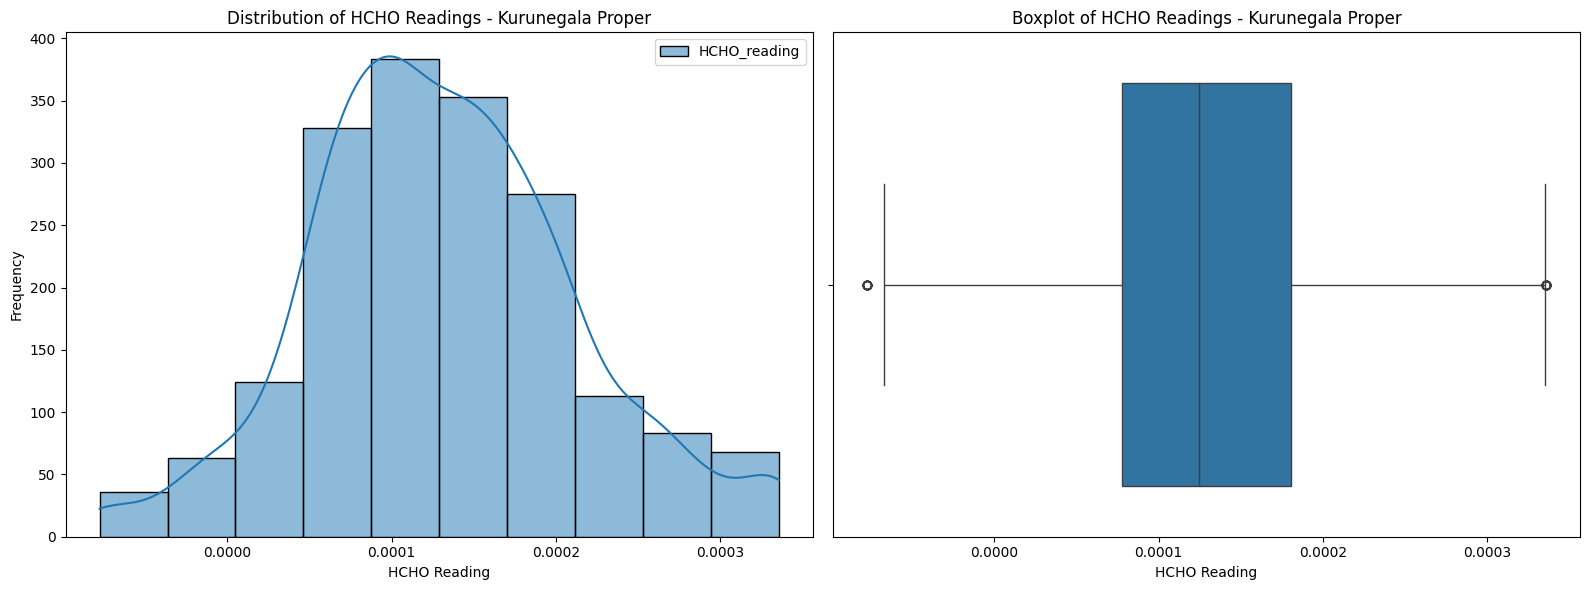

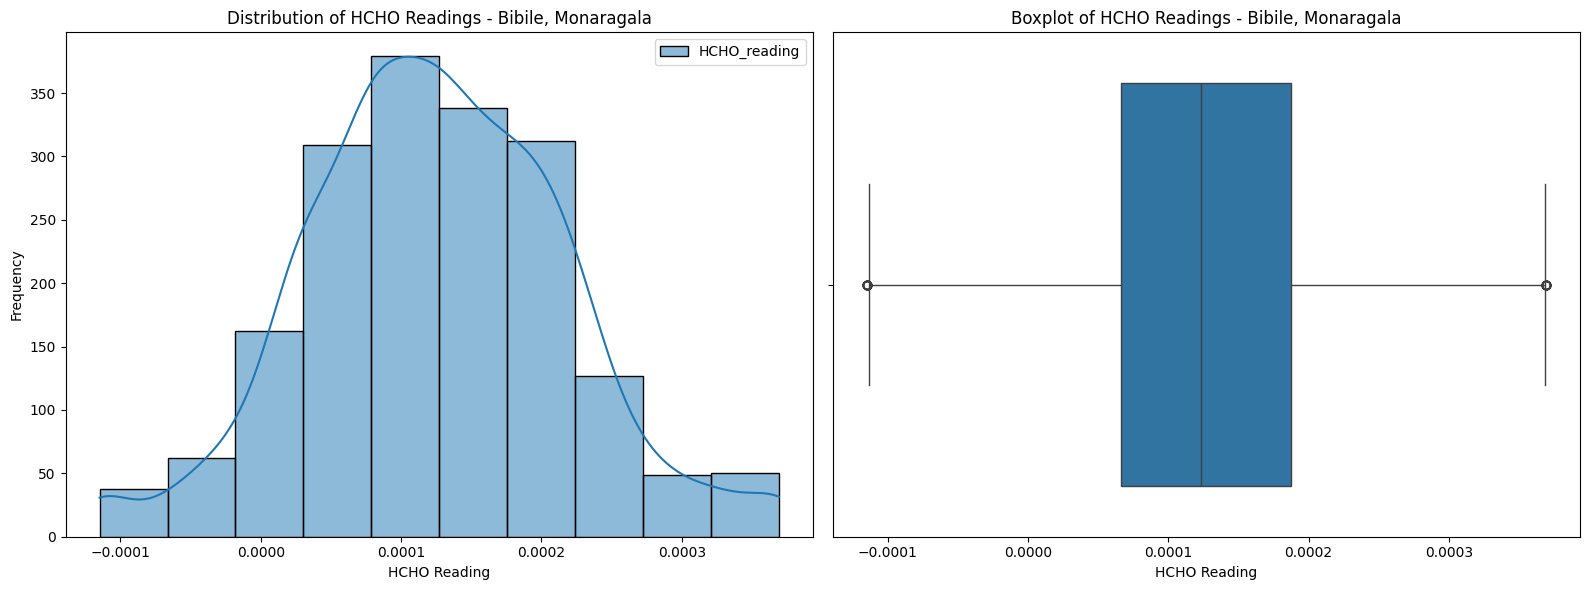

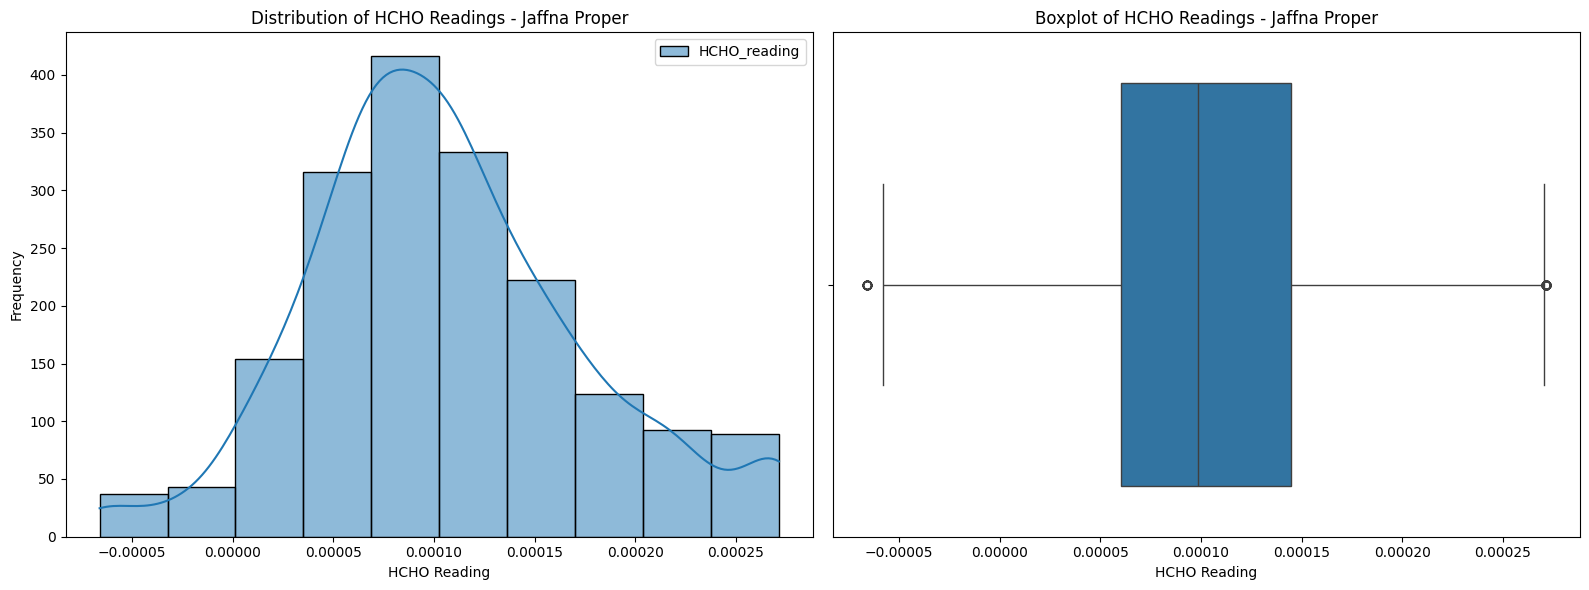

In [41]:
# to identify data outliers

# Plot separate histograms and boxplots for each location
for location in unique_locations:
    # Filter data for the current location
    location_data = data.filter(col("Location") == location)

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Histogram
    sns.histplot(location_data.select("HCHO_reading").toPandas(), bins=10, kde=True, ax=axs[0])
    axs[0].set_xlabel("HCHO Reading")
    axs[0].set_ylabel("Frequency")
    axs[0].set_title(f"Distribution of HCHO Readings - {location}")

    # Boxplot
    sns.boxplot(x="HCHO_reading", data=location_data.toPandas(), ax=axs[1])
    axs[1].set_xlabel("HCHO Reading")
    axs[1].set_title(f"Boxplot of HCHO Readings - {location}")

    plt.tight_layout()
    plt.show()


**Format inconsistencies**

"Format inconsistencies" refer to discrepancies or variations in the way data is represented within your dataset. This could include inconsistencies in data types, units of measurement, date formats, or any other aspect of data formatting that deviates from an expected or standard format.

For example:
- In a dataset containing dates, some dates might be in "YYYY-MM-DD" format while others are in "MM/DD/YYYY" format.
- Numeric values might be represented with different decimal separators (e.g., "," vs ".") or with varying precision.
- Categorical variables might have inconsistent capitalization or spelling (e.g., "Male" vs "male" or "F" vs "Female").
- Text fields might contain extra white spaces at the beginning or end of strings.

Addressing format inconsistencies involves standardizing the format of data across the dataset to ensure consistency and facilitate analysis. This typically involves tasks such as:

1. **Standardizing Date Formats**: Converting all dates to a consistent format.
2. **Consistent Numeric Representation**: Ensuring all numeric values are represented consistently, with the same decimal separator and precision.
3. **Standardizing Categorical Variables**: Ensuring consistent capitalization, spelling, and encoding for categorical variables.
4. **Handling Textual Inconsistencies**: Removing leading or trailing white spaces, correcting typographical errors, and ensuring consistent formatting of text data.
5. **Unit Conversions**: If data contains measurements in different units, converting them to a consistent unit of measurement.
6. **Encoding Standards**: Ensuring that encoding standards are consistent, especially important for text data that may contain characters from different languages or character sets.

Addressing format inconsistencies is crucial for ensuring the quality and reliability of the data and for preventing errors or biases in subsequent analysis or modeling tasks.

In [42]:
from pyspark.sql.functions import col, regexp_extract

# Check Location column for inconsistencies
data.groupBy("Location").count().orderBy(col("count").desc()).show()

# Check Current_Date and Next_Date columns for date format inconsistencies
date_format_check = data.filter(
    ~(col("Current_Date").rlike("\d{4}-\d{2}-\d{2}") & col("Next_Date").rlike("\d{4}-\d{2}-\d{2}"))
)
date_format_check.show()

# Check HCHO_reading column for numerical format inconsistencies
numerical_format_check = data.filter(~col("HCHO_reading").cast("double").isNotNull())
numerical_format_check.show()


+-------------------+-----+
|           Location|count|
+-------------------+-----+
|   Deniyaya, Matara| 1826|
|     Colombo Proper| 1826|
|Nuwara Eliya Proper| 1826|
|       Kandy Proper| 1826|
|  Kurunegala Proper| 1826|
| Bibile, Monaragala| 1826|
|      Jaffna Proper| 1826|
+-------------------+-----+

+--------+------------+---------+------------+
|Location|Current_Date|Next_Date|HCHO_reading|
+--------+------------+---------+------------+
+--------+------------+---------+------------+

+--------+------------+---------+------------+
|Location|Current_Date|Next_Date|HCHO_reading|
+--------+------------+---------+------------+
+--------+------------+---------+------------+



# **Data Visualization**

(For processed data)

In [43]:
import numpy as np

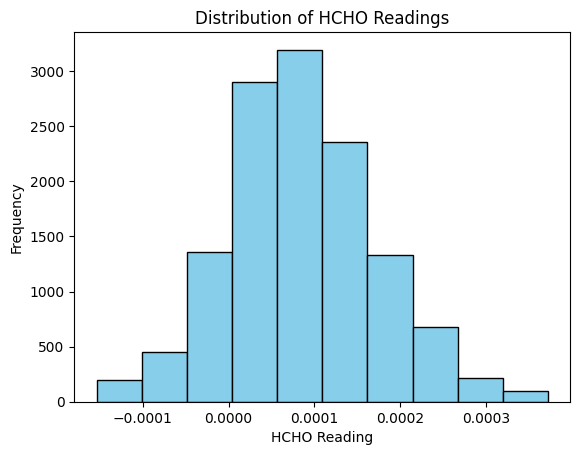

In [44]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Plot the data distribution using Spark DataFrame API
hcho_hist = data.select("HCHO_reading").rdd.flatMap(lambda x: x).histogram(10)

# Extract histogram bins and counts
bins = hcho_hist[0]
counts = hcho_hist[1]

# Plot the histogram
plt.bar(bins[:-1], counts, width=bins[1]-bins[0], color='skyblue', edgecolor='black')
plt.xlabel("HCHO Reading")
plt.ylabel("Frequency")
plt.title("Distribution of HCHO Readings")
plt.show()

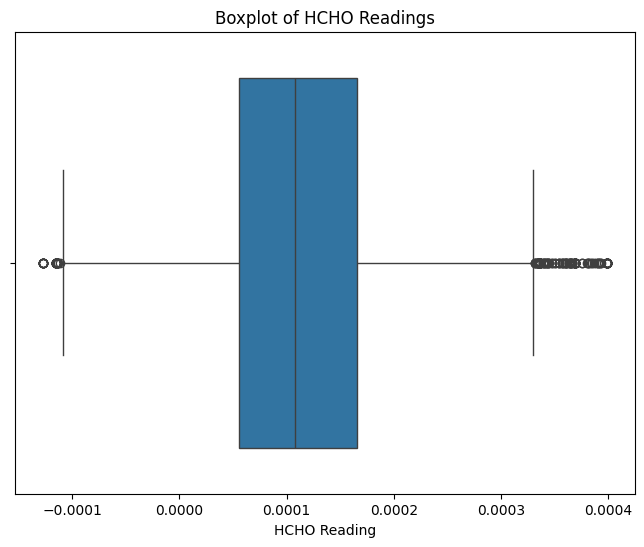

In [45]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="HCHO_reading", data=data.toPandas())
plt.xlabel("HCHO Reading")
plt.title("Boxplot of HCHO Readings")
plt.show()


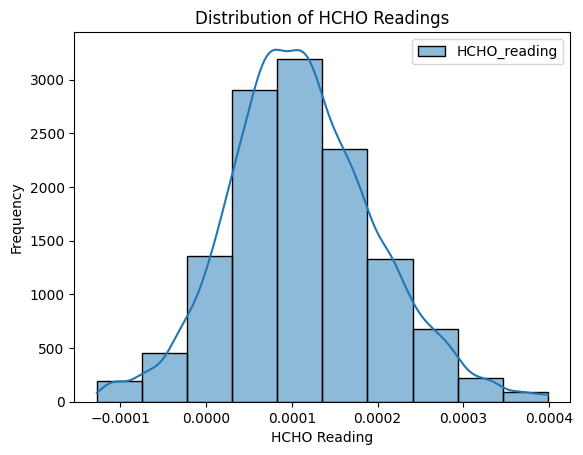

In [46]:
# Visualize data distribution

# Histogram
sns.histplot(data.select("HCHO_reading").toPandas(), bins=10, kde=True)
plt.xlabel("HCHO Reading")
plt.ylabel("Frequency")
plt.title("Distribution of HCHO Readings")
plt.show()


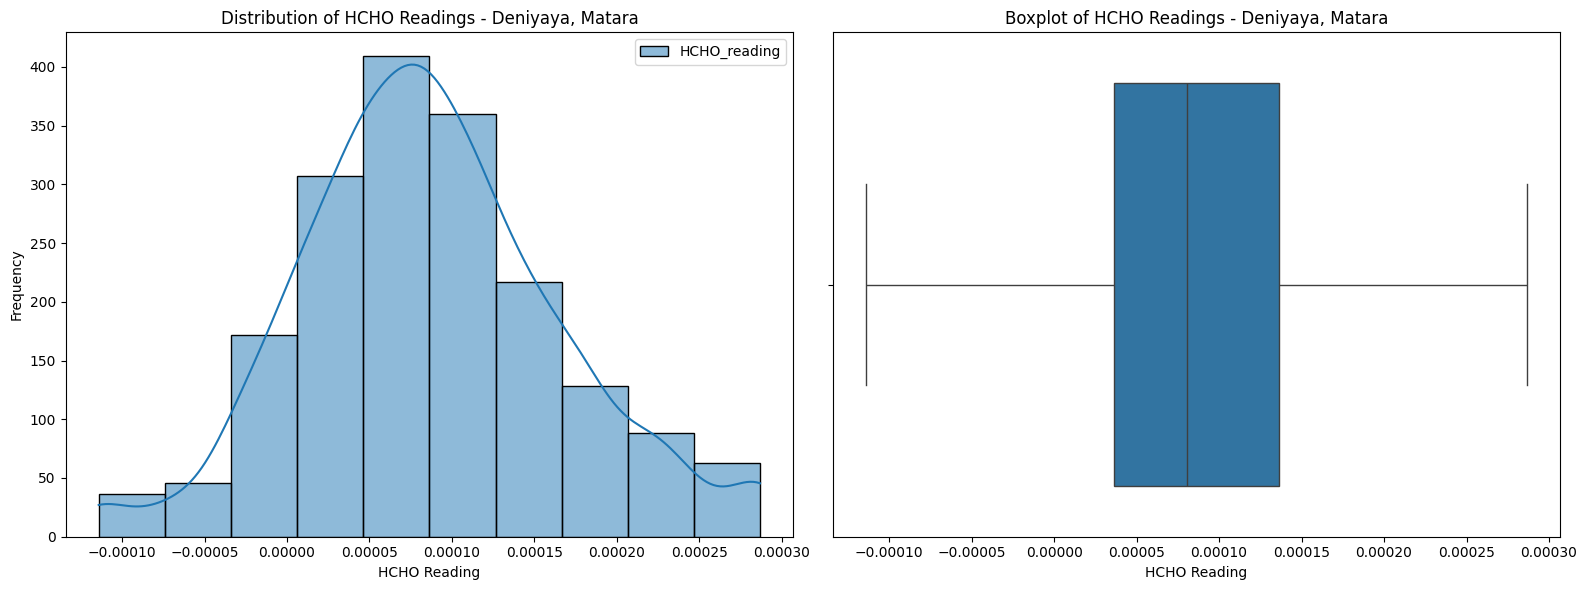

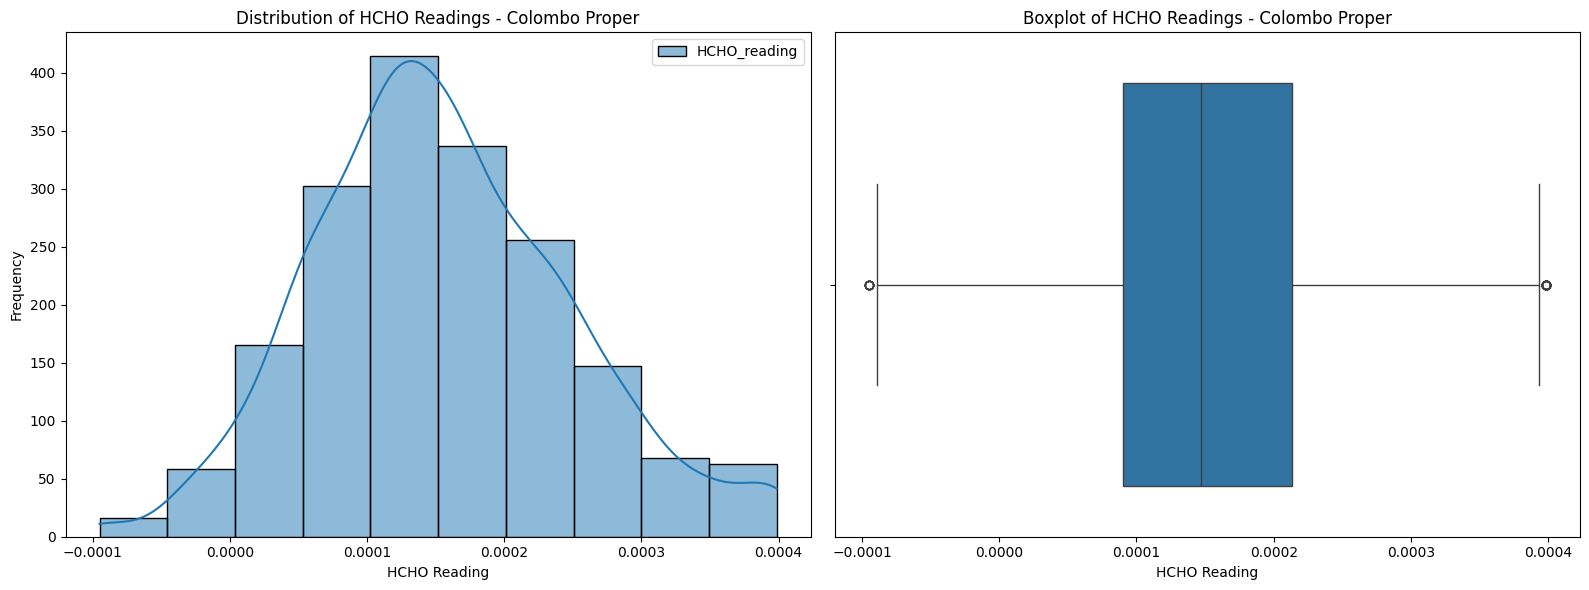

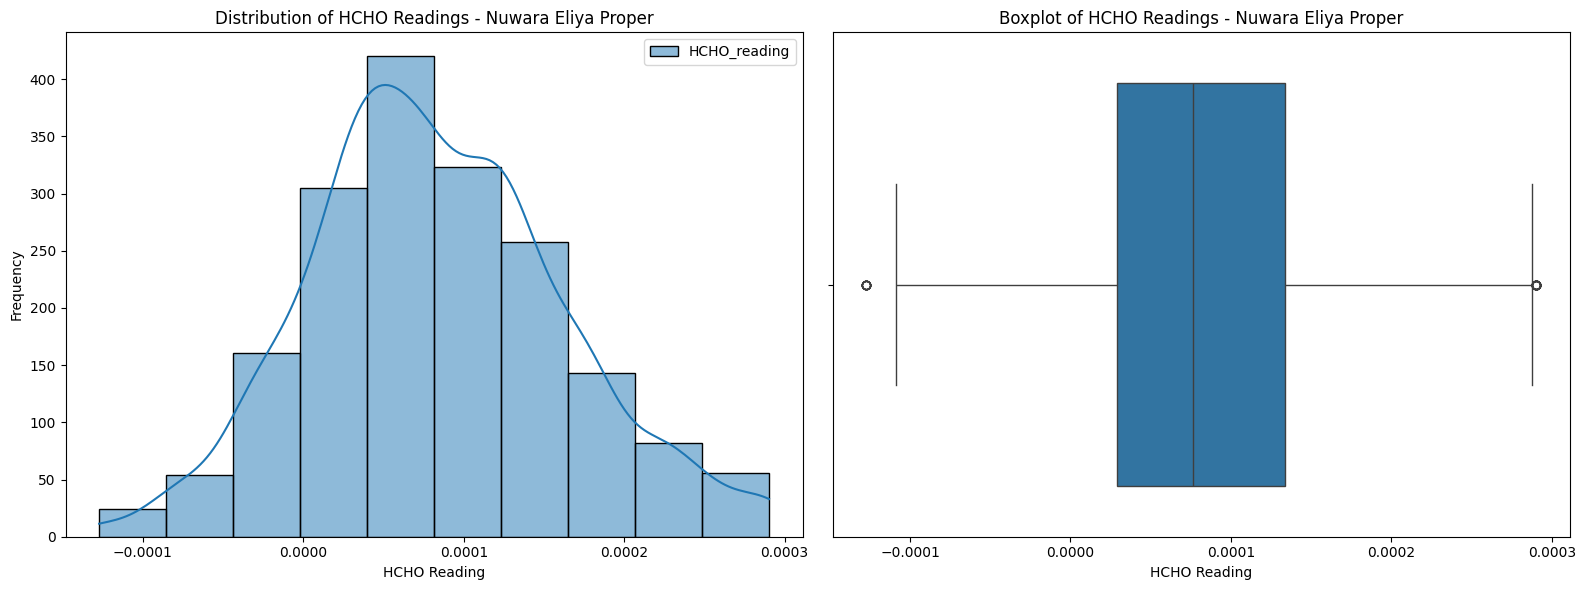

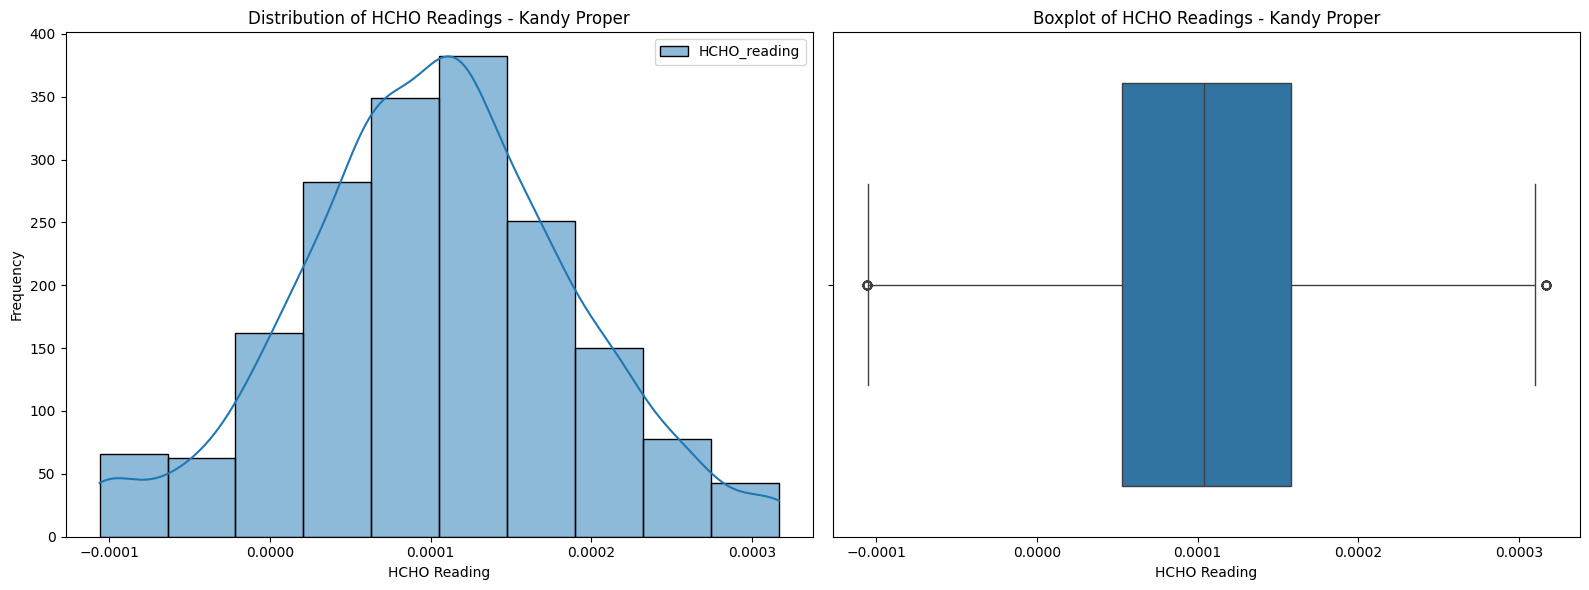

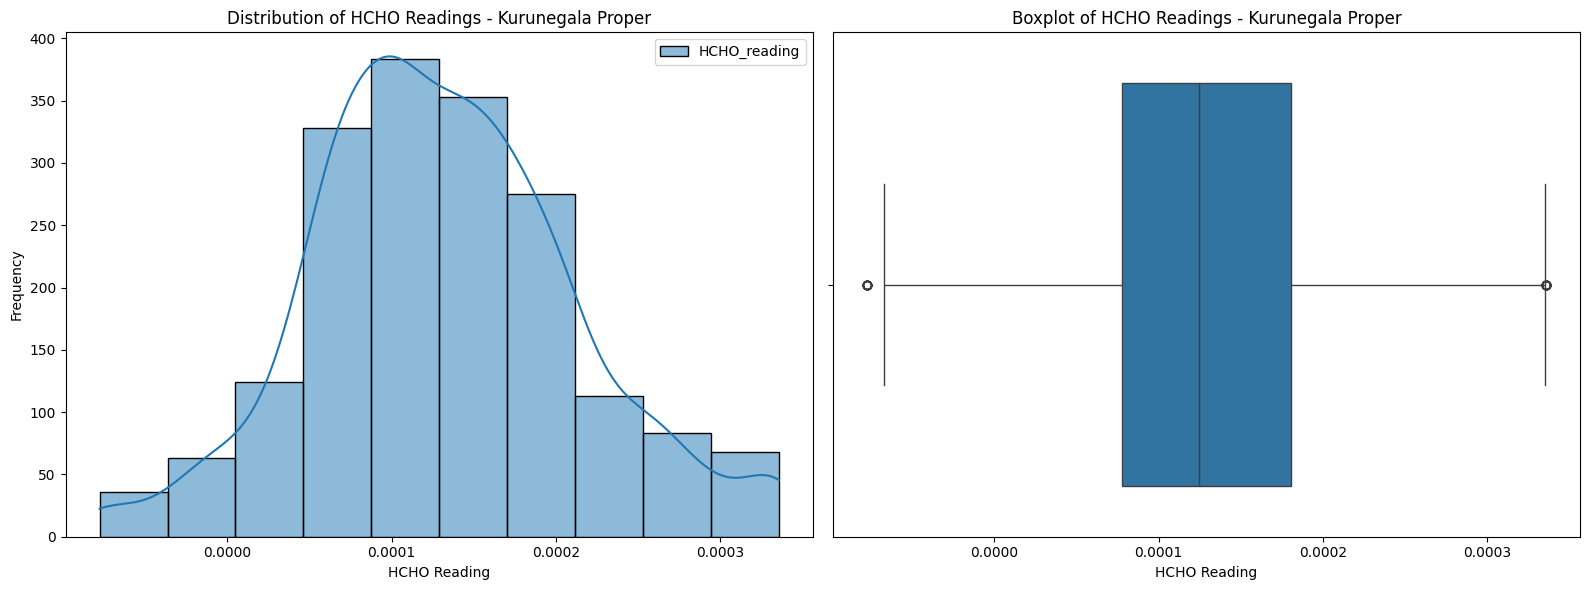

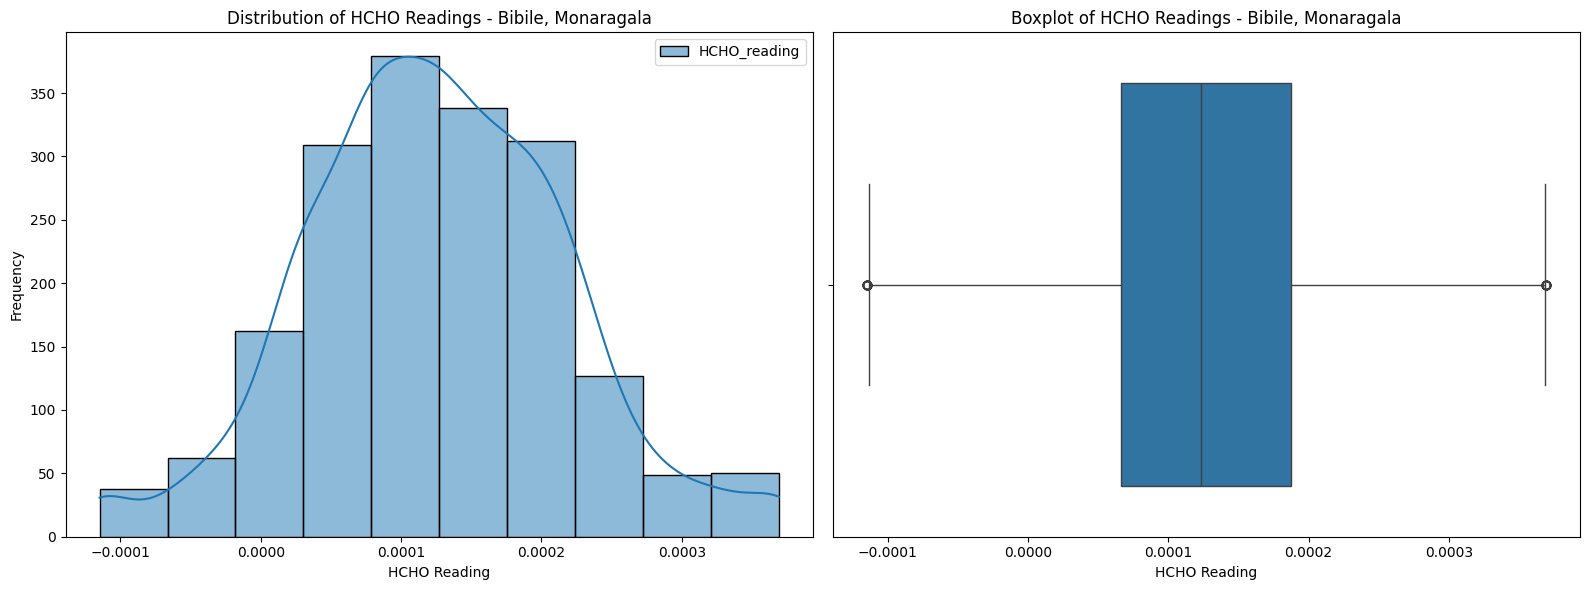

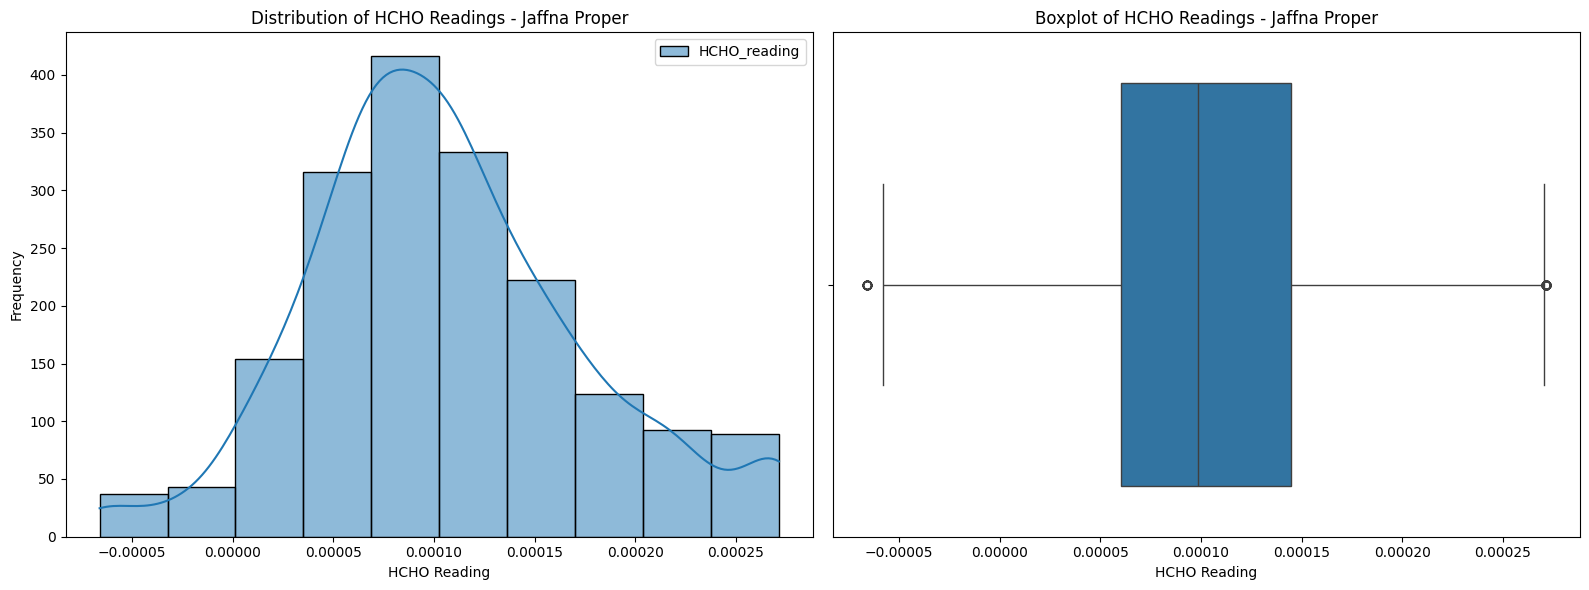

In [47]:
# Get unique locations
unique_locations = data.select("Location").distinct().rdd.flatMap(lambda x: x).collect()

# Plot separate histograms and boxplots for each location
for location in unique_locations:
    # Filter data for the current location
    location_data = data.filter(col("Location") == location)

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Histogram
    sns.histplot(location_data.select("HCHO_reading").toPandas(), bins=10, kde=True, ax=axs[0])
    axs[0].set_xlabel("HCHO Reading")
    axs[0].set_ylabel("Frequency")
    axs[0].set_title(f"Distribution of HCHO Readings - {location}")

    # Boxplot
    sns.boxplot(x="HCHO_reading", data=location_data.toPandas(), ax=axs[1])
    axs[1].set_xlabel("HCHO Reading")
    axs[1].set_title(f"Boxplot of HCHO Readings - {location}")

    plt.tight_layout()
    plt.show()


**Histograms**

**Boxplots**

# **Stats**

In [51]:
# Descriptive statistics for each city
descriptive_stats = data.groupBy("Location").agg({"HCHO_reading": "mean"}).orderBy("Location")

descriptive_stats.show()


+-------------------+--------------------+
|           Location|   avg(HCHO_reading)|
+-------------------+--------------------+
| Bibile, Monaragala|1.247203819824753...|
|     Colombo Proper|1.545311245892663...|
|   Deniyaya, Matara|8.653694184008766E-5|
|      Jaffna Proper|1.054148751369111E-4|
|       Kandy Proper|1.028764537239871...|
|  Kurunegala Proper|1.313703069550931E-4|
|Nuwara Eliya Proper|8.304849780941951E-5|
+-------------------+--------------------+



In [52]:
# Descriptive statistics for each city
descriptive_stats = data.groupBy("Location").agg({"HCHO_reading": "median"}).orderBy("Location")

descriptive_stats.show()


+-------------------+--------------------+
|           Location|median(HCHO_reading)|
+-------------------+--------------------+
| Bibile, Monaragala|          1.23402E-4|
|     Colombo Proper|         1.473175E-4|
|   Deniyaya, Matara|            8.075E-5|
|      Jaffna Proper|             9.84E-5|
|       Kandy Proper|           1.0402E-4|
|  Kurunegala Proper|          1.24701E-4|
|Nuwara Eliya Proper|             7.67E-5|
+-------------------+--------------------+



In [53]:
# Descriptive statistics for each city
descriptive_stats = data.groupBy("Location").agg({"HCHO_reading": "stddev"}).orderBy("Location")

descriptive_stats.show()


+-------------------+--------------------+
|           Location|stddev(HCHO_reading)|
+-------------------+--------------------+
| Bibile, Monaragala|9.224699914729772E-5|
|     Colombo Proper|9.386420419595507E-5|
|   Deniyaya, Matara|7.914341779661233E-5|
|      Jaffna Proper|6.886261230302301E-5|
|       Kandy Proper|8.515991294991867E-5|
|  Kurunegala Proper|8.064864048318052E-5|
|Nuwara Eliya Proper|7.958418118685171E-5|
+-------------------+--------------------+



# **Spatio-Temporal Analysis**

**1 - Analyse trends over time**

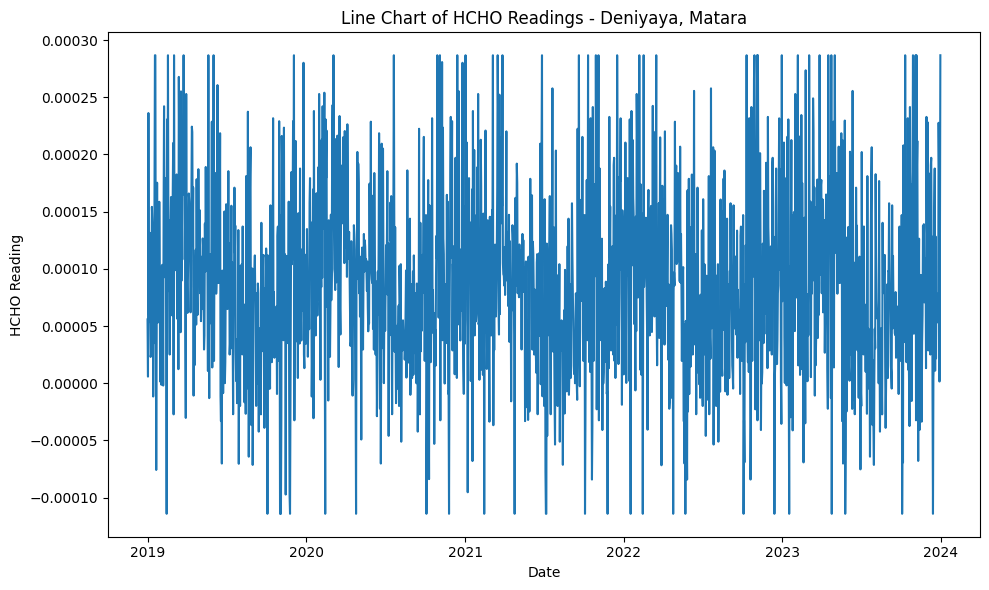

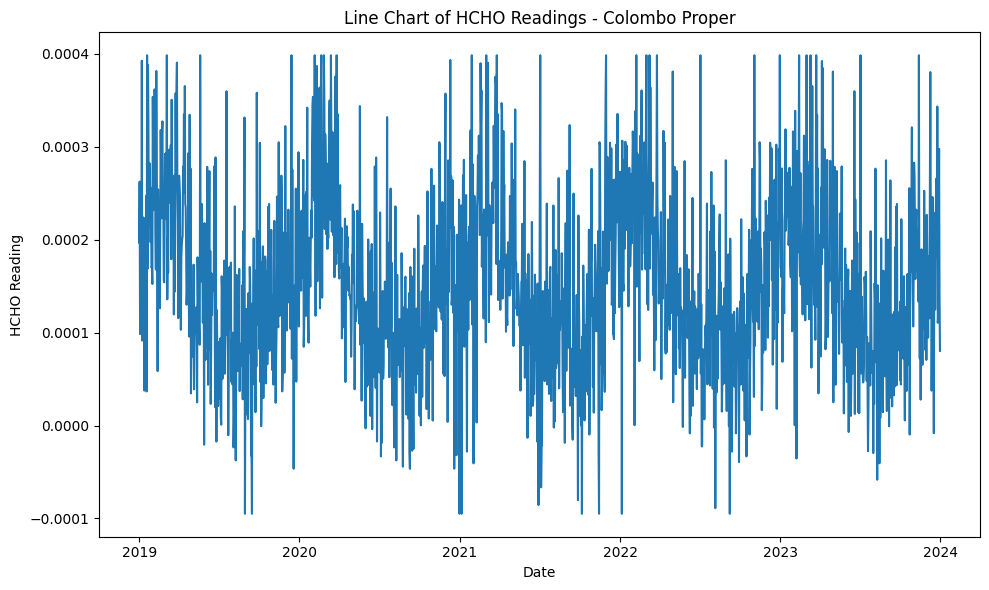

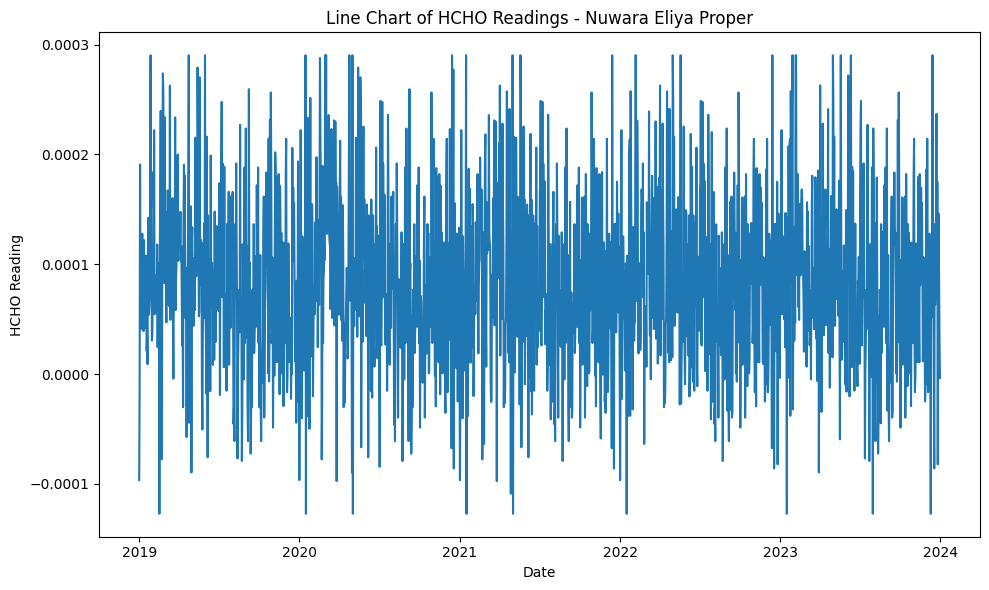

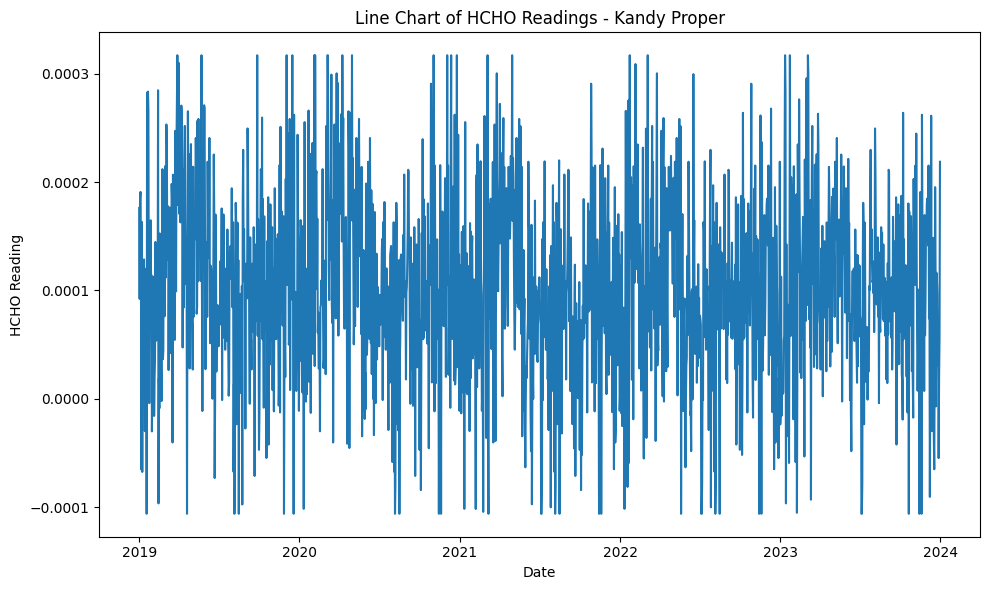

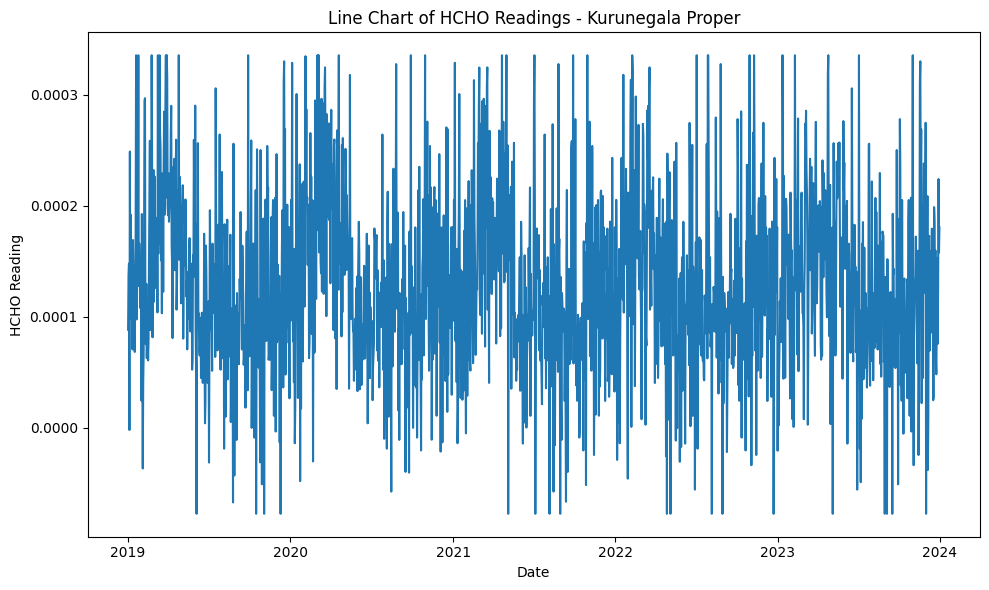

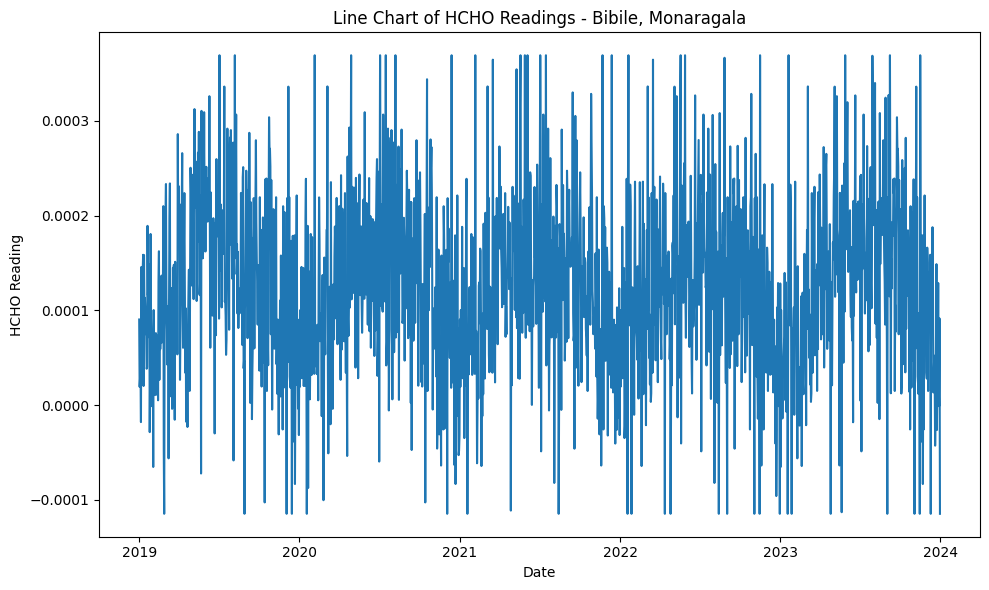

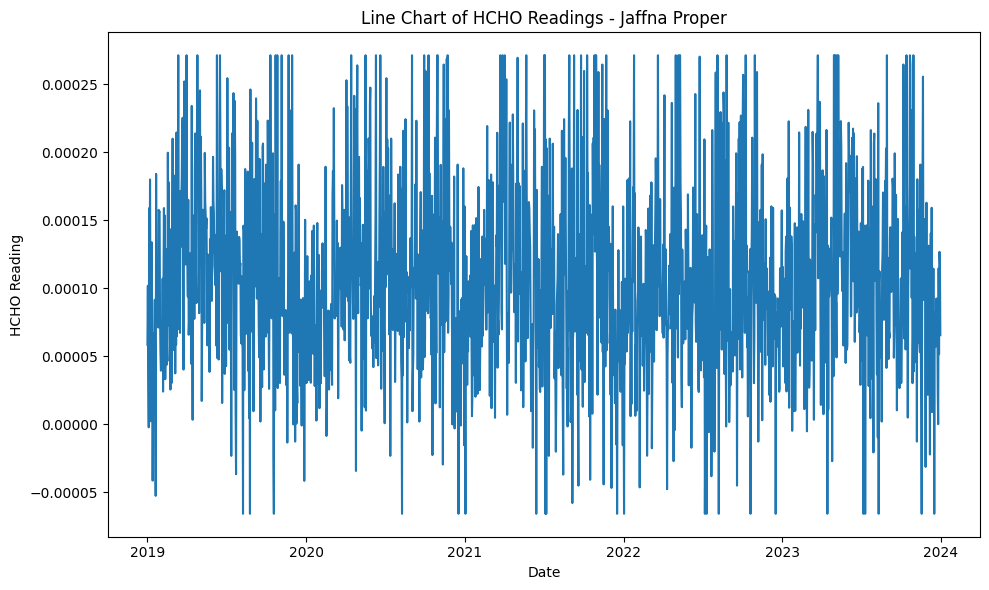

In [54]:
# line chats between the HCHO reading and the location

# Plot separate line charts for each location
for location in unique_locations:
    # Filter data for the current location
    location_data = data.filter(col("Location") == location)

    # Create line chart
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=location_data.toPandas(), x="Current_Date", y="HCHO_reading")
    plt.xlabel("Date")
    plt.ylabel("HCHO Reading")
    plt.title(f"Line Chart of HCHO Readings - {location}")
    plt.tight_layout()
    plt.show()


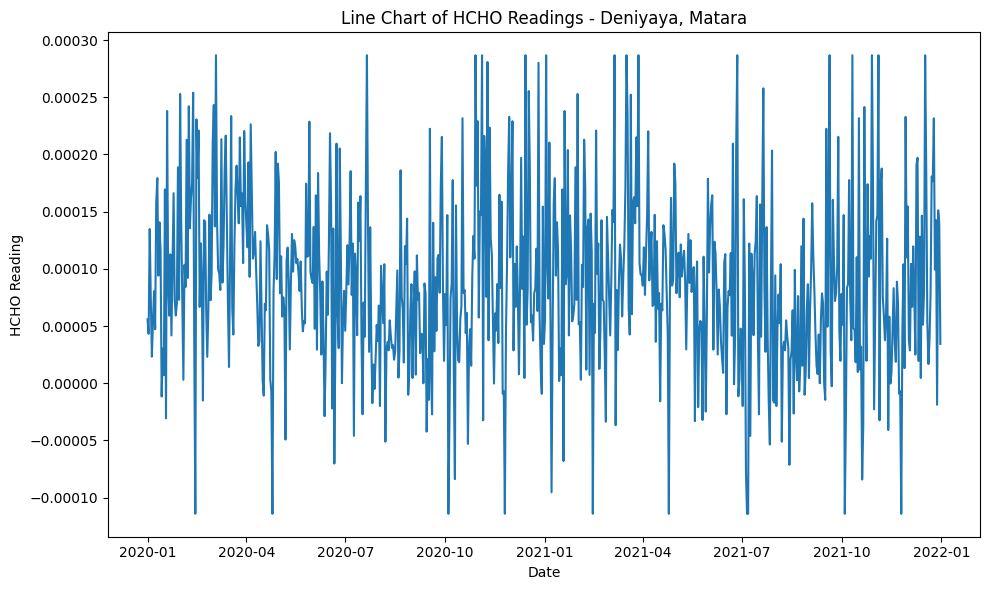

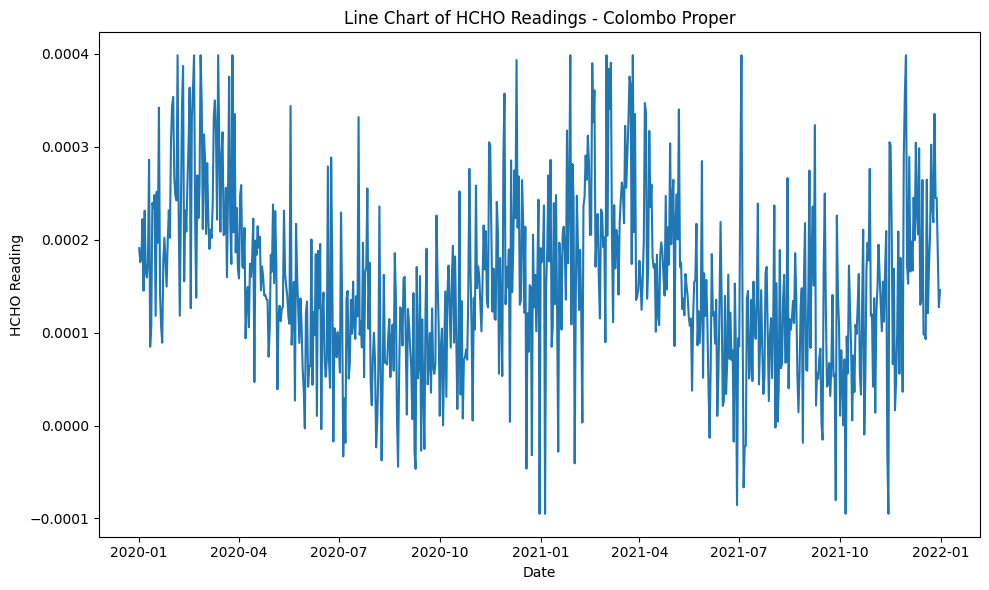

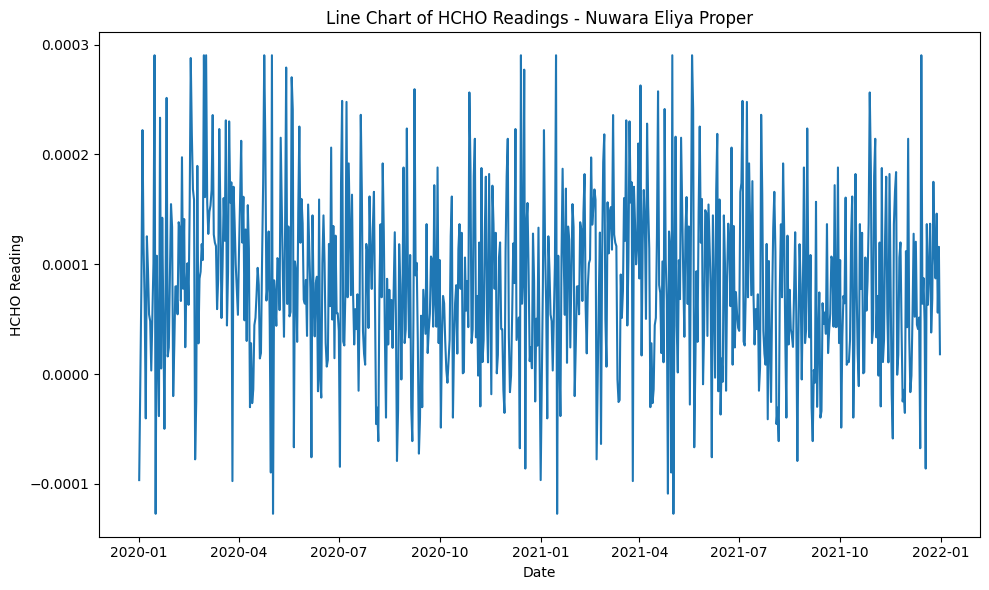

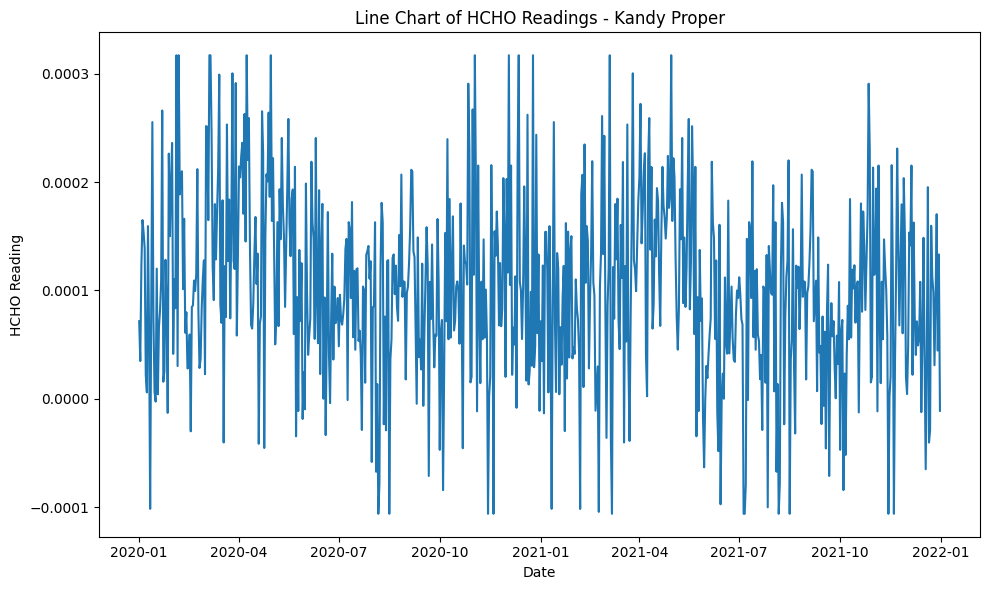

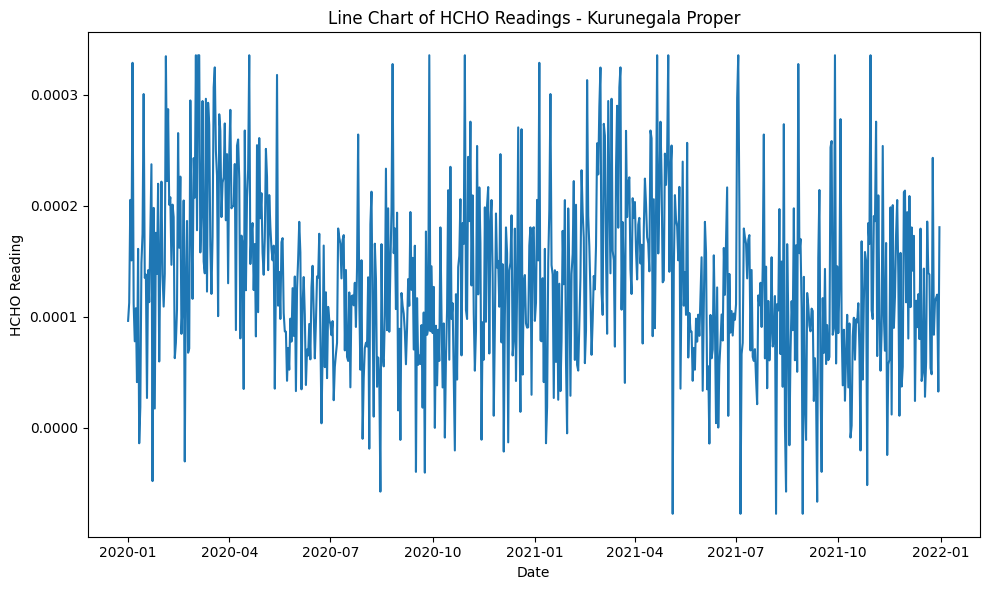

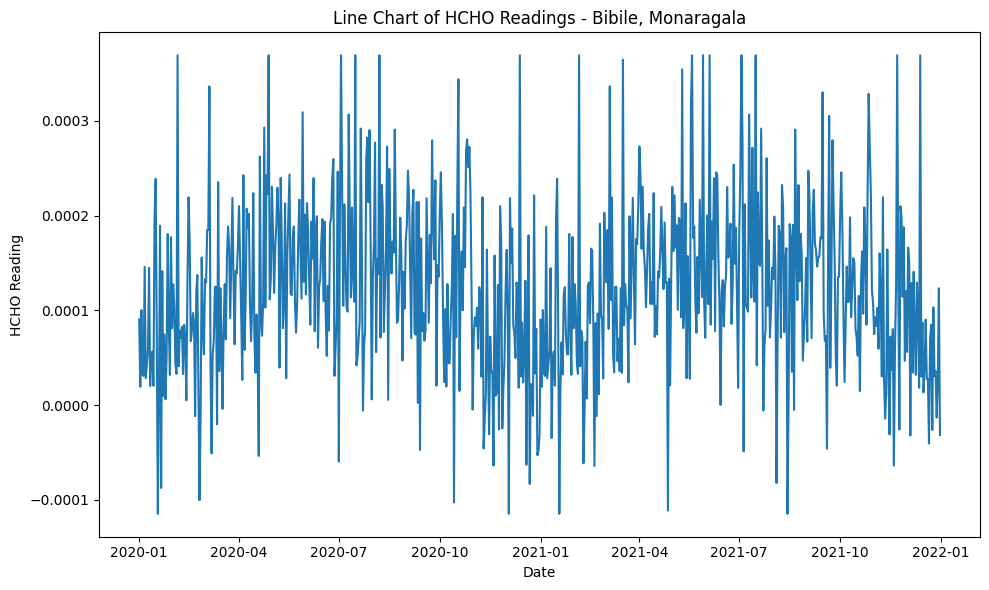

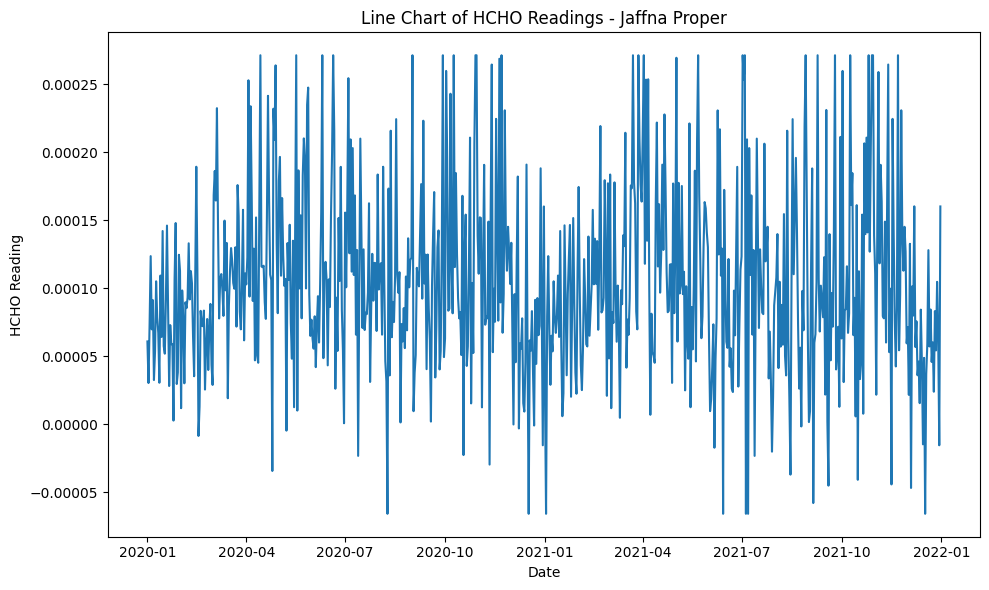

In [56]:
# line chats between the HCHO reading and the location - annually

starting_date = "2020-01-01"
ending_date = "2021-12-31"

# Plot separate line charts for each location
for location in unique_locations:
    # Filter data for the current location
    location_data = data.filter((col("Location") == location) &
                                (col("Current_Date") >= starting_date) &
                                (col("Current_Date") <= ending_date))

    # Create line chart
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=location_data.toPandas(), x="Current_Date", y="HCHO_reading")
    plt.xlabel("Date")
    plt.ylabel("HCHO Reading")
    plt.title(f"Line Chart of HCHO Readings - {location}")
    plt.tight_layout()
    plt.show()


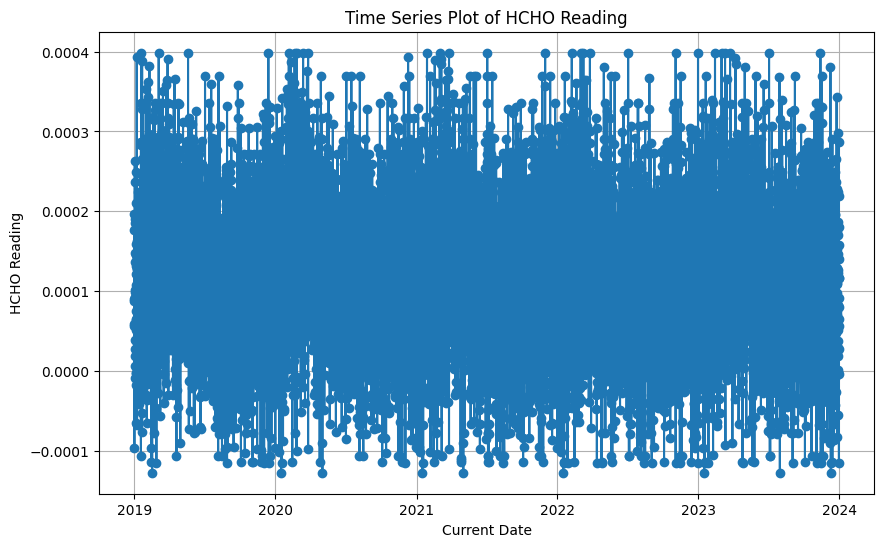

In [ ]:
# time series plot

from pyspark.sql.functions import col, to_timestamp


# Convert Current_Date column to timestamp type
data = data.withColumn("Current_Date", to_timestamp(col("Current_Date"), "M/d/yyyy"))

# Convert DataFrame to Pandas DataFrame
pandas_df = data.toPandas()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(pandas_df['Current_Date'], pandas_df['HCHO_reading'], marker='o')
plt.xlabel('Current Date')
plt.ylabel('HCHO Reading')
plt.title('Time Series Plot of HCHO Reading')
plt.grid(True)
plt.show()


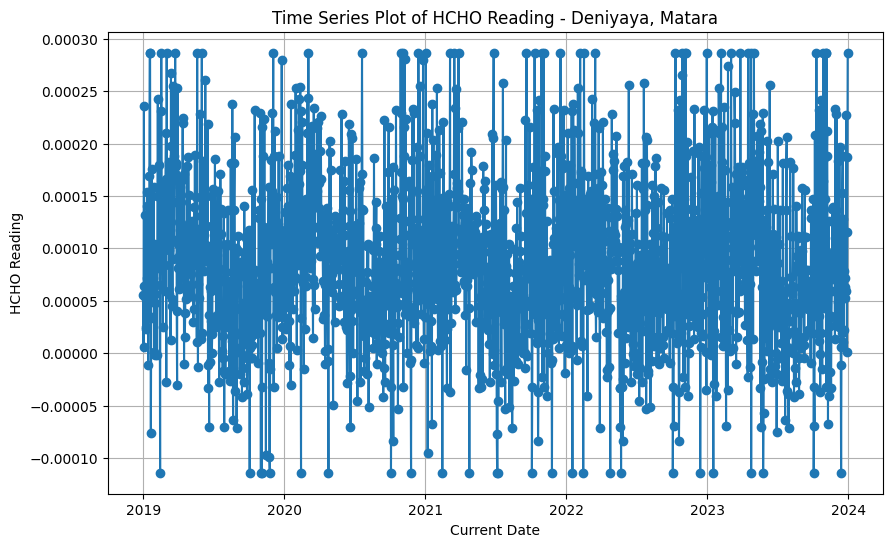

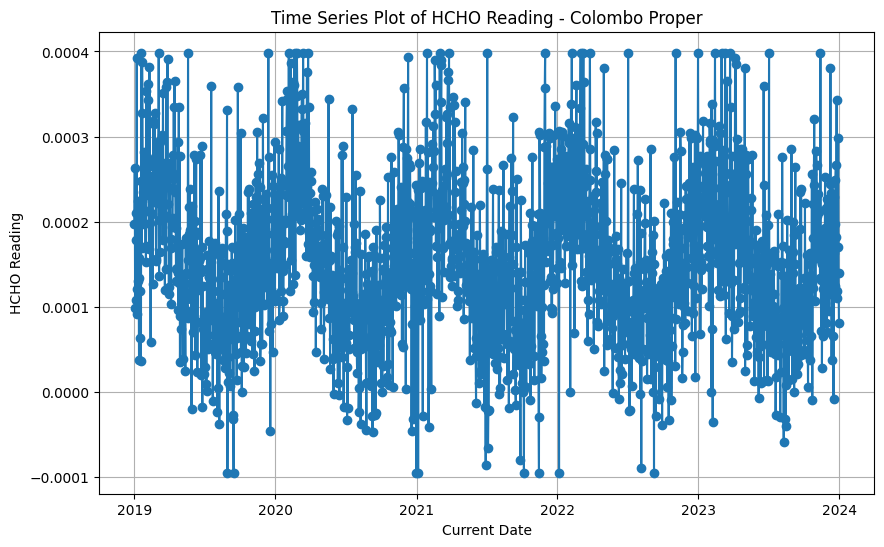

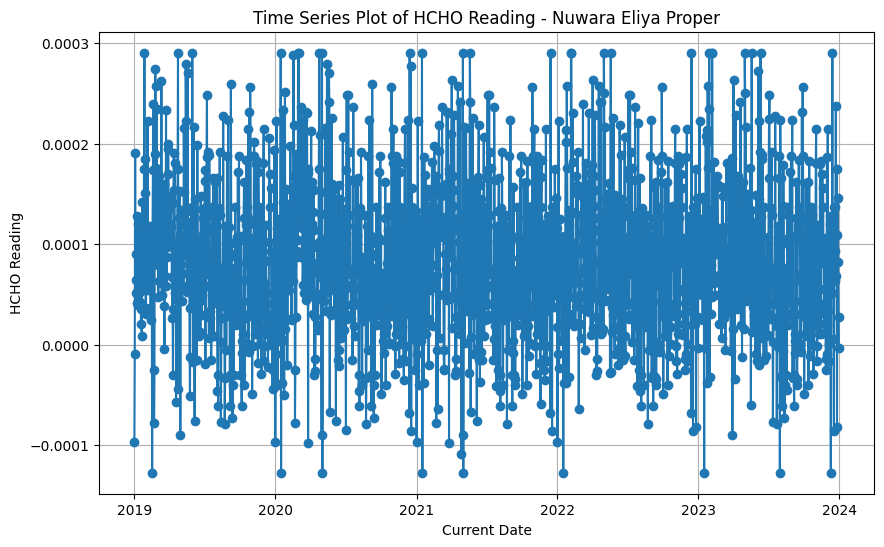

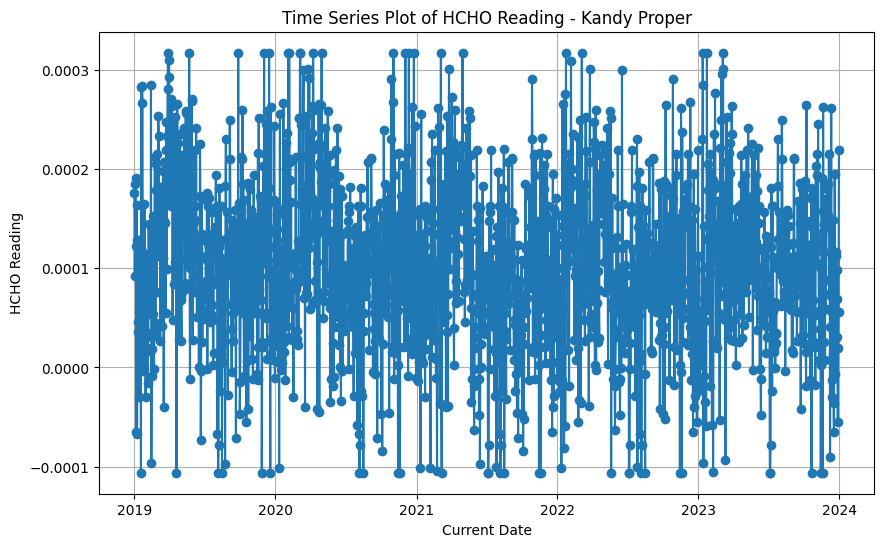

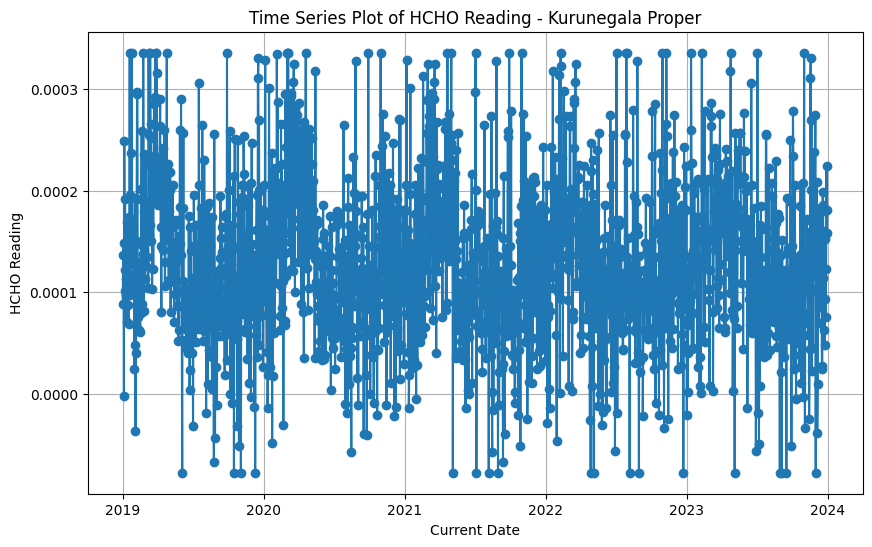

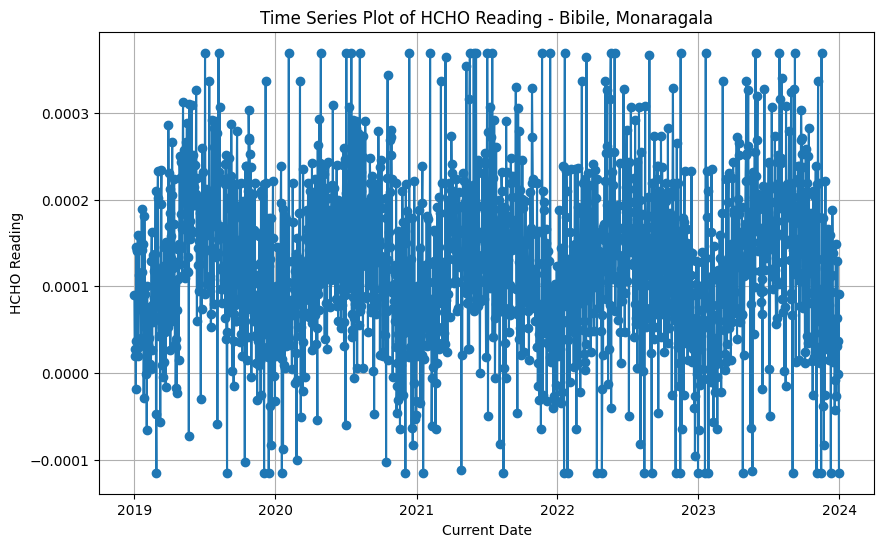

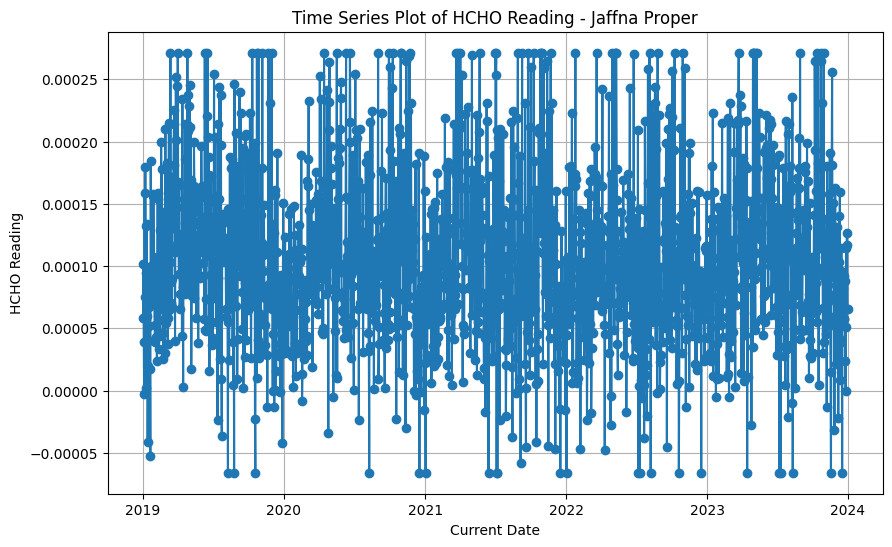

In [ ]:
# Plot separate time series plots for each location
for location in unique_locations:
    location_df = data.filter(col("Location") == location)
    location_pandas_df = location_df.toPandas()

    plt.figure(figsize=(10, 6))
    plt.plot(location_pandas_df['Current_Date'], location_pandas_df['HCHO_reading'], marker='o')
    plt.xlabel('Current Date')
    plt.ylabel('HCHO Reading')
    plt.title(f'Time Series Plot of HCHO Reading - {location}')
    plt.grid(True)
    plt.show()


**2 - Correlate HCHO levels with external factors**

In [ ]:
# precipitation and tempreture data for colombo kurunegala and nuwara eliya

precipitation_and_tempreture_data = spark.read.csv("precipitation_and_tempreture_col_kuru_nuwaraeliya.csv", header=True, inferSchema=True)
precipitation_and_tempreture_data.show(20)


+-----------+--------------+--------+---------+---------+----------+----+----+----+----+
|    STATION|          NAME|LATITUDE|LONGITUDE|ELEVATION|      DATE|PRCP|TAVG|TMAX|TMIN|
+-----------+--------------+--------+---------+---------+----------+----+----+----+----+
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-02| 0.0|  78|NULL|  72|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-03| 0.0|  81|  87|  71|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-04| 0.0|  83|  88|  69|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-05| 0.0|  84|  90|  65|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-06| 0.0|  82|  88|  71|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-07| 0.0|  80|  89|  68|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-08| 0.0|  82|  90|  71|
|CEM00043441|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-09| 0.0|  83|  89|  71|
|CEM00043441|KURUNEGA

In [ ]:
precipitation_and_tempreture_data = precipitation_and_tempreture_data.drop("STATION")
precipitation_and_tempreture_data.show(20)

+--------------+--------+---------+---------+----------+----+----+----+----+
|          NAME|LATITUDE|LONGITUDE|ELEVATION|      DATE|PRCP|TAVG|TMAX|TMIN|
+--------------+--------+---------+---------+----------+----+----+----+----+
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-02| 0.0|  78|NULL|  72|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-03| 0.0|  81|  87|  71|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-04| 0.0|  83|  88|  69|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-05| 0.0|  84|  90|  65|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-06| 0.0|  82|  88|  71|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-07| 0.0|  80|  89|  68|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-08| 0.0|  82|  90|  71|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-09| 0.0|  83|  89|  71|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-10| 0.0|  81|  88|  72|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-11| 0.0|  85|  90|  73|

In [ ]:
# Rename the NAME column to LOCATION
# precipitation_and_tempreture_data = precipitation_and_tempreture_data.withColumnRenamed("NAME", "LOCATION")

In [ ]:
precipitation_and_tempreture_data.describe()

DataFrame[summary: string, NAME: string, LATITUDE: string, LONGITUDE: string, ELEVATION: string, PRCP: string, TAVG: string, TMAX: string, TMIN: string]

In [ ]:
precipitation_and_tempreture_data.printSchema()

root
 |-- NAME: string (nullable = true)
 |-- LATITUDE: double (nullable = true)
 |-- LONGITUDE: double (nullable = true)
 |-- ELEVATION: double (nullable = true)
 |-- DATE: date (nullable = true)
 |-- PRCP: double (nullable = true)
 |-- TAVG: integer (nullable = true)
 |-- TMAX: integer (nullable = true)
 |-- TMIN: integer (nullable = true)



In [ ]:
# Check if there are null values in the columns,
prcp = precipitation_and_tempreture_data.filter(col("PRCP").isNull()).count()
tavg = precipitation_and_tempreture_data.filter(col("TAVG").isNull()).count()
tmax = precipitation_and_tempreture_data.filter(col("TMAX").isNull()).count()
tmin = precipitation_and_tempreture_data.filter(col("TMIN").isNull()).count()

# Print the results
print("Null value count")
print("PRCP:", prcp)
print("TAVG:", tavg)
print("TMAX:", tmax)
print("TMIN:", tmin)

Null value count
PRCP: 17
TAVG: 0
TMAX: 583
TMIN: 926


In [ ]:
import pyspark.sql.functions as F
from pyspark.sql.functions import lit, max

# In the groupBy section
window = Window.partitionBy("NAME")
mode_data = precipitation_and_tempreture_data.groupBy("NAME").agg(
    *[max(col).alias(col + "_mode") for col in ["PRCP", "TAVG", "TMAX", "TMIN"]]
)

# Join with mode data using aliased column names
data_with_mode = precipitation_and_tempreture_data.join(mode_data, on="NAME")

# Replace nulls using aliased column names
data_with_mode = data_with_mode.withColumn("PRCP", F.when(col("PRCP").isNull(), col("PRCP_mode")).otherwise(col("PRCP")))
data_with_mode = data_with_mode.withColumn("TAVG", F.when(col("TAVG").isNull(), col("TAVG_mode")).otherwise(col("TAVG")))
data_with_mode = data_with_mode.withColumn("TMAX", F.when(col("TMAX").isNull(), col("TMAX_mode")).otherwise(col("TMAX")))
data_with_mode = data_with_mode.withColumn("TMIN", F.when(col("TMIN").isNull(), col("TMIN_mode")).otherwise(col("TMIN")))


# Drop unnecessary columns
data_with_mode = data_with_mode.drop("PRCP_mode", "TAVG_mode", "TMAX_mode", "TMIN_mode")

# Show the DataFrame with replaced null values
data_with_mode.show()


+--------------+--------+---------+---------+----------+----+----+----+----+
|          NAME|LATITUDE|LONGITUDE|ELEVATION|      DATE|PRCP|TAVG|TMAX|TMIN|
+--------------+--------+---------+---------+----------+----+----+----+----+
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-02| 0.0|  78| 101|  72|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-03| 0.0|  81|  87|  71|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-04| 0.0|  83|  88|  69|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-05| 0.0|  84|  90|  65|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-06| 0.0|  82|  88|  71|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-07| 0.0|  80|  89|  68|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-08| 0.0|  82|  90|  71|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-09| 0.0|  83|  89|  71|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-10| 0.0|  81|  88|  72|
|KURUNEGALA, CE|   7.467|   80.367|    116.0|2019-01-11| 0.0|  85|  90|  73|

In [ ]:
# Check if there are null values in the columns,
prcp = data_with_mode.filter(col("PRCP").isNull()).count()
tavg = data_with_mode.filter(col("TAVG").isNull()).count()
tmax = data_with_mode.filter(col("TMAX").isNull()).count()
tmin = data_with_mode.filter(col("TMIN").isNull()).count()

# Print the results
print("Null value count")
print("PRCP:", prcp)
print("TAVG:", tavg)
print("TMAX:", tmax)
print("TMIN:", tmin)

Null value count
PRCP: 0
TAVG: 0
TMAX: 0
TMIN: 0


In [ ]:
# Replace values in the LOCATION column
data_with_mode = data_with_mode.withColumn("NAME",
    when(data_with_mode["NAME"] == "KURUNEGALA, CE", "Kurunegala Proper")
    .when(data_with_mode["NAME"] == "COLOMBO, CE", "Colombo Proper")
    .when(data_with_mode["NAME"] == "NUWARA ELIYA, CE", "Nuwara Eliya Proper")
    .otherwise(data_with_mode["NAME"])
)

# Show the DataFrame with replaced values
data_with_mode.show()


+-----------------+--------+---------+---------+----------+----+----+----+----+
|             NAME|LATITUDE|LONGITUDE|ELEVATION|      DATE|PRCP|TAVG|TMAX|TMIN|
+-----------------+--------+---------+---------+----------+----+----+----+----+
|Kurunegala Proper|   7.467|   80.367|    116.0|2019-01-02| 0.0|  78| 101|  72|
|Kurunegala Proper|   7.467|   80.367|    116.0|2019-01-03| 0.0|  81|  87|  71|
|Kurunegala Proper|   7.467|   80.367|    116.0|2019-01-04| 0.0|  83|  88|  69|
|Kurunegala Proper|   7.467|   80.367|    116.0|2019-01-05| 0.0|  84|  90|  65|
|Kurunegala Proper|   7.467|   80.367|    116.0|2019-01-06| 0.0|  82|  88|  71|
|Kurunegala Proper|   7.467|   80.367|    116.0|2019-01-07| 0.0|  80|  89|  68|
|Kurunegala Proper|   7.467|   80.367|    116.0|2019-01-08| 0.0|  82|  90|  71|
|Kurunegala Proper|   7.467|   80.367|    116.0|2019-01-09| 0.0|  83|  89|  71|
|Kurunegala Proper|   7.467|   80.367|    116.0|2019-01-10| 0.0|  81|  88|  72|
|Kurunegala Proper|   7.467|   80.367|  

In [ ]:
# considering colombo, kurunegala and nuwara eliya


# Filter out the desired locations from the data DataFrame
filtered_data_colombo_kurunegala_nuwaraeliya = data.filter((col("Location").isin(["Kurunegala Proper", "Colombo Proper", "Nuwara Eliya Proper"])))

# Perform the join between filtered_data and data_with_mode
combined_data_colombo_kurunegala_nuwaraeliya = filtered_data_colombo_kurunegala_nuwaraeliya.join(data_with_mode,
                                   (filtered_data_colombo_kurunegala_nuwaraeliya["Location"] == data_with_mode["NAME"]) &
                                   (filtered_data_colombo_kurunegala_nuwaraeliya["Current_Date"] == data_with_mode["DATE"]),
                                   how="inner")

# Show the combined DataFrame
combined_data_colombo_kurunegala_nuwaraeliya.show()


+-----------------+-------------------+----------+------------+-----------------+--------+---------+---------+----------+----+----+----+----+
|         Location|       Current_Date| Next_Date|HCHO_reading|             NAME|LATITUDE|LONGITUDE|ELEVATION|      DATE|PRCP|TAVG|TMAX|TMIN|
+-----------------+-------------------+----------+------------+-----------------+--------+---------+---------+----------+----+----+----+----+
|Kurunegala Proper|2019-01-02 00:00:00|2019-01-03|  1.37079E-4|Kurunegala Proper|   7.467|   80.367|    116.0|2019-01-02| 0.0|  78| 101|  72|
|Kurunegala Proper|2019-01-03 00:00:00|2019-01-04|  1.48009E-4|Kurunegala Proper|   7.467|   80.367|    116.0|2019-01-03| 0.0|  81|  87|  71|
|Kurunegala Proper|2019-01-04 00:00:00|2019-01-05|    -2.05E-6|Kurunegala Proper|   7.467|   80.367|    116.0|2019-01-04| 0.0|  83|  88|  69|
|Kurunegala Proper|2019-01-05 00:00:00|2019-01-06|  2.48913E-4|Kurunegala Proper|   7.467|   80.367|    116.0|2019-01-05| 0.0|  84|  90|  65|
|Kurun

In [ ]:
combined_data_colombo_kurunegala_nuwaraeliya = combined_data_colombo_kurunegala_nuwaraeliya.drop("NAME")
combined_data_colombo_kurunegala_nuwaraeliya.show()

+-----------------+-------------------+----------+------------+--------+---------+---------+----------+----+----+----+----+
|         Location|       Current_Date| Next_Date|HCHO_reading|LATITUDE|LONGITUDE|ELEVATION|      DATE|PRCP|TAVG|TMAX|TMIN|
+-----------------+-------------------+----------+------------+--------+---------+---------+----------+----+----+----+----+
|Kurunegala Proper|2019-01-02 00:00:00|2019-01-03|  1.37079E-4|   7.467|   80.367|    116.0|2019-01-02| 0.0|  78| 101|  72|
|Kurunegala Proper|2019-01-03 00:00:00|2019-01-04|  1.48009E-4|   7.467|   80.367|    116.0|2019-01-03| 0.0|  81|  87|  71|
|Kurunegala Proper|2019-01-04 00:00:00|2019-01-05|    -2.05E-6|   7.467|   80.367|    116.0|2019-01-04| 0.0|  83|  88|  69|
|Kurunegala Proper|2019-01-05 00:00:00|2019-01-06|  2.48913E-4|   7.467|   80.367|    116.0|2019-01-05| 0.0|  84|  90|  65|
|Kurunegala Proper|2019-01-06 00:00:00|2019-01-07|  1.01558E-4|   7.467|   80.367|    116.0|2019-01-06| 0.0|  82|  88|  71|
|Kuruneg

In [ ]:

selected_columns = ["HCHO_reading", "PRCP", "TAVG", "TMAX", "TMIN"]
locations = ["Kurunegala Proper", "Colombo Proper", "Nuwara Eliya Proper"]  # Use lowercase 'locations'

for location in locations:
  # Filter data for the current location
  filtered_data = combined_data_colombo_kurunegala_nuwaraeliya.filter(F.col("Location") == location)

  # Check if any data exists for the location
  if filtered_data.count() > 0:
    # Calculate correlation matrix (assuming data exists)
    correlation_matrix = filtered_data.select(selected_columns).toPandas().corr()
    print(f"Location: {location}")
    print(correlation_matrix)
    print()
  else:
    print(f"No data found for location: {location}")


# correlation_matrix = combined_data_colombo_kurunegala_nuwaraeliya.select(selected_columns).toPandas().corr()

# Display the correlation matrix
# print(correlation_matrix)


Location: Kurunegala Proper
              HCHO_reading      PRCP      TAVG      TMAX      TMIN
HCHO_reading      1.000000 -0.034693  0.132857  0.222347 -0.067283
PRCP             -0.034693  1.000000 -0.240504 -0.170040 -0.060630
TAVG              0.132857 -0.240504  1.000000  0.568008  0.066399
TMAX              0.222347 -0.170040  0.568008  1.000000 -0.050490
TMIN             -0.067283 -0.060630  0.066399 -0.050490  1.000000

Location: Colombo Proper
              HCHO_reading      PRCP      TAVG      TMAX      TMIN
HCHO_reading      1.000000 -0.030883 -0.058489  0.185792 -0.156388
PRCP             -0.030883  1.000000 -0.308622 -0.167300 -0.126794
TAVG             -0.058489 -0.308622  1.000000  0.328515  0.300571
TMAX              0.185792 -0.167300  0.328515  1.000000  0.016795
TMIN             -0.156388 -0.126794  0.300571  0.016795  1.000000

Location: Nuwara Eliya Proper
              HCHO_reading      PRCP      TAVG      TMAX      TMIN
HCHO_reading      1.000000 -0.024377  0.0254

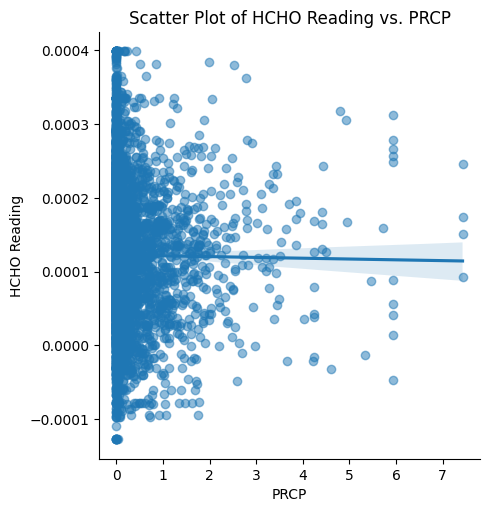

In [ ]:
# Plot scatter plot with trend line for HCHO levels vs. PRCP (precipitation)

# Select relevant columns for the scatter plot
filtered_data = combined_data_colombo_kurunegala_nuwaraeliya.select(col("PRCP"), col("HCHO_reading"))

# Convert the filtered Spark DataFrame to a Pandas DataFrame
pandas_data = filtered_data.toPandas()

# Use the Pandas DataFrame for seaborn plot
sns.lmplot(x='PRCP', y='HCHO_reading', data=pandas_data, scatter_kws={'alpha':0.5})
plt.xlabel('PRCP')
plt.ylabel('HCHO Reading')
plt.title('Scatter Plot of HCHO Reading vs. PRCP')
plt.show()

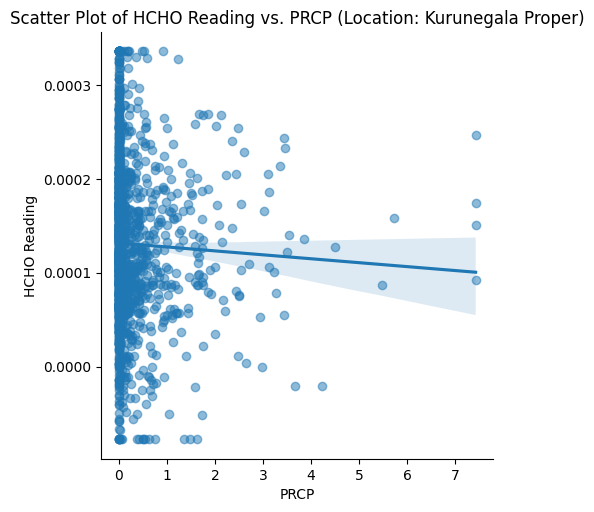

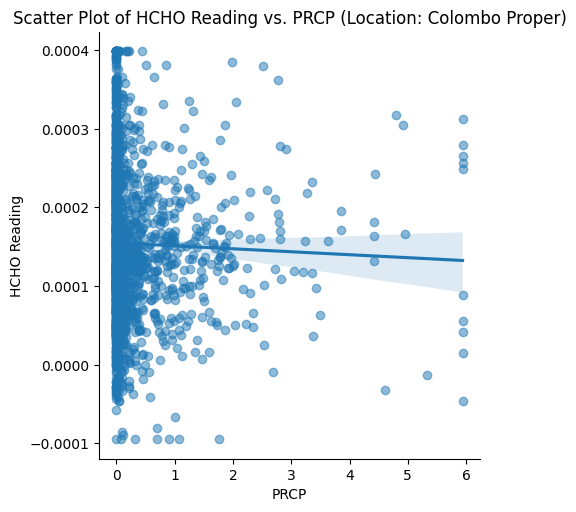

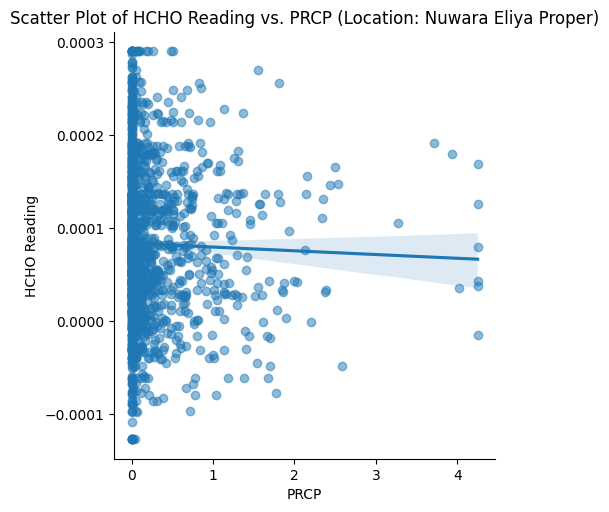

In [ ]:
# Plot scatter plot with trend line for HCHO levels vs. PRCP (precipitation)

# Loop through each location
for location in locations:
  # Filter data for the current location
  filtered_data = combined_data_colombo_kurunegala_nuwaraeliya.filter(F.col("Location") == location)

  # Check if any data exists for the location
  if filtered_data.count() > 0:
    # Convert the filtered Spark DataFrame to a Pandas DataFrame
    pandas_data = filtered_data.select(col("PRCP"), col("HCHO_reading")).toPandas()

    # Create the scatter plot with trend line for the current location
    sns.lmplot(x='PRCP', y='HCHO_reading', data=pandas_data, scatter_kws={'alpha':0.5})
    plt.xlabel('PRCP')
    plt.ylabel('HCHO Reading')
    plt.title(f'Scatter Plot of HCHO Reading vs. PRCP (Location: {location})')
    plt.show()
  else:
    print(f"No data found for location: {location}")

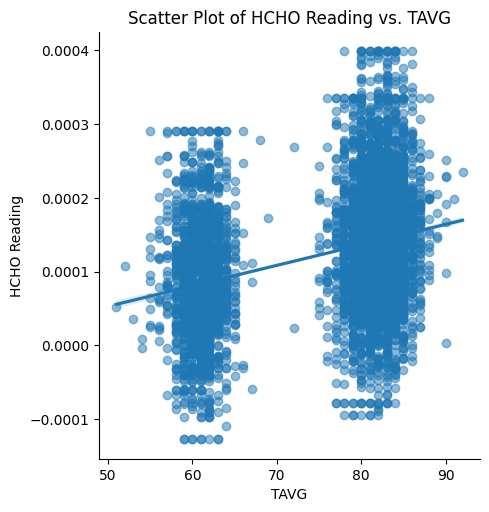

In [ ]:
# Plot scatter plot with trend line for HCHO levels vs. TAVG (average temperature)

# Select relevant columns for the scatter plot
filtered_data = combined_data_colombo_kurunegala_nuwaraeliya.select(col("TAVG"), col("HCHO_reading"))

# Convert the filtered Spark DataFrame to a Pandas DataFrame
pandas_data = filtered_data.toPandas()

# Use the Pandas DataFrame for seaborn plot
sns.lmplot(x='TAVG', y='HCHO_reading', data=pandas_data, scatter_kws={'alpha':0.5})
plt.xlabel('TAVG')
plt.ylabel('HCHO Reading')
plt.title('Scatter Plot of HCHO Reading vs. TAVG')
plt.show()

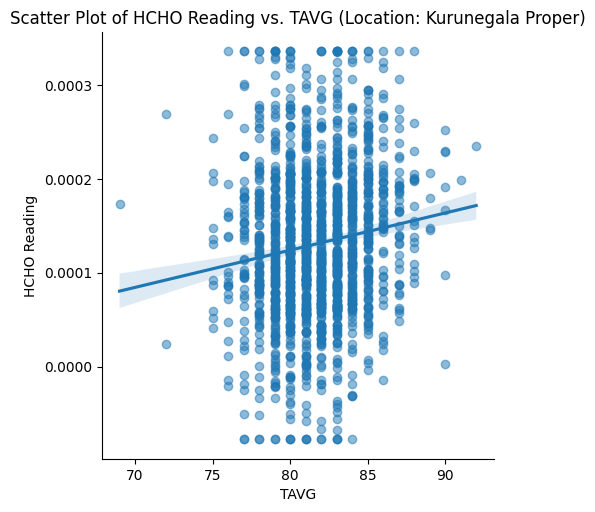

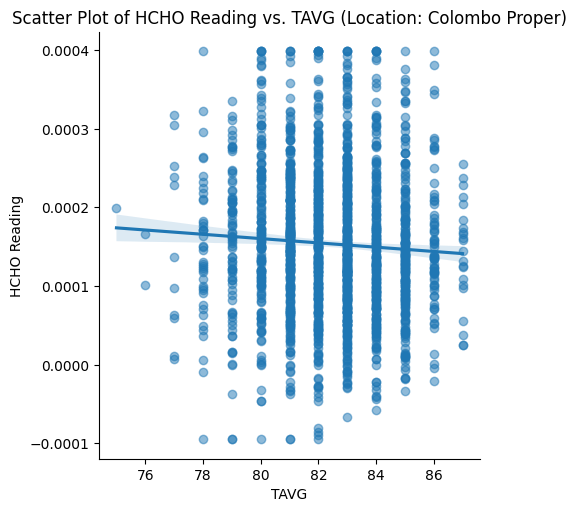

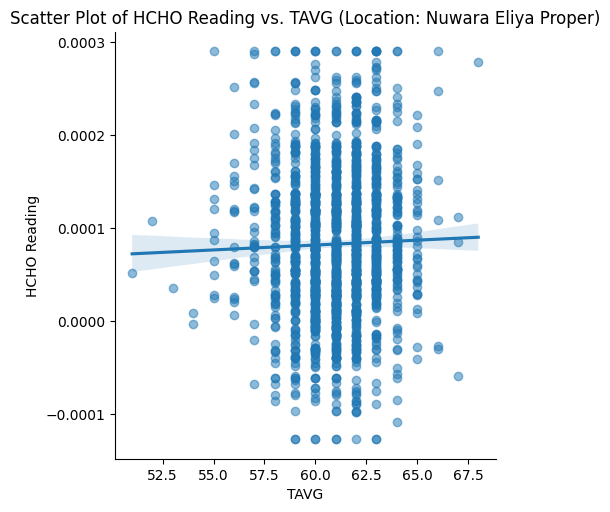

In [ ]:
# Plot scatter plot with trend line for HCHO levels vs. TAVG (average temperature)

# Loop through each location
for location in locations:
  # Filter data for the current location
  filtered_data = combined_data_colombo_kurunegala_nuwaraeliya.filter(F.col("Location") == location)

  # Check if any data exists for the location
  if filtered_data.count() > 0:
    # Convert the filtered Spark DataFrame to a Pandas DataFrame
    pandas_data = filtered_data.select(col("TAVG"), col("HCHO_reading")).toPandas()

    # Create the scatter plot with trend line for the current location
    sns.lmplot(x='TAVG', y='HCHO_reading', data=pandas_data, scatter_kws={'alpha':0.5})
    plt.xlabel('TAVG')
    plt.ylabel('HCHO Reading')
    plt.title(f'Scatter Plot of HCHO Reading vs. TAVG (Location: {location})')
    plt.show()
  else:
    print(f"No data found for location: {location}")

**3 - Compare spatial patterns**

In [ ]:
# Plot scatter plot with trend line for HCHO levels vs. population density

In [ ]:
# Plot scatter plot with trend line for HCHO levels vs. proximity to the sea

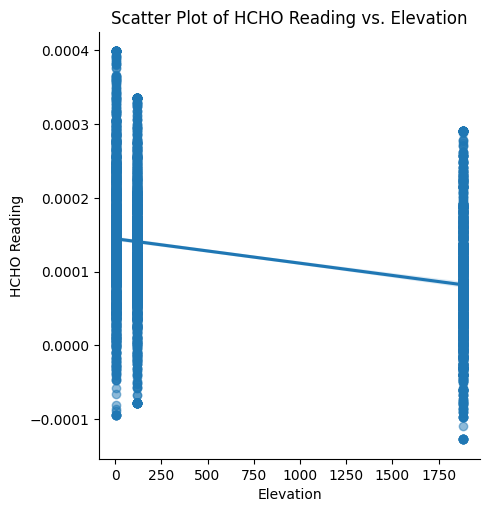

In [ ]:
# Plot scatter plot with trend line for HCHO levels vs. Elevation (height above sea level)

# Select relevant columns for the scatter plot
filtered_data = combined_data_colombo_kurunegala_nuwaraeliya.select(col("ELEVATION"), col("HCHO_reading"))

# Convert the filtered Spark DataFrame to a Pandas DataFrame
pandas_data = filtered_data.toPandas()

# Use the Pandas DataFrame for seaborn plot
sns.lmplot(x='ELEVATION', y='HCHO_reading', data=pandas_data, scatter_kws={'alpha':0.5})
plt.xlabel('Elevation')
plt.ylabel('HCHO Reading')
plt.title('Scatter Plot of HCHO Reading vs. Elevation')
plt.show()

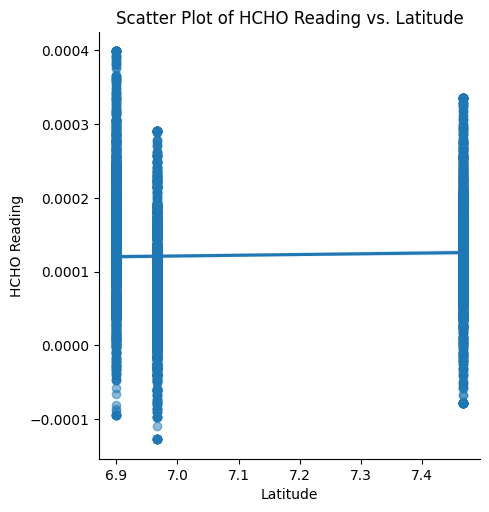

In [ ]:
# Plot scatter plot with trend line for HCHO levels vs. Latitude

# Select relevant columns for the scatter plot
filtered_data = combined_data_colombo_kurunegala_nuwaraeliya.select(col("LATITUDE"), col("HCHO_reading"))

# Convert the filtered Spark DataFrame to a Pandas DataFrame
pandas_data = filtered_data.toPandas()

# Use the Pandas DataFrame for seaborn plot
sns.lmplot(x='LATITUDE', y='HCHO_reading', data=pandas_data, scatter_kws={'alpha':0.5})
plt.xlabel('Latitude')
plt.ylabel('HCHO Reading')
plt.title('Scatter Plot of HCHO Reading vs. Latitude')
plt.show()

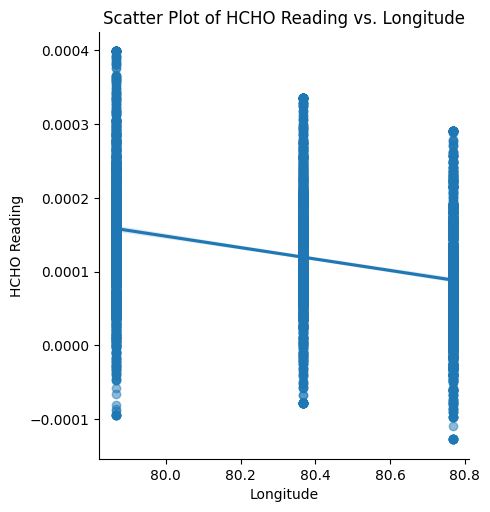

In [ ]:
# Plot scatter plot with trend line for HCHO levels vs. Longitude

# Select relevant columns for the scatter plot
filtered_data = combined_data_colombo_kurunegala_nuwaraeliya.select(col("LONGITUDE"), col("HCHO_reading"))

# Convert the filtered Spark DataFrame to a Pandas DataFrame
pandas_data = filtered_data.toPandas()

# Use the Pandas DataFrame for seaborn plot
sns.lmplot(x='LONGITUDE', y='HCHO_reading', data=pandas_data, scatter_kws={'alpha':0.5})
plt.xlabel('Longitude')
plt.ylabel('HCHO Reading')
plt.title('Scatter Plot of HCHO Reading vs. Longitude')
plt.show()

# **Task 3 - Machine Learning**

In [ ]:
combined_data_colombo_kurunegala_nuwaraeliya.show()

+-----------------+-------------------+----------+------------+--------+---------+---------+----------+----+----+----+----+
|         Location|       Current_Date| Next_Date|HCHO_reading|LATITUDE|LONGITUDE|ELEVATION|      DATE|PRCP|TAVG|TMAX|TMIN|
+-----------------+-------------------+----------+------------+--------+---------+---------+----------+----+----+----+----+
|Kurunegala Proper|2019-01-02 00:00:00|2019-01-03|  1.37079E-4|   7.467|   80.367|    116.0|2019-01-02| 0.0|  78| 101|  72|
|Kurunegala Proper|2019-01-03 00:00:00|2019-01-04|  1.48009E-4|   7.467|   80.367|    116.0|2019-01-03| 0.0|  81|  87|  71|
|Kurunegala Proper|2019-01-04 00:00:00|2019-01-05|    -2.05E-6|   7.467|   80.367|    116.0|2019-01-04| 0.0|  83|  88|  69|
|Kurunegala Proper|2019-01-05 00:00:00|2019-01-06|  2.48913E-4|   7.467|   80.367|    116.0|2019-01-05| 0.0|  84|  90|  65|
|Kurunegala Proper|2019-01-06 00:00:00|2019-01-07|  1.01558E-4|   7.467|   80.367|    116.0|2019-01-06| 0.0|  82|  88|  71|
|Kuruneg

In [ ]:
# # Assuming you have a DataFrame named combined_data_colombo_kurunegala_nuwaraeliya

# # Specify the output path where you want to save the CSV file
# output_path = "path_to_output_file.csv"

# # Save the DataFrame as a CSV file
# combined_data_colombo_kurunegala_nuwaraeliya.write.csv(output_path, header=True, mode="overwrite")


**ARIMA Model**

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
# s arima

# Prepare features (convert Spark DataFrame to Pandas)
feature_cols = ["HCHO_reading", "Location", "TAVG", "PRCP", "ELEVATION", "LATITUDE", "LONGITUDE"]
# Remove "Current_Date" and "Next_Date" from the features if they simply represent the order of the data points in the time series.
hcho_data_pandas = combined_data_colombo_kurunegala_nuwaraeliya.select(feature_cols).toPandas()

# Define features and target columns
features = hcho_data_pandas[feature_cols[:-1]]  # Exclude 'HCHO_reading'
target = hcho_data_pandas['HCHO_reading']

# Train ARIMA model with pmdarima
model = auto_arima(target, stepwise=True)
# model = auto_arima(target, stepwise=True, p=1, d=1, q=1)

# Make predictions using pmdarima model
predictions = model.predict(n_periods=len(target))  # Adjust n_periods as needed


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(target, predictions)

# Calculate RMSE (square root of MSE)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(target, predictions)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0001
R-squared: -1.1758


MSE (Mean Squared Error) of 0.00:
In theory, an MSE of 0.00 suggests perfect prediction accuracy, meaning all predicted values exactly match the actual HCHO readings in your target variable.

R-squared of -4.7930:
R-squared is bound between 0 and 1, where 0 indicates no explanatory power and 1 indicates perfect fit. A negative R-squared value is mathematically impossible.


Possible explanations:

Data Issues:
There might be inconsistencies or errors in your data that could lead to these misleading metrics. Double-check for missing values, outliers, or data type mismatches.

Model Overfitting:
If your model overfits to the training data, it might perform very well on the training set (leading to an apparent MSE of 0.00), but fail to generalize to unseen data, resulting in a negative R-squared value.


Recommendations:

Data Exploration:
Visualize your data (e.g., time series plots) to identify potential issues like trends, seasonality, or outliers.
Use descriptive statistics to understand the distribution of HCHO readings and other features.

Model Tuning:
Consider adjusting the hyperparameters of the ARIMA model (e.g., p, d, q) using techniques like grid search or randomized search to potentially improve model performance.

Evaluation with Validation:
Implement a time series cross-validation technique to split your data into training, validation, and testing sets. Train the model on the training set, evaluate its performance on the validation set, and assess its generalizability on the unseen testing set. This provides a more realistic picture of the model's capabilities.

lternative Metrics:
Explore other evaluation metrics like Mean Absolute Error (MAE) or MAPE (Mean Absolute Percentage Error) that might be less sensitive to outliers and can provide additional insights into prediction accuracy.

Remember: An MSE of 0.00 and a negative R-squared value are likely indicators of issues with the data or the model. By performing further analysis and implementing the suggested approaches, you can improve the reliability of your ARIMA model for HCHO reading prediction.

In [ ]:
from pmdarima import auto_arima

# Assuming 'target' is your time series data
model = auto_arima(target, stepwise=True, suppress_warnings=True, error_action="ignore")

# Get the best ARIMA order (p, d, q)
best_order = model.order
print(f"Best ARIMA order: {best_order}")


Best ARIMA order: (1, 1, 5)


AR (AutoRegressive) Term:
The AR term captures the relationship between the current value and its past values (lags).

To adjust the AR term:
Increase the AR order (p) if the time series exhibits strong autocorrelation with past values.
Decrease the AR order if the autocorrelation is weak or if the model is overfitting.
You can experiment with different values of p to find the best fit.


MA (Moving Average) Term:
The MA term captures the relationship between the current value and past forecast errors (lags).

To adjust the MA term:
Increase the MA order (q) if the time series has significant moving average effects (residuals).
Decrease the MA order if the residuals are small or if the model is overfitting.
Experiment with different values of q to optimize the model.


Differencing Order (d):
The differencing order determines how many times you need to difference the time series to make it stationary.
If the original series is not stationary, apply differencing (usually first-order differencing, i.e., d=1).
If the series is already stationary, set d=0.

In [ ]:
from pmdarima import auto_arima

# Prepare features (convert Spark DataFrame to Pandas)
feature_cols = ["HCHO_reading", "Location", "TAVG", "PRCP", "ELEVATION", "LATITUDE", "LONGITUDE"]
# Remove "Current_Date" and "Next_Date" from the features if they simply represent the order of the data points in the time series.
hcho_data_pandas = combined_data_colombo_kurunegala_nuwaraeliya.select(feature_cols).toPandas()

# Define features and target columns
features = hcho_data_pandas[feature_cols[:-1]]  # Exclude 'HCHO_reading'
target = hcho_data_pandas['HCHO_reading']

# Train ARIMA model with pmdarima
# model = auto_arima(target, stepwise=True)
model = auto_arima(target, stepwise=True, p=1, d=1, q=5)

# Make predictions using pmdarima model
predictions = model.predict(n_periods=len(target))  # Adjust n_periods as needed


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(target, predictions)

# Calculate RMSE (square root of MSE)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(target, predictions)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0001
R-squared: -1.1758


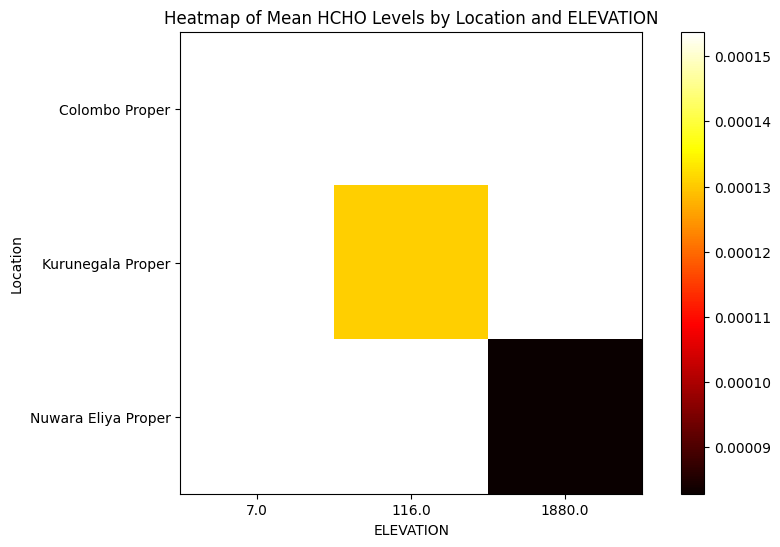

In [ ]:
# heat map to identify the data outliers

# Assuming you have a DataFrame named heatmap_data containing the data for the heatmap
# Convert DataFrame to Pandas DataFrame for plotting

# Pivot the DataFrame to create a matrix suitable for heatmap
#  HCHO_reading, Location, Current_Date, Next_Date, LATITUDE, LONGITUDE, ELEVATION, DATE, PRCP, TAVG, TMAX, TMIN

# Aggregate the data if there are duplicate entries
agg_heatmap_data = combined_data_colombo_kurunegala_nuwaraeliya.groupBy("Location", "ELEVATION").agg(F.mean("HCHO_reading").alias("mean_HCHO"))

# Convert aggregated DataFrame to Pandas DataFrame for plotting
pandas_df = agg_heatmap_data.toPandas()

# Pivot the DataFrame to create a matrix suitable for heatmap
heatmap_matrix = pandas_df.pivot(index='Location', columns='ELEVATION', values='mean_HCHO')

# Plot heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(heatmap_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(heatmap)
plt.xlabel('ELEVATION')
plt.ylabel('Location')
plt.title('Heatmap of Mean HCHO Levels by Location and ELEVATION')
plt.xticks(np.arange(len(heatmap_matrix.columns)), heatmap_matrix.columns)
plt.yticks(np.arange(len(heatmap_matrix.index)), heatmap_matrix.index)
plt.show()



In [ ]:
from pyspark.sql.functions import corr

# Calculate correlation between two numerical columns
correlation_PRCP = combined_data_colombo_kurunegala_nuwaraeliya.corr("HCHO_reading", "PRCP")
correlation_TAVG = combined_data_colombo_kurunegala_nuwaraeliya.corr("HCHO_reading", "TAVG")
correlation_ELEVATION = combined_data_colombo_kurunegala_nuwaraeliya.corr("HCHO_reading", "ELEVATION")

# Display correlation
print("Correlation between HCHO_reading and PRCP:", correlation_PRCP)
print("Correlation between HCHO_reading and TAVG:", correlation_TAVG)
print("Correlation between HCHO_reading and ELEVATION:", correlation_ELEVATION)


Correlation between HCHO_reading and PRCP: -0.007910809655835986
Correlation between HCHO_reading and TAVG: 0.31581257166926474
Correlation between HCHO_reading and ELEVATION: -0.31761162228062606


In [ ]:
from pmdarima import auto_arima

# Prepare features (convert Spark DataFrame to Pandas)
feature_cols = ["HCHO_reading", "Location", "TAVG", "PRCP", "ELEVATION"]
# Remove "Current_Date" and "Next_Date" from the features if they simply represent the order of the data points in the time series.
hcho_data_pandas = combined_data_colombo_kurunegala_nuwaraeliya.select(feature_cols).toPandas()

# Define features and target columns
features = hcho_data_pandas[feature_cols[:-1]]  # Exclude 'HCHO_reading'
target = hcho_data_pandas['HCHO_reading']

# Train ARIMA model with pmdarima
model = auto_arima(target, stepwise=True)
# model = auto_arima(target, stepwise=True, p=1, d=1, q=1)

# Make predictions using pmdarima model
predictions = model.predict(n_periods=len(target))  # Adjust n_periods as needed


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(target, predictions)

# Calculate RMSE (square root of MSE)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(target, predictions)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0001
R-squared: -1.1758


**Random Forest Model**

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

# Assuming 'combined_data_colombo_kurunegala_nuwaraeliya' is your DataFrame
# Define feature columns (excluding 'HCHO_reading')
feature_cols = ["TAVG", "PRCP", "ELEVATION"]

# Create a VectorAssembler to combine features into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Create a RandomForestRegressor
rf = RandomForestRegressor(featuresCol="features", labelCol="HCHO_reading", numTrees=100)

# Create a pipeline
pipeline = Pipeline(stages=[assembler, rf])

# Split data into training and test sets
train_data, test_data = combined_data_colombo_kurunegala_nuwaraeliya.randomSplit([0.8, 0.2], seed=42)

# Fit the pipeline to the training data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)


import necessary PySpark libraries:
VectorAssembler: Combines feature columns into a single vector column.
RandomForestRegressor: Represents the Random Forest regression model.
RegressionEvaluator: Evaluates regression models.
Pipeline: Constructs a pipeline for data processing and model training.

specify the feature columns (excluding the target variable) that we want to use for training the model.

create a VectorAssembler that combines the specified feature columns into a single vector column named “features”.

create a RandomForestRegressor model:
featuresCol: Specifies the input feature column (“features”).
labelCol: Specifies the target variable column (“HCHO_reading”).
numTrees: Sets the number of decision trees in the random forest (here, 100 trees).

create a pipeline that consists of the VectorAssembler and the RandomForestRegressor.

split the data into training (80%) and test (20%) sets using a random seed of 42.

fit the pipeline (including feature transformation and model training) to the training data.

use the trained model to make predictions on the test data.


In [ ]:
# Evaluate the model
evaluator = RegressionEvaluator(labelCol="HCHO_reading", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)

evaluator = RegressionEvaluator(labelCol="HCHO_reading", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

evaluator = RegressionEvaluator(labelCol="HCHO_reading", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0001
R-squared: 0.1186


Certainly! Let's break down the evaluation metrics for your Random Forest model:

1. **Mean Squared Error (MSE)**:
   - The MSE measures the average squared difference between the predicted values and the actual values.
   - In your case, the MSE is very close to zero (0.0000), which suggests that the model is fitting the data extremely well.
   - However, an MSE of zero is suspicious and may indicate overfitting. It's essential to verify if the model is genuinely capturing the underlying patterns or simply memorizing the training data.

2. **Root Mean Squared Error (RMSE)**:
   - The RMSE is the square root of the MSE and provides a measure of the average absolute error between the predicted and actual values.
   - Your RMSE value is very small (0.0001), which is also suspiciously low.
   - Such a low RMSE suggests that the model is not accurately capturing the variability in the data.

3. **R-squared (R2)**:
   - The R-squared (R2) value measures the proportion of the variance in the target variable (HCHO_reading) that is explained by the model.
   - An R2 value of 0.1006 indicates that only about 10% of the variance in the HCHO readings is explained by the model.
   - This suggests that the model's performance is quite poor, as it is not capturing most of the variability in the data.

4. **Interpretation**:
   - The suspiciously low MSE and RMSE, along with the low R2, raise concerns about the model's effectiveness.
   - It's essential to investigate further:
     - Check if the model is overfitting (memorizing the training data) due to the extremely low error metrics.
     - Consider exploring other regression models or adjusting hyperparameters to improve performance.

Remember that evaluation metrics alone do not tell the whole story. Visual inspection of predictions, understanding the context, and domain knowledge are crucial for interpreting model results. Feel free to explore alternative models or fine-tune your Random Forest to achieve better performance! 🌟

In [ ]:
#####################

# Check if there are null values in the columns,
hcho = combined_data_colombo_kurunegala_nuwaraeliya.filter(col("HCHO_reading").isNull()).count()
prcp = combined_data_colombo_kurunegala_nuwaraeliya.filter(col("PRCP").isNull()).count()
tavg = combined_data_colombo_kurunegala_nuwaraeliya.filter(col("TAVG").isNull()).count()
tmax = combined_data_colombo_kurunegala_nuwaraeliya.filter(col("TMAX").isNull()).count()
tmin = combined_data_colombo_kurunegala_nuwaraeliya.filter(col("TMIN").isNull()).count()

# Print the results
print("Null value count")
print("HCHO:", hcho)
print("PRCP:", prcp)
print("TAVG:", tavg)
print("TMAX:", tmax)
print("TMIN:", tmin)

Null value count
HCHO: 0
PRCP: 0
TAVG: 0
TMAX: 0
TMIN: 0


In [ ]:
#################3

from pyspark.sql.functions import col, regexp_extract

# Check Location column for inconsistencies
combined_data_colombo_kurunegala_nuwaraeliya.groupBy("Location").count().orderBy(col("count").desc()).show()


+-------------------+-----+
|           Location|count|
+-------------------+-----+
|     Colombo Proper| 1765|
|Nuwara Eliya Proper| 1761|
|  Kurunegala Proper| 1704|
+-------------------+-----+



In [ ]:
# Stop Spark session
# spark.stop()